### Datasets:

Book for fraud detection: https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

https://www.kaggle.com/competitions/ieee-fraud-detection/data?select=train_transaction.csv

https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset

In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import pickle
#import xgboost as xgb
#import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from graphviz import Digraph
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Input, Dropout, Dense, ReLU, LeakyReLU, BatchNormalization, Reshape, Flatten, Concatenate, Add, Embedding, LSTM, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_normal
from deap import base, creator, tools, algorithms
#from keras.optimizers import adam_v2, rmsprop_v2
from keras import backend as K
# Remove all alerts
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.qhull import QhullError
from scipy import spatial
spatial.QhullError = QhullError
import lime
import lime.lime_tabular
from alibi.explainers import IntegratedGradients
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.base import BaseEstimator, ClassifierMixin

In [2]:
%load_ext jupyter_ai_magics

In [3]:
%%ai gpt4all
please generate the python code to solve the 2D laplace equation in cartesian coordinates.

Cannot determine model provider from model ID `gpt4all`.

To see a list of models you can use, run `%ai list`

If you were trying to run a command, run `%ai help` to see a list of commands.

In [4]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li></ul> |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |


# Data Proprecessing & EDA & Feature Engineering

In [2]:
ethereum = pd.read_csv('/Users/niecheng/Desktop/DATA5012 Data Science Project/datasets/Ethereum Fraud Detection Dataset.csv')
ethereum

Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2              2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3              3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
...          ...    ...                                         ...   ...   
9836        9836   2175  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1   
9837        9837   2176  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
9838        9838   2177  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1   
9839        9839   2178  0xffde23396d57e10abf58bd929bb1e856c7718218     1   
9840        9840   2179  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min between received tnx  \
0                       844.26                       1093.71   
1                     12709.07                       2958.44   
2                    246194.54                       2434.02   
3                     10219.60                      15785.09   
4                        36.61                      10707.77   
...                        ...                           ...   
9836                  12635.10                        631.39   
9837                      0.00                          0.00   
9838                   2499.44                       2189.29   
9839                      0.00                          0.00   
9840                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63       721            89   
1                                  1218216.73        94             8   
2                                   516729.30         2            10   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
...                                       ...       ...           ...   
9836                                 58748.48         4            13   
9837                                     0.00         0             0   
9838                                261601.88        67            43   
9839                                     0.00         0             1   
9840                                670817.33        18             3   

      Number of Created Contracts  ...   ERC20 min val sent  \
0                               0  ...             0.000000   
1                               0  ...             2.260809   
2                               0  ...             0.000000   
3                               0  ...           100.000000   
4                               1  ...             0.000000   
...                           ...  ...                  ...   
9836                            0  ...             0.000000   
9837                            0  ...             0.000000   
9838                            0  ...             0.000000   
9839                            0  ...                  NaN   
9840                            0  ...             0.000000   

       ERC20 max val sent   ERC20 avg val sent   ERC20 min val sent contract  \
0            1.683100e+07        271779.920000                           0.0   
1            2.260809e+00             2.260809                           0.0   
2            0.000000e+00             0.000000                           0.0   
3            9.029231e+03          3804.076893                           0.0   
4            4.500000e+04         13726.659220                           0.0   
...                   ...                  ...                           ...   
9836         0.000000e+00             0.000000                           0.0   
9837         0.000000e+00             

In [3]:
# Show the dimension of the ethereum dataset
ethereum.shape

(9841, 51)

In [4]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [5]:
# First three columns (Unnamed: 0, Index and Address) are useless for classification, so drop them
ethereum = ethereum.iloc[:,3:]

In [6]:
# Show the statistical table for numerical variables
ethereum.select_dtypes(include=['float','int']).describe()

FLAG  Avg min between sent tnx  Avg min between received tnx  \
count  9841.000000               9841.000000                   9841.000000   
mean      0.221421               5086.878721                   8004.851184   
std       0.415224              21486.549974                  23081.714801   
min       0.000000                  0.000000                      0.000000   
25%       0.000000                  0.000000                      0.000000   
50%       0.000000                 17.340000                    509.770000   
75%       0.000000                565.470000                   5480.390000   
max       1.000000             430287.670000                 482175.490000   

       Time Diff between first and last (Mins)      Sent tnx  Received Tnx  \
count                             9.841000e+03   9841.000000   9841.000000   
mean                              2.183333e+05    115.931714    163.700945   
std                               3.229379e+05    757.226361    940.836550   
min                               0.000000e+00      0.000000      0.000000   
25%                               3.169300e+02      1.000000      1.000000   
50%                               4.663703e+04      3.000000      4.000000   
75%                               3.040710e+05     11.000000     27.000000   
max                               1.954861e+06  10000.000000  10000.000000   

       Number of Created Contracts  Unique Received From Addresses  \
count                  9841.000000                     9841.000000   
mean                      3.729702                       30.360939   
std                     141.445583                      298.621112   
min                       0.000000                        0.000000   
25%                       0.000000                        1.000000   
50%                       0.000000                        2.000000   
75%                       0.000000                        5.000000   
max                    9995.000000                     9999.000000   

       Unique Sent To Addresses  min value received  ...   ERC20 max val rec  \
count               9841.000000         9841.000000  ...        9.012000e+03   
mean                  25.840159           43.845153  ...        1.252524e+08   
std                  263.820410          325.929139  ...        1.053741e+10   
min                    0.000000            0.000000  ...        0.000000e+00   
25%                    1.000000            0.001000  ...        0.000000e+00   
50%                    2.000000            0.095856  ...        0.000000e+00   
75%                    3.000000            2.000000  ...        9.900000e+01   
max                 9287.000000        10000.000000  ...        1.000000e+12   

        ERC20 avg val rec   ERC20 min val sent   ERC20 max val sent  \
count        9.012000e+03         9.012000e+03         9.012000e+03   
mean         4.346203e+06         1.174126e+04         1.303594e+07   
std          2.141192e+08         1.053567e+06         1.179905e+09   
min          0.000000e+00         0.000000e+00         0.000000e+00   
25%          0.000000e+00         0.000000e+00         0.000000e+00   
50%          0.000000e+00         0.000000e+00         0.000000e+00   
75%          2.946467e+01         0.000000e+00         0.000000e+00   
max          1.724181e+10         1.000000e+08         1.120000e+11   

        ERC20 avg val sent   ERC20 min val sent contract  \
count         9.012000e+03                        9012.0   
mean          6.318389e+06                           0.0   
std           5.914764e+08                           0.0   
min           0.000000e+00                           0.0   
25%           0.000000e+00                           0.0   
50%           0.000000e+00                           0.0   
75%           0.000000e+00                           0.0   
max           5.614756e+10                           0.0   

        ERC20 max val sent contract   ERC20 avg val sent contract  \
count 

In [7]:
# Check the unique values in each column
for col in ethereum:print(f'{col} : {len(ethereum[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

### Count the number of FLAG

In [8]:
ethereum['FLAG'].value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

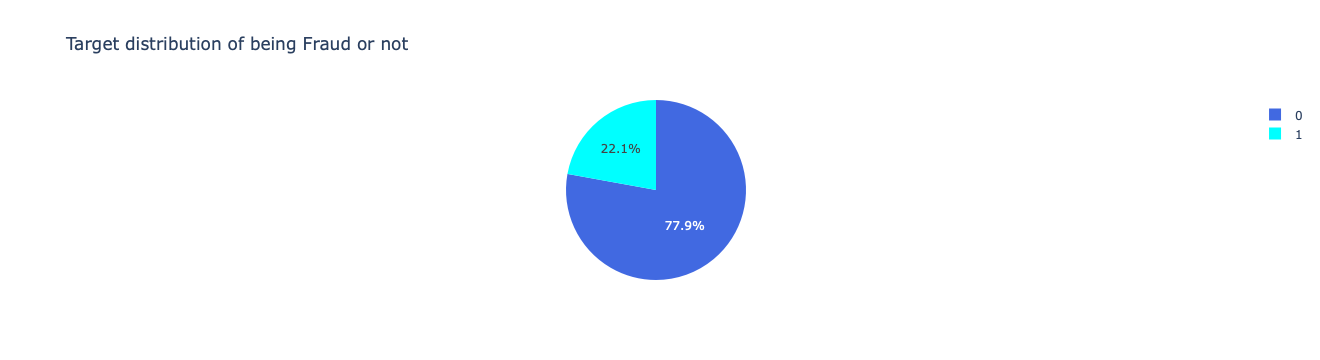

In [9]:
flag_counts = ethereum['FLAG'].value_counts()
fig = px.pie(ethereum, values=flag_counts.values, names=flag_counts.index,
             title='Target distribution of being Fraud or not', color_discrete_sequence=['royalblue', 'cyan'])
fig.show()

In [10]:
print(f'Percentage of non-fraudulent instances : {len(ethereum.loc[ethereum["FLAG"]==0])/len(ethereum["FLAG"])*100}')
print(f'Percentage of fraudulent instances : {len(ethereum.loc[ethereum["FLAG"]==1])/len(ethereum["FLAG"])*100}')

Percentage of non-fraudulent instances : 77.85794126613149
Percentage of fraudulent instances : 22.14205873386851


### Dealing with the NULL values

In [11]:
# Count NULL values of each column
ethereum.isnull().sum()

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

In [12]:
# Check those attributes with lots of NULL values, we know that there are some features only with 0, so removing these columns may help modelling.
useless_features_list = ethereum.columns[(ethereum.nunique() == 1)].tolist()
useless_features_list

[' ERC20 avg time between sent tnx',
 ' ERC20 avg time between rec tnx',
 ' ERC20 avg time between rec 2 tnx',
 ' ERC20 avg time between contract tnx',
 ' ERC20 min val sent contract',
 ' ERC20 max val sent contract',
 ' ERC20 avg val sent contract']

In [13]:
# Create a new dataframe without those attributes
new_ethereum = ethereum.drop(columns=useless_features_list)

In [14]:
# Recheck the NULL values of each column, and the percentage of corresponding missing values
for i in range(new_ethereum.shape[1]):
    n_miss = new_ethereum.iloc[:,i].isnull().sum()
    perc = n_miss / new_ethereum.shape[0]*100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 829 (8.4%)
> 24, Missing: 829 (8.4%)
> 25, Missing: 829 (8.4%)
> 26, Missing: 829 (8.4%)
> 27, Missing: 829 (8.4%)
> 28, Missing: 829 (8.4%)
> 29, Missing: 829 (8.4%)
> 30, Missing: 829 (8.4%)
> 31, Missing: 829 (8.4%)
> 32, Missing: 829 (8.4%)
> 33, Missing: 829 (8.4%)
> 34, Missing: 829 (8.4%)
> 35, Missing: 829 (8.4%)
> 36, Missing: 829 (8.4%)
> 37, Missing: 829 (8.4%)
> 38, Missing: 829 (8.4%)
> 39, Missing: 2697 (27.4%)
> 40, Missing:

In [15]:
# Rename the columns to make it tidy
new_ethereum.rename(columns={'min value received': 'Min value received', 'max value received':'Max value received', 
                                   'avg val received':'Avg val received', 'min val sent':'Min val sent', 
                                   'max val sent':'Max val sent', 'avg val sent':'Avg val sent', 
                                   'min value sent to contract':'Min value sent to contract',
                                   'max val sent to contract':'Max val sent to contract',
                                   'avg value sent to contract':'Avg value sent to contract',
                                   'total transactions (including tnx to create contract':'Total transactions',
                                   'total Ether sent':'Total ether sent',
                                   'total ether received':'Total ether received',
                                   'total ether sent contracts':'Total ether sent contracts',
                                   'total ether balance':'Total ether balance',
                                   ' Total ERC20 tnxs':'Total ERC20 tnxs',
                                   ' ERC20 total Ether received':'ERC20 total ether received',
                                   ' ERC20 total ether sent':'ERC20 total ether sent',
                                   ' ERC20 total Ether sent contract':'ERC20 total ether sent contract',
                                   ' ERC20 uniq sent addr':'ERC20 uniq sent addr',
                                   ' ERC20 uniq rec addr':'ERC20 uniq rec addr',
                                   ' ERC20 uniq sent addr.1':'ERC20 uniq sent addr.1',
                                   ' ERC20 uniq rec contract addr':'ERC20 uniq rec contract addr',
                                   ' ERC20 min val rec':'ERC20 min val rec',
                                   ' ERC20 max val rec':'ERC20 max val rec',
                                   ' ERC20 avg val rec':'ERC20 avg val rec',
                                   ' ERC20 min val sent':'ERC20 min val sent',
                                   ' ERC20 max val sent':'ERC20 max val sent',
                                   ' ERC20 avg val sent':'ERC20 avg val sent',
                                   ' ERC20 uniq sent token name':'ERC20 uniq sent token name',
                                   ' ERC20 uniq rec token name':'ERC20 uniq rec token name',
                                   ' ERC20 most sent token type':'ERC20 most sent token type', 
                                   ' ERC20_most_rec_token_type':'ERC20 most rec token type'}, inplace=True)

In [16]:
# Create a dataframe for checking all the filling values 
null_df = new_ethereum[new_ethereum.isnull().any(axis=1)]
# Extract the index of missing values to record the filled values
rows_with_missing_values = new_ethereum[new_ethereum.isnull().any(axis=1)]
rows_with_missing_values_index = rows_with_missing_values.index
null_df

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2        0                 246194.54                       2434.02   
7        0                   1497.39                        176.84   
9        0                   2570.59                       3336.01   
11       0                   3716.41                       1448.09   
12       0                      0.00                      12431.27   
...    ...                       ...                           ...   
9831     1                    193.09                         81.82   
9833     1                      0.00                          0.00   
9834     1                      0.00                         49.51   
9835     1                      0.00                          0.00   
9839     1                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2                                   516729.30         2            10   
7                                   319828.05       213             5   
9                                    30572.70         8             3   
11                                  385961.98         8           246   
12                                  198900.25         0            16   
...                                       ...       ...           ...   
9831                                  1485.80         6             4   
9833                                     0.00         0             0   
9834                                 12643.85         1            15   
9835                                  8427.92         0             1   
9839                                     0.00         0             1   

      Number of Created Contracts  Unique Received From Addresses  \
2                               0                              10   
7                               0                               3   
9                               0                               2   
11                              0                               4   
12                              1                               4   
...                           ...                             ...   
9831                            0                               3   
9833                            0                               0   
9834                            0                              15   
9835                            1                               1   
9839                            0                               1   

      Unique Sent To Addresses  Min value received  ...  ERC20 min val rec  \
2                            2            0.113119  ...           0.000000   
7                            3            0.118490  ...           0.000000   
9                            4            0.100000  ...         600.000000   
11                           3            0.118061  ...           0.000000   
12                           0            0.000000  ...           0.075367   
...                        ...                 ...  ...                ...   
9831                         6            0.000100  ...                NaN   
9833                         0            0.000000  ...                NaN   
9834                         1            0.020005  ...                NaN   
9835                         0            0.000000  ...                NaN   
9839                         0            0.500000  ...                NaN   

      ERC20 max val rec  ERC20 avg val rec  ERC20 min val sent  \
2            442.819840          65.189009                 0.0   
7            365.000000          56.850281                 0.0   
9            600.000000         600.000000                 0.0   
11          4035.631891         774.128239                 0.0   
12             0.105917           0.090642                 0.0   
...                 ...                ...                 ...   
9831                NaN                NaN                 N

#### KNN method to fill the missing values

In [17]:
# Firstly we need to drop the categorical columns
features_only_numerical = new_ethereum.drop(columns=['ERC20 most sent token type','ERC20 most rec token type'])

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
imputed_new_ethereum = imputer.fit_transform(features_only_numerical)

# Convert the array back to a DataFrame
imputed_new_ethereum_KNN = pd.DataFrame(imputed_new_ethereum, columns=features_only_numerical.columns)

In [18]:
imputed_new_ethereum_KNN

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9836   1.0                  12635.10                        631.39   
9837   1.0                      0.00                          0.00   
9838   1.0                   2499.44                       2189.29   
9839   1.0                      0.00                          0.00   
9840   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9836                                 58748.48       4.0          13.0   
9837                                     0.00       0.0           0.0   
9838                                261601.88      67.0          43.0   
9839                                     0.00       0.0           1.0   
9840                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9836                          0.0                            11.0   
9837                          0.0                             0.0   
9838                          0.0                            31.0   
9839                          0.0                             1.0   
9840                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
1                         14.0            0.000000  ...   
2                          2.0            0.113119  ...   
3                         13.0            0.000000  ...   
4                         19.0            0.000000  ...   
...                        ...                 ...  ...   
9836                       4.0            0.004082  ...   
9837                       0.0            0.000000  ...   
9838                      44.0            0.001078  ...   
9839                       0.0            0.500000  ...   
9840                       5.0            0.795233  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0                        0.0                          58.0           0.000000   
1                        0.0                           7.0           0.000000   
2                        0.0                           8.0           0.000000   
3                        0.0                          11.0           0.000000   
4                        0.0                          27.0           0.000000   
...                      ...                           ...                ...   
9836                     0.0                           2.0           0.000000   
9837                     0.0                           1.0          13.370000   
9838                 

In [19]:
# Check the filled dataframe
imputed_values_for_missing_rows = imputed_new_ethereum_KNN.loc[rows_with_missing_values_index]
imputed_values_for_missing_rows

FLAG  Avg min between sent tnx  Avg min between received tnx  \
2      0.0                 246194.54                       2434.02   
7      0.0                   1497.39                        176.84   
9      0.0                   2570.59                       3336.01   
11     0.0                   3716.41                       1448.09   
12     0.0                      0.00                      12431.27   
...    ...                       ...                           ...   
9831   1.0                    193.09                         81.82   
9833   1.0                      0.00                          0.00   
9834   1.0                      0.00                         49.51   
9835   1.0                      0.00                          0.00   
9839   1.0                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2                                   516729.30       2.0          10.0   
7                                   319828.05     213.0           5.0   
9                                    30572.70       8.0           3.0   
11                                  385961.98       8.0         246.0   
12                                  198900.25       0.0          16.0   
...                                       ...       ...           ...   
9831                                  1485.80       6.0           4.0   
9833                                     0.00       0.0           0.0   
9834                                 12643.85       1.0          15.0   
9835                                  8427.92       0.0           1.0   
9839                                     0.00       0.0           1.0   

      Number of Created Contracts  Unique Received From Addresses  \
2                             0.0                            10.0   
7                             0.0                             3.0   
9                             0.0                             2.0   
11                            0.0                             4.0   
12                            1.0                             4.0   
...                           ...                             ...   
9831                          0.0                             3.0   
9833                          0.0                             0.0   
9834                          0.0                            15.0   
9835                          1.0                             1.0   
9839                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
2                          2.0            0.113119  ...   
7                          3.0            0.118490  ...   
9                          4.0            0.100000  ...   
11                         3.0            0.118061  ...   
12                         0.0            0.000000  ...   
...                        ...                 ...  ...   
9831                       6.0            0.000100  ...   
9833                       0.0            0.000000  ...   
9834                       1.0            0.020005  ...   
9835                       0.0            0.000000  ...   
9839                       0.0            0.500000  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
2                        0.0                           8.0           0.000000   
7                        0.0                           7.0           0.000000   
9                        0.0                           1.0         600.000000   
11                       0.0                           8.0           0.000000   
12                       0.0                           2.0           0.075367   
...                      ...                           ...                ...   
9831                     0.0                           2.0           5.882800   
9833                     0.0                           1.0           6.150200   
9834                 

#### Take the variable 'Total ERC20 tnxs' as an example, we can check the distribution of the values in it to see if our filling is suitable

In [20]:
new_ethereum['Total ERC20 tnxs'].value_counts()

Total ERC20 tnxs
0.0       4399
1.0       1271
2.0        940
3.0        283
4.0        264
          ... 
219.0        1
4064.0       1
346.0        1
830.0        1
327.0        1
Name: count, Length: 300, dtype: int64

In [21]:
# Compare to the distribution of different values, we know that original dataset has the similar distribution of different values to the imputed column
imputed_values_for_missing_rows['Total ERC20 tnxs'].value_counts()

Total ERC20 tnxs
1.0     777
2.0     670
4.0     154
3.0     146
5.0      96
       ... 
57.0      1
21.2      1
23.2      1
3.6       1
12.6      1
Name: count, Length: 95, dtype: int64

#### Here is the way to find optimal k value for the KNN method. Set a interval for k value and then produce different KNN imputed dataframes, next use these dataframes to build regression model for the target column 'FLAG' and check which imputed dataframe can obtain the least MSE.

In [22]:
# Define a range of K values, too large K value may produce the overfitting 
k_values = list(range(1, 11))

# Initialize a dictionary to store MSE for each K value
mse_dict = {}

# Iterate through each K value
for k in k_values:
    
    # Initialize KNN imputer with current K value
    imputer = KNNImputer(n_neighbors=k)
    
    # Fill missing values
    imputed_data = imputer.fit_transform(features_only_numerical)
    
    # Convert the array back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=features_only_numerical.columns)
    
    # Split data into features and target
    X = imputed_df.drop(columns='FLAG')
    y = imputed_df['FLAG']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize linear regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Store MSE for current K value
    mse_dict[k] = mse

# Find the K value with the lowest MSE
best_k = min(mse_dict, key=mse_dict.get)
best_mse = mse_dict[best_k]

print("Best K value:", best_k)
print("Corresponding MSE:", best_mse)

Best K value: 9
Corresponding MSE: 0.02193722701879126


In [23]:
# Firstly we need to drop the categorical columns
features_only_numerical = new_ethereum.drop(columns=['ERC20 most sent token type','ERC20 most rec token type'])

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=9)

# Fit and transform the data
imputed_new_ethereum = imputer.fit_transform(features_only_numerical)

# Convert the array back to a DataFrame
imputed_new_ethereum_KNN = pd.DataFrame(imputed_new_ethereum, columns=features_only_numerical.columns)
imputed_new_ethereum_KNN

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9836   1.0                  12635.10                        631.39   
9837   1.0                      0.00                          0.00   
9838   1.0                   2499.44                       2189.29   
9839   1.0                      0.00                          0.00   
9840   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9836                                 58748.48       4.0          13.0   
9837                                     0.00       0.0           0.0   
9838                                261601.88      67.0          43.0   
9839                                     0.00       0.0           1.0   
9840                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9836                          0.0                            11.0   
9837                          0.0                             0.0   
9838                          0.0                            31.0   
9839                          0.0                             1.0   
9840                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
1                         14.0            0.000000  ...   
2                          2.0            0.113119  ...   
3                         13.0            0.000000  ...   
4                         19.0            0.000000  ...   
...                        ...                 ...  ...   
9836                       4.0            0.004082  ...   
9837                       0.0            0.000000  ...   
9838                      44.0            0.001078  ...   
9839                       0.0            0.500000  ...   
9840                       5.0            0.795233  ...   

      ERC20 uniq sent addr.1  ERC20 uniq rec contract addr  ERC20 min val rec  \
0                        0.0                     58.000000           0.000000   
1                        0.0                      7.000000           0.000000   
2                        0.0                      8.000000           0.000000   
3                        0.0                     11.000000           0.000000   
4                        0.0                     27.000000           0.000000   
...                      ...                           ...                ...   
9836                     0.0                      2.000000           0.000000   
9837                     0.0                      1.000000          13.370000   
9838                 

In [24]:
columns = imputed_new_ethereum_KNN.columns

fig, axes = plt.subplots(4, 4, figsize=(20, 20), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of filled columns", y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=imputed_new_ethereum_KNN, x=columns[23])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=imputed_new_ethereum_KNN, x=columns[24])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=imputed_new_ethereum_KNN, x=columns[25])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[0,3], data=imputed_new_ethereum_KNN, x=columns[26])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,0], data=imputed_new_ethereum_KNN, x=columns[27])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,1], data=imputed_new_ethereum_KNN, x=columns[28])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[1,2], data=imputed_new_ethereum_KNN, x=columns[29])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[1,3], data=imputed_new_ethereum_KNN, x=columns[30])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,0], data=imputed_new_ethereum_KNN, x=columns[31])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[2,1], data=imputed_new_ethereum_KNN, x=columns[32])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[2,2], data=imputed_new_ethereum_KNN, x=columns[33])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[2,3], data=imputed_new_ethereum_KNN, x=columns[34])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[3,0], data=imputed_new_ethereum_KNN, x=columns[35])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[3,1], data=imputed_new_ethereum_KNN, x=columns[36])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[3,2], data=imputed_new_ethereum_KNN, x=columns[37])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[3,3], data=imputed_new_ethereum_KNN, x=columns[38])
ax15.set_title(f'Distribution of {columns[16]}')

plt.savefig("Distribution of filled columns.png")
plt.show()

In [25]:
# Re-Check some variables in Boxplots
imputed_new_ethereum_KNN['ERC20 uniq sent addr.1'].value_counts()

ERC20 uniq sent addr.1
0.000000    9809
1.000000      26
0.111111       4
3.000000       1
2.000000       1
Name: count, dtype: int64

In [26]:
imputed_new_ethereum_KNN.drop(columns=['ERC20 uniq sent addr.1'], inplace = True)

In [27]:
# Since the number of the missing values is more than the 5% of the total number of transactions, so it is wise to choose an appropriate way to fill them
# Paper: A novel approach to detect fraud in Ethereum transactions using stacking
# Use mean value
# fill_with_mean_new_ethereum = new_ethereum.fillna(new_ethereum.mean())

In [28]:
# There are two categorical variables
# ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction
# ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

# categories = fill_with_mean_new_ethereum.select_dtypes('O').columns.astype('category')
# fill_with_mean_new_ethereum[categories]

## Correlation Analysis

#### ERC20_Most_Sent_Token_Type and ERC20_Most_Rec_Token_Type represent 'Most sent token for account via ERC20 transaction' and 'Most received token for account via ERC20 transactions' respectively, so missing values in these two columns are not totally meaningless, we just need to deal with the numerical variables.

In [29]:
# Here use heatmap to visualize the correlation for all of the numerical variables
corr = imputed_new_ethereum_KNN.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu', center=0, linewidths=0.1, square=True)

#### In feature engineering, removing highly correlated variables is often done to address multicollinearity, a condition where two or more independent variables in a regression model are highly correlated with each other. Mostly, if the correlation coefficient between variables is more than 0.8, we can view it as the highly correlated variables.

In [30]:
highly_correlated_variables = ['Total ether sent contracts', 'Max val sent to contract', 'ERC20 avg val rec',
        'ERC20 max val rec', 'ERC20 min val rec', 'ERC20 avg val sent', 'ERC20 min val sent', 'ERC20 max val sent',  
        'Avg value sent to contract', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name']
imputed_new_ethereum_KNN.drop(highly_correlated_variables, axis=1, inplace=True)

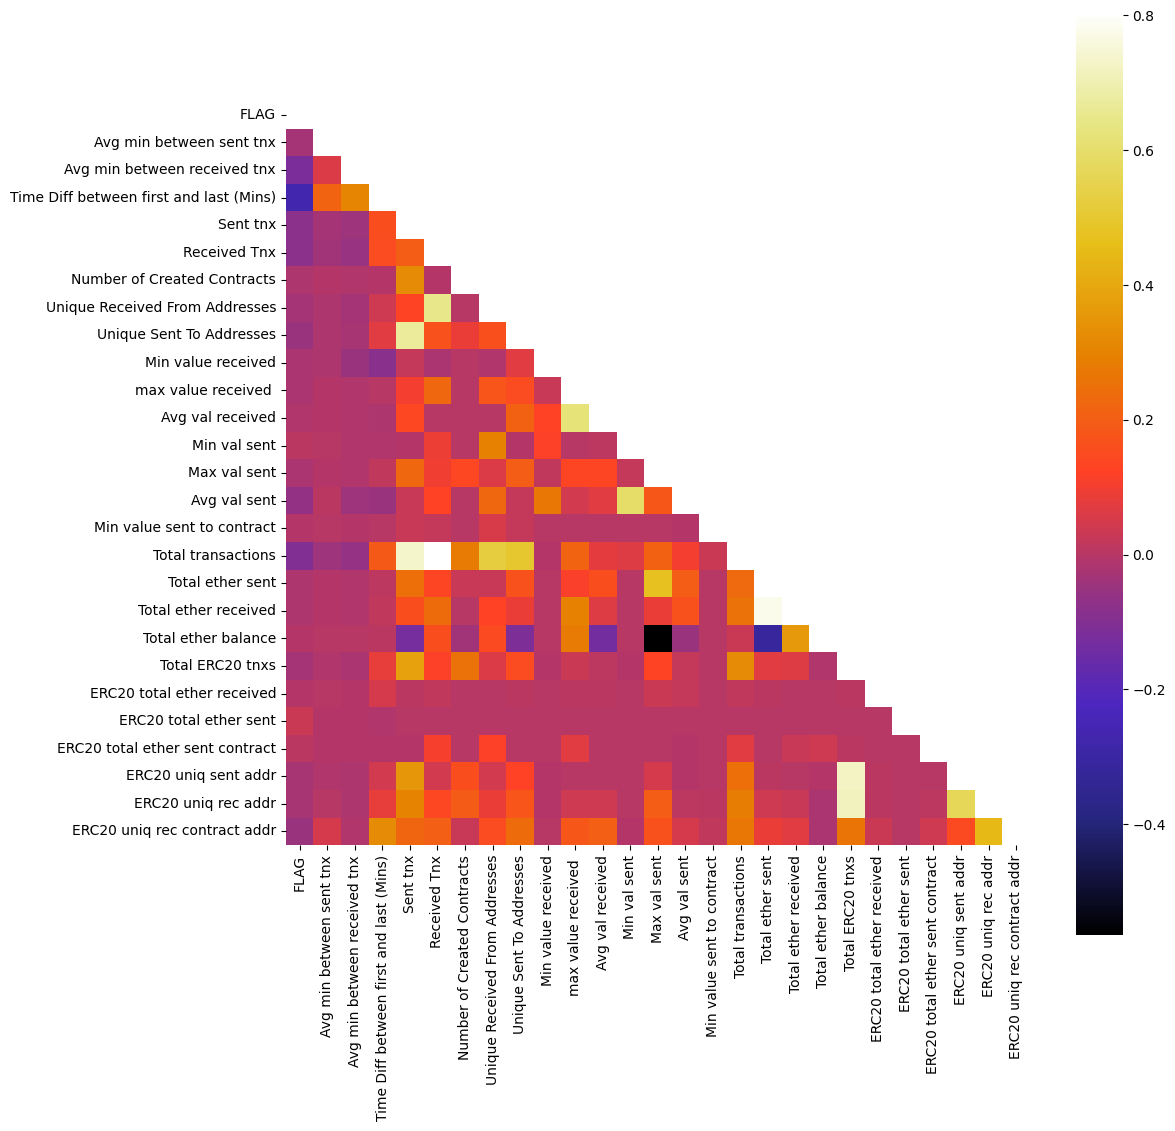

In [31]:
# Create a new correlation map
corr_new = imputed_new_ethereum_KNN.corr()
mask = np.zeros_like(corr_new)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12,12))
sns.heatmap(data=corr_new, mask=mask, cmap='CMRmap', square=True)
plt.show()

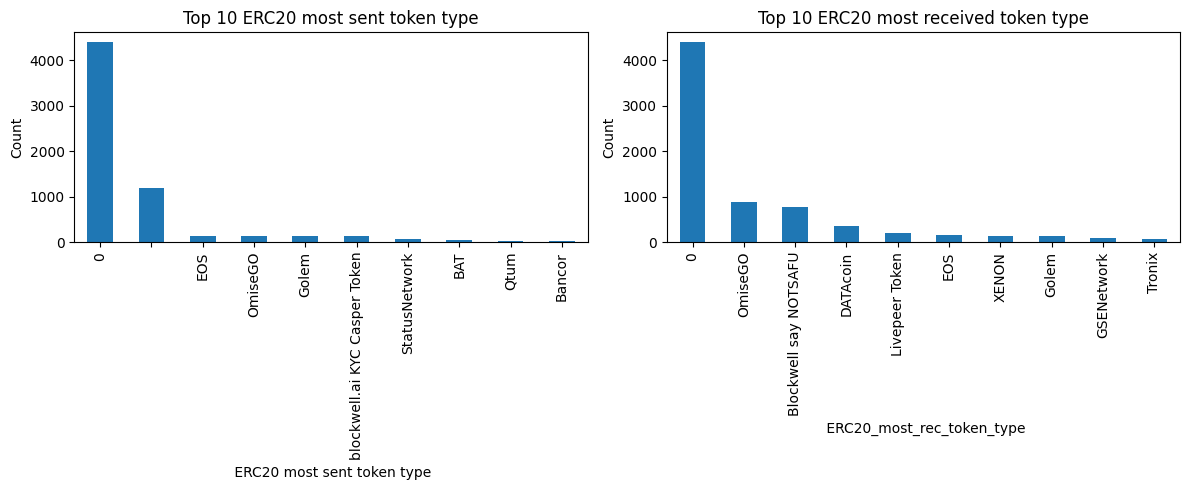

In [32]:
# Check the distribution of two categorical variables: sent and received token type
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ethereum[' ERC20 most sent token type'].value_counts().head(10).plot(kind='bar', ax=axs[0])
axs[0].set_title('Top 10 ERC20 most sent token type')
axs[0].set_ylabel('Count')

ethereum[' ERC20_most_rec_token_type'].value_counts().head(10).plot(kind='bar', ax=axs[1])
axs[1].set_title('Top 10 ERC20 most received token type')
axs[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

## Create new variables based on the existing attributes

In [33]:
imputed_new_ethereum_KNN.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'Min value received', 'max value received ',
       'Avg val received', 'Min val sent', 'Max val sent', 'Avg val sent',
       'Min value sent to contract', 'Total transactions', 'Total ether sent',
       'Total ether received', 'Total ether balance', 'Total ERC20 tnxs',
       'ERC20 total ether received', 'ERC20 total ether sent',
       'ERC20 total ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr'],
      dtype='object')

In [34]:
imputed_new_ethereum_KNN

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9836   1.0                  12635.10                        631.39   
9837   1.0                      0.00                          0.00   
9838   1.0                   2499.44                       2189.29   
9839   1.0                      0.00                          0.00   
9840   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9836                                 58748.48       4.0          13.0   
9837                                     0.00       0.0           0.0   
9838                                261601.88      67.0          43.0   
9839                                     0.00       0.0           1.0   
9840                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9836                          0.0                            11.0   
9837                          0.0                             0.0   
9838                          0.0                            31.0   
9839                          0.0                             1.0   
9840                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  Total ether sent  \
0                        118.0            0.000000  ...        865.691093   
1                         14.0            0.000000  ...          3.087297   
2                          2.0            0.113119  ...          3.588616   
3                         13.0            0.000000  ...       1750.045862   
4                         19.0            0.000000  ...        104.318883   
...                        ...                 ...  ...               ...   
9836                       4.0            0.004082  ...         36.665461   
9837                       0.0            0.000000  ...          0.000000   
9838                      44.0            0.001078  ...         61.785995   
9839                       0.0            0.500000  ...          0.000000   
9840                       5.0            0.795233  ...      11599.700000   

      Total ether received  Total ether balance  Total ERC20 tnxs  \
0               586.466675          -279.224419        265.000000   
1                 3.085478            -0.001819          8.000000   
2                 3.589057             0.000441          8.000000   
3               895.399559          -854.646303         14.000000   
4                53.421897           -50.896986         42.000000   
...                    ...                  ...               ...   
9836             36.673777             0.008316    

In [35]:
## Transaction frequency features
imputed_new_ethereum_KNN['Transaction frequency per day'] = imputed_new_ethereum_KNN['Total transactions'] / (imputed_new_ethereum_KNN['Time Diff between first and last (Mins)'] / (24 * 60))
imputed_new_ethereum_KNN['Sent to received ratio'] = imputed_new_ethereum_KNN['Sent tnx'] / imputed_new_ethereum_KNN['Received Tnx']
imputed_new_ethereum_KNN['Contract creation ratio'] = imputed_new_ethereum_KNN['Number of Created Contracts'] / imputed_new_ethereum_KNN['Total transactions']
imputed_new_ethereum_KNN['ERC20 txn ratio'] = imputed_new_ethereum_KNN['Total ERC20 tnxs'] / imputed_new_ethereum_KNN['Total transactions']

## Ether value features
imputed_new_ethereum_KNN['Sent to received ether ratio'] = imputed_new_ethereum_KNN['Total ether sent'] / imputed_new_ethereum_KNN['Total ether received']
imputed_new_ethereum_KNN['Sent to balance ether ratio'] = imputed_new_ethereum_KNN['Total ether sent'] / imputed_new_ethereum_KNN['Total ether balance']
imputed_new_ethereum_KNN['Sent to erc20 ether ratio'] = imputed_new_ethereum_KNN['Total ether sent'] / imputed_new_ethereum_KNN['ERC20 total ether received']

## Difference between max and min value sent
imputed_new_ethereum_KNN['Diff max min value sent'] = imputed_new_ethereum_KNN['Max val sent'] - imputed_new_ethereum_KNN['Min val sent']

## Ratio of average value sent to average value received
imputed_new_ethereum_KNN['Avg sent to received ratio'] = imputed_new_ethereum_KNN['Avg val sent'] / imputed_new_ethereum_KNN['Avg val received']

## Ratio of unique sent to addresses to unique received from addresses
imputed_new_ethereum_KNN['Unique sent to received ratio'] = imputed_new_ethereum_KNN['Unique Sent To Addresses'] / imputed_new_ethereum_KNN['Unique Received From Addresses']

In [36]:
imputed_new_ethereum_KNN.isnull().sum()

FLAG                                         0
Avg min between sent tnx                     0
Avg min between received tnx                 0
Time Diff between first and last (Mins)      0
Sent tnx                                     0
Received Tnx                                 0
Number of Created Contracts                  0
Unique Received From Addresses               0
Unique Sent To Addresses                     0
Min value received                           0
max value received                           0
Avg val received                             0
Min val sent                                 0
Max val sent                                 0
Avg val sent                                 0
Min value sent to contract                   0
Total transactions                           0
Total ether sent                             0
Total ether received                         0
Total ether balance                          0
Total ERC20 tnxs                             0
ERC20 total e

In [37]:
# Since we create a lot of ratio variables, we need to consider the situation that some of them include 'inf' values, if too many, this variable has better not to be created
def count_inf(col):
    return np.sum(np.isinf(col))

num_inf_cols = imputed_new_ethereum_KNN.apply(count_inf)
num_inf_cols

FLAG                                          0
Avg min between sent tnx                      0
Avg min between received tnx                  0
Time Diff between first and last (Mins)       0
Sent tnx                                      0
Received Tnx                                  0
Number of Created Contracts                   0
Unique Received From Addresses                0
Unique Sent To Addresses                      0
Min value received                            0
max value received                            0
Avg val received                              0
Min val sent                                  0
Max val sent                                  0
Avg val sent                                  0
Min value sent to contract                    0
Total transactions                            0
Total ether sent                              0
Total ether received                          0
Total ether balance                           0
Total ERC20 tnxs                        

#### We can see that the variable 'Sent to erc20 ether ratio' has 4244 inf value and the variable 'ERC20 txn ratio' has 529 inf value, so these two variables is meaningless for modelling. For others contain inf value we just delete them because it only takes up a little in each column. For NULL values, we still utilize the KNN method to fill them like the above operation.

In [38]:
imputed_new_ethereum_KNN.drop(['ERC20 txn ratio','Sent to erc20 ether ratio'], axis=1, inplace=True)

In [39]:
imputed_new_ethereum_KNN = imputed_new_ethereum_KNN[~imputed_new_ethereum_KNN.isin([np.inf, -np.inf]).any(axis=1)]

In [40]:
# Define a range of K values, too large K value may produce the overfitting 
k_values = list(range(1, 11))

# Initialize a dictionary to store MSE for each K value
mse_dict = {}

# Iterate through each K value
for k in k_values:
    
    # Initialize KNN imputer with current K value
    imputer = KNNImputer(n_neighbors=k)
    
    # Fill missing values
    imputed_data = imputer.fit_transform(imputed_new_ethereum_KNN)
    
    # Convert the array back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=imputed_new_ethereum_KNN.columns)
    
    # Split data into features and target
    X = imputed_df.drop(columns='FLAG')
    y = imputed_df['FLAG']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize linear regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Store MSE for current K value
    mse_dict[k] = mse

# Find the K value with the lowest MSE
best_k = min(mse_dict, key=mse_dict.get)
best_mse = mse_dict[best_k]

print("Best K value:", best_k)
print("Corresponding MSE:", best_mse)

Best K value: 7
Corresponding MSE: 0.01739655704008222


In [41]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=7)

# Fit and transform the data
new_ethereum_created_features= imputer.fit_transform(imputed_new_ethereum_KNN)

# Convert the array back to a DataFrame
new_ethereum_created_features = pd.DataFrame(new_ethereum_created_features, columns=imputed_new_ethereum_KNN.columns)
new_ethereum_created_features

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9724   1.0                      0.00                          0.00   
9725   1.0                  12635.10                        631.39   
9726   1.0                      0.00                          0.00   
9727   1.0                   2499.44                       2189.29   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9724                                  8427.92       0.0           1.0   
9725                                 58748.48       4.0          13.0   
9726                                     0.00       0.0           0.0   
9727                                261601.88      67.0          43.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9724                          1.0                             1.0   
9725                          0.0                            11.0   
9726                          0.0                             0.0   
9727                          0.0                            31.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  ERC20 uniq rec addr  \
0                        118.0            0.000000  ...            54.000000   
1                         14.0            0.000000  ...             5.000000   
2                          2.0            0.113119  ...             7.000000   
3                         13.0            0.000000  ...            11.000000   
4                         19.0            0.000000  ...            23.000000   
...                        ...                 ...  ...                  ...   
9724                       0.0            0.000000  ...             3.888889   
9725                       4.0            0.004082  ...             2.000000   
9726                       0.0            0.000000  ...             1.000000   
9727                      44.0            0.001078  ...             5.000000   
9728                       5.0            0.795233  ...            37.000000   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                        58.000000                       1.654971   
1                         7.000000                       0.120570   
2                         8.000000                       0.033441   
3                        11.000000                       0.123152   
4                        27.000000                      17.390430   
...                            ...                            ...   
9724           

In [42]:
new_ethereum_created_features.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'Min value received', 'max value received ',
       'Avg val received', 'Min val sent', 'Max val sent', 'Avg val sent',
       'Min value sent to contract', 'Total transactions', 'Total ether sent',
       'Total ether received', 'Total ether balance', 'Total ERC20 tnxs',
       'ERC20 total ether received', 'ERC20 total ether sent',
       'ERC20 total ether sent contract', 'ERC20 uniq sent addr',
       'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr',
       'Transaction frequency per day', 'Sent to received ratio',
       'Contract creation ratio', 'Sent to received ether ratio',
       'Sent to balance ether ratio', 'Diff max min value sent',
       'Avg sent to received ratio', 'Unique sent to received ratio'],
      dt

## Anomaly Detection

#### Based on the abnormal distribution method - Isolation Forest

In [43]:
variables_for_detection = [
    'Avg min between sent tnx',
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Sent tnx',
    'Received Tnx',
    'Number of Created Contracts',
    'Unique Received From Addresses',
    'Unique Sent To Addresses',
    'Min value received',
    'max value received ',
    'Avg val received',
    'Min val sent',
    'Max val sent',
    'Avg val sent',
    'Min value sent to contract',
    'Total transactions',
    'Total ether sent',
    'Total ether received',
    'Total ether balance',
    'Total ERC20 tnxs',
    'ERC20 total ether received',
    'ERC20 total ether sent',
    'ERC20 total ether sent contract',
    'ERC20 uniq sent addr',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'Transaction frequency per day',
    'Sent to received ratio',
    'Contract creation ratio',
    'Sent to received ether ratio',
    'Sent to balance ether ratio',
    'Diff max min value sent',
    'Avg sent to received ratio',
    'Unique sent to received ratio'
]

# Fit Isolation Forest model
IF = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination based on expected outlier proportion
IF.fit(new_ethereum_created_features[variables_for_detection])

# Predict outliers
outliers = IF.predict(new_ethereum_created_features[variables_for_detection])

# Adding outlier predictions to DataFrame
new_ethereum_created_features['IF_is_outlier'] = outliers  # 1 for inliers, -1 for outliers

# Displaying outliers
new_ethereum_created_features[new_ethereum_created_features['IF_is_outlier'] == -1]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
4      0.0                     36.61                      10707.77   
29     0.0                  14626.26                       6594.93   
35     0.0                     45.91                         58.88   
37     0.0                   1067.84                        128.81   
...    ...                       ...                           ...   
9574   1.0                     40.37                         63.77   
9597   1.0                    507.88                         74.15   
9669   1.0                   1315.41                         17.33   
9724   1.0                      0.00                          0.00   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
4                                   382472.42    4598.0          20.0   
29                                  955278.00      59.0          14.0   
35                                  450106.65    5970.0        2989.0   
37                                  636162.82      68.0        4375.0   
...                                       ...       ...           ...   
9574                                  8120.47     119.0          52.0   
9597                                 47731.28      15.0         541.0   
9669                                 19765.78      15.0           2.0   
9724                                  8427.92       0.0           1.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
4                             1.0                             7.0   
29                            0.0                             7.0   
35                            0.0                          1337.0   
37                            0.0                             1.0   
...                           ...                             ...   
9574                          0.0                            45.0   
9597                          0.0                           471.0   
9669                          3.0                             2.0   
9724                          1.0                             1.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
4                         19.0            0.000000  ...   
29                        34.0            0.009790  ...   
35                      2212.0            0.000000  ...   
37                         4.0            0.443993  ...   
...                        ...                 ...  ...   
9574                      64.0            0.011493  ...   
9597                       3.0            0.000000  ...   
9669                       4.0            0.800000  ...   
9724                       0.0            0.000000  ...   
9728                       5.0            0.795233  ...   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                        58.000000                       1.654971   
4                        27.000000                      17.390430   
29                       23.000000                       0.110041   
35                       15.000000                      28.662007   
37                        8.000000                      10.057048   
...                            ...                            ...   
9574                     52.000000                      30.323368   
9597                      1.000000                      16.773906   
9669                      1.000000                       1.457064   
9724                      4.111111                       0.3

#### Based on the Gaussian distribution method - Z-score

In [44]:
# Calculate z-scores for each selected variable
z_scores = new_ethereum_created_features[variables_for_detection].apply(lambda x: np.abs((x - x.mean()) / x.std()))

# Set threshold for z-score (e.g., 3)
threshold = 3

# Mark outliers using z-score
outliers_z_score = (z_scores > threshold).any(axis=1)

# Add outlier column to DataFrame
new_ethereum_created_features['Z_score_is_outlier'] = outliers_z_score.astype(int)

# Display DataFrame with outliers marked using z-score
new_ethereum_created_features[new_ethereum_created_features['Z_score_is_outlier'] == 1]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
4      0.0                     36.61                      10707.77   
28     0.0                    155.22                     112602.93   
...    ...                       ...                           ...   
9708   1.0                      0.00                          0.00   
9721   1.0                      0.00                          0.00   
9722   1.0                      0.00                          0.00   
9724   1.0                      0.00                          0.00   
9726   1.0                      0.00                          0.00   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
4                                   382472.42    4598.0          20.0   
28                                  338429.65       4.0           3.0   
...                                       ...       ...           ...   
9708                                     0.00       0.0           0.0   
9721                                     0.00       0.0           0.0   
9722                                     0.00       0.0           0.0   
9724                                  8427.92       0.0           1.0   
9726                                     0.00       0.0           0.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
4                             1.0                             7.0   
28                            0.0                             3.0   
...                           ...                             ...   
9708                          0.0                             0.0   
9721                          0.0                             0.0   
9722                          0.0                             0.0   
9724                          1.0                             1.0   
9726                          0.0                             0.0   

      Unique Sent To Addresses  Min value received  ...  \
0                        118.0            0.000000  ...   
1                         14.0            0.000000  ...   
2                          2.0            0.113119  ...   
4                         19.0            0.000000  ...   
28                         3.0            0.000000  ...   
...                        ...                 ...  ...   
9708                       0.0            0.000000  ...   
9721                       0.0            0.000000  ...   
9722                       0.0            0.000000  ...   
9724                       0.0            0.000000  ...   
9726                       0.0            0.000000  ...   

      Transaction frequency per day  Sent to received ratio  \
0                          1.654971                8.101124   
1                          0.120570               11.750000   
2                          0.033441                0.200000   
4                         17.390430              229.900000   
28                         0.029785                1.333333   
...                             ...                     ...   
9708                    3949.361956                1.000000   
9721                    3949.361956                1.000000   
9722                    4367.342750                1.000000   
9724                       0.341721                0.000000   
9726                    3949.361956                1.0000

#### Based on the density method - LOF

In [45]:
# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
outliers_lof = lof.fit_predict(new_ethereum_created_features[variables_for_detection])

# Add outlier column to DataFrame
new_ethereum_created_features['LOF_is_outlier'] = (outliers_lof == -1).astype(int)

# Display DataFrame with outliers marked using LOF
new_ethereum_created_features[new_ethereum_created_features['LOF_is_outlier'] == 1]

FLAG  Avg min between sent tnx  Avg min between received tnx  \
3      0.0                  10219.60                      15785.09   
5      0.0                   9900.12                        375.48   
7      0.0                   1497.39                        176.84   
30     0.0                      0.00                       5498.63   
32     0.0                   1128.56                          0.00   
...    ...                       ...                           ...   
9715   1.0                    943.80                        198.21   
9717   1.0                    149.32                        129.93   
9718   1.0                   1579.22                        374.22   
9721   1.0                      0.00                          0.00   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
3                                   397555.90      25.0           9.0   
5                                    20926.68       2.0           3.0   
7                                   319828.05     213.0           5.0   
30                                  291427.53       0.0          53.0   
32                                    2257.12       2.0           1.0   
...                                       ...       ...           ...   
9715                                 14478.57       4.0          54.0   
9717                                  6983.12       5.0          48.0   
9718                                111150.90      41.0         124.0   
9721                                     0.00       0.0           0.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
3                             0.0                             7.0   
5                             0.0                             2.0   
7                             0.0                             3.0   
30                            1.0                             4.0   
32                            0.0                             1.0   
...                           ...                             ...   
9715                          0.0                            35.0   
9717                          0.0                            45.0   
9718                          0.0                           122.0   
9721                          0.0                             0.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  \
3                         13.0            0.000000  ...   
5                          1.0            0.724148  ...   
7                          3.0            0.118490  ...   
30                         0.0            0.000000  ...   
32                         2.0            1.747981  ...   
...                        ...                 ...  ...   
9715                       4.0            0.000000  ...   
9717                       4.0            0.014210  ...   
9718                      20.0            0.000000  ...   
9721                       0.0            0.000000  ...   
9728                       5.0            0.795233  ...   

      Sent to received ratio  Contract creation ratio  \
3                   2.777778                 0.000000   
5                   0.666667                 0.000000   
7                  42.600000                 0.000000   
30                  0.000000                 0.018519   
32                  2.000000                 0.000000   
...                      ...                      ...   
9715                0.074074                 0.000000   
9717                0.104167                 0.000000   
9718                0.330645                 0.000000   
9721                1.000000                 0.000000   
9728                6.000000                 0.000000   

      Sent to received ether ratio  Sent to balance ether ratio  

#### Abnormal data filtered by three methods commonly

In [46]:
ethereum_outliers = new_ethereum_created_features[(new_ethereum_created_features['IF_is_outlier'] == -1) & (new_ethereum_created_features['Z_score_is_outlier'] == 1) & (new_ethereum_created_features['LOF_is_outlier'] == 1)]
ethereum_outliers

FLAG  Avg min between sent tnx  Avg min between received tnx  \
35     0.0                     45.91                         58.88   
48     0.0                     65.85                         32.24   
132    0.0                      1.97                          0.00   
145    0.0                     22.05                         21.34   
158    0.0                     71.83                         27.81   
...    ...                       ...                           ...   
8484   1.0                      0.00                          0.00   
8513   1.0                 100484.26                          7.50   
9110   1.0                     64.92                      27181.97   
9216   1.0                      0.00                        209.99   
9669   1.0                   1315.41                         17.33   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
35                                  450106.65    5970.0        2989.0   
48                                  204236.48    2217.0        1807.0   
132                                      5.90       3.0           2.0   
145                                 232149.93    8901.0        7835.0   
158                                 511631.95    5304.0        4698.0   
...                                       ...       ...           ...   
8484                                 28361.38       1.0           1.0   
8513                                317460.33       3.0        2135.0   
9110                                490184.27      14.0          18.0   
9216                                 19593.67       1.0          51.0   
9669                                 19765.78      15.0           2.0   

      Number of Created Contracts  Unique Received From Addresses  \
35                            0.0                          1337.0   
48                            0.0                          1471.0   
132                           0.0                             2.0   
145                           0.0                           189.0   
158                           0.0                           333.0   
...                           ...                             ...   
8484                          0.0                             1.0   
8513                          0.0                          2001.0   
9110                          0.0                            14.0   
9216                          0.0                            35.0   
9669                          3.0                             2.0   

      Unique Sent To Addresses  Min value received  ...  \
35                      2212.0            0.000000  ...   
48                      1205.0            0.000000  ...   
132                        3.0          439.322618  ...   
145                      650.0            0.000572  ...   
158                     2525.0            0.000000  ...   
...                        ...                 ...  ...   
8484                       1.0         1118.880598  ...   
8513                       2.0            0.000000  ...   
9110                      11.0            0.000000  ...   
9216                       1.0            0.001055  ...   
9669                       4.0            0.800000  ...   

      Sent to received ratio  Contract creation ratio  \
35                  1.997324                     0.00   
48                  1.226895                     0.00   
132                 1.500000                     0.00   
145                 1.136056                     0.00   
158                 1.128991                     0.00   
...                      ...                      ...   
8484                1.000000                     0.00   
8513                0.001405                     0.00   
9110                0.777778                     0.00   
9216                0.019608                     0.00   
9669                7.500000                     0.15   

      Sent to received ether ratio  Sent to balance ether ratio  

#### We can explore the relationship between outliers and the target variable

In [47]:
# These outliers only include 10 fraud data, only 5%
ethereum_outliers['FLAG'].value_counts()

FLAG
0.0    178
1.0     10
Name: count, dtype: int64

In [48]:
# Remove all the common outliers which three methods detect, which demonstrates the high probability of being outliers themselves
new_ethereum_removed_outliers = new_ethereum_created_features.drop(ethereum_outliers.index)
new_ethereum_removed_outliers.drop(['IF_is_outlier','Z_score_is_outlier','LOF_is_outlier'], axis = 1, inplace = True)
new_ethereum_removed_outliers

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0      0.0                    844.26                       1093.71   
1      0.0                  12709.07                       2958.44   
2      0.0                 246194.54                       2434.02   
3      0.0                  10219.60                      15785.09   
4      0.0                     36.61                      10707.77   
...    ...                       ...                           ...   
9724   1.0                      0.00                          0.00   
9725   1.0                  12635.10                        631.39   
9726   1.0                      0.00                          0.00   
9727   1.0                   2499.44                       2189.29   
9728   1.0                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63     721.0          89.0   
1                                  1218216.73      94.0           8.0   
2                                   516729.30       2.0          10.0   
3                                   397555.90      25.0           9.0   
4                                   382472.42    4598.0          20.0   
...                                       ...       ...           ...   
9724                                  8427.92       0.0           1.0   
9725                                 58748.48       4.0          13.0   
9726                                     0.00       0.0           0.0   
9727                                261601.88      67.0          43.0   
9728                                670817.33      18.0           3.0   

      Number of Created Contracts  Unique Received From Addresses  \
0                             0.0                            40.0   
1                             0.0                             5.0   
2                             0.0                            10.0   
3                             0.0                             7.0   
4                             1.0                             7.0   
...                           ...                             ...   
9724                          1.0                             1.0   
9725                          0.0                            11.0   
9726                          0.0                             0.0   
9727                          0.0                            31.0   
9728                          0.0                             1.0   

      Unique Sent To Addresses  Min value received  ...  ERC20 uniq rec addr  \
0                        118.0            0.000000  ...            54.000000   
1                         14.0            0.000000  ...             5.000000   
2                          2.0            0.113119  ...             7.000000   
3                         13.0            0.000000  ...            11.000000   
4                         19.0            0.000000  ...            23.000000   
...                        ...                 ...  ...                  ...   
9724                       0.0            0.000000  ...             3.888889   
9725                       4.0            0.004082  ...             2.000000   
9726                       0.0            0.000000  ...             1.000000   
9727                      44.0            0.001078  ...             5.000000   
9728                       5.0            0.795233  ...            37.000000   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                        58.000000                       1.654971   
1                         7.000000                       0.120570   
2                         8.000000                       0.033441   
3                        11.000000                       0.123152   
4                        27.000000                      17.390430   
...                            ...                            ...   
9724           

# Resampling & Data Augmentation

## Split the dataset

In [49]:
Flag = new_ethereum_removed_outliers.iloc[:, 0]
Features = new_ethereum_removed_outliers.iloc[:, 1:]
print(Features.shape, Flag.shape)

(9541, 34) (9541,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(Features, Flag, test_size = 0.2, random_state = 5011)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7632, 34) (7632,)
(1909, 34) (1909,)


## Normalization

#### Normally, there are three methods for choosing, MinMaxScalor, StandardScalor and PowerTransformation. 
##### MinMaxScaler can be used when needed bounded range data and scale-sensitive algorithms like neural networks. 
##### StandardScaler can be used when data is relatively normal and using algorithms that perform better with standardized data. 
##### Power Transformation can be used when data is skewed and needed to normalize it to resemble a Gaussian distribution.

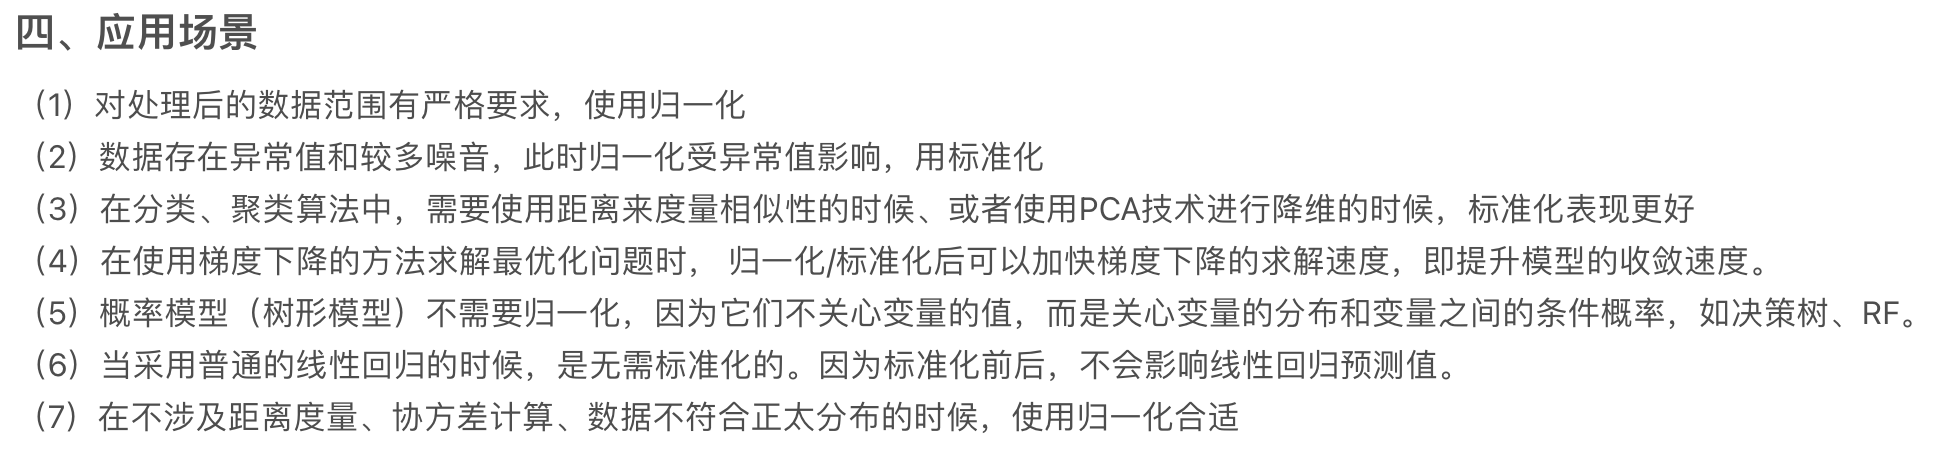

#### References: 
#### https://zhuanlan.zhihu.com/p/697471334  
#### https://blog.csdn.net/weixin_39168167/article/details/132397412

### Power Transformation

#### However, if using GAN models, all x and y variables need to be augmented at the same time. Hence, next still use the dataframe, 'new_ethereum_removed_outliers'

In [51]:
# So, StandardScaler can not be used in this senario since this dataset is very imbalanced, we need to solve this problem.
# PowerTransformation (yeo-johnson) can convert data from an arbitrary distribution to a normal distribution, thereby improving the accuracy of machine learning algorithms.
# It is a variant of the Box-Cox transform, which can handle all real numbers, including negative numbers.
power_transformer = PowerTransformer(method='yeo-johnson')
Ethereum_normalized = power_transformer.fit_transform(Features)
df_features_normalized = pd.DataFrame(Ethereum_normalized, columns=Features.columns)
df_Ethereum_normalized = pd.concat([df_features_normalized, Flag.reset_index(drop=True)], axis=1)
df_Ethereum_normalized

Avg min between sent tnx  Avg min between received tnx  \
0                     0.981565                      0.431583   
1                     1.457632                      0.690047   
2                     1.832567                      0.638788   
3                     1.424631                      1.141712   
4                     0.214434                      1.035124   
...                        ...                           ...   
9536                 -1.109512                     -1.197368   
9537                  1.456759                      0.292019   
9538                 -1.109512                     -1.197368   
9539                  1.190164                      0.611069   
9540                  1.608729                     -0.063020   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                    1.198968  1.935634      1.323588   
1                                    1.430968  1.560674      0.234260   
2                                    1.073563 -0.216555      0.361877   
3                                    0.970970  1.131789      0.302222   
4                                    0.956088  2.105879      0.724501   
...                                       ...       ...           ...   
9536                                -0.236193 -1.423650     -1.011544   
9537                                 0.307196  0.202037      0.505412   
9538                                -1.661385 -1.423650     -1.804680   
9539                                 0.813313  1.468284      1.061535   
9540                                 1.178717  0.994451     -0.367417   

      Number of Created Contracts  Unique Received From Addresses  \
0                       -0.396998                        2.007455   
1                       -0.396998                        0.648905   
2                       -0.396998                        1.209252   
3                       -0.396998                        0.933937   
4                        2.518819                        0.933937   
...                           ...                             ...   
9536                     2.518819                       -0.852468   
9537                    -0.396998                        1.277859   
9538                    -0.396998                       -2.261770   
9539                    -0.396998                        1.890878   
9540                    -0.396998                       -0.852468   

      Unique Sent To Addresses  Min value received  max value received   ...  \
0                     2.186232           -0.786249             0.848990  ...   
1                     1.478758           -0.786249            -0.471630  ...   
2                     0.167292           -0.571917            -0.821442  ...   
3                     1.440902           -0.786249             1.614181  ...   
4                     1.623736           -0.786249             0.298567  ...   
...                        ...                 ...                  ...  ...   
9536                 -1.527632           -0.786249            -1.417905  ...   
9537                  0.697501           -0.777768             0.268158  ...   
9538                 -1.527632           -0.786249            -1.417905  ...   
9539                  1.939222           -0.784004             0.530294  ...   
9540                  0.857320            0.192235             2.286306  ...   

      ERC20 uniq rec contract addr  Transaction frequency per day  \
0                         1.901042                      -0.227468   
1                         1.418120                      -0.986032   
2                         1.471109                      -1.069841   
3                         1.582212                      -0.983684   
4                         1.797934                       0.825614   
...                            ...                            ...   
9536                      1.167000                      -0.807945   
9537              

In [52]:
# For methods except GAN
X_train_normalized = power_transformer.fit_transform(X_train)
X_train_normalized

array([[ 0.28727501,  0.72989454,  1.11190079, ...,  0.75209507,
         0.31528628, -0.73290455],
       [ 1.50614971,  1.32871102,  0.81026487, ...,  1.39690146,
         0.10625607, -0.6107719 ],
       [-0.05974966, -1.20063707, -1.23425123, ...,  1.17709116,
        -0.72795021,  1.26895232],
       ...,
       [ 0.94971822,  0.98887367,  1.3551259 , ...,  1.31663199,
         0.65172345, -1.33008215],
       [ 0.19385858,  0.82173105,  0.79483904, ..., -0.73535553,
         0.28533732,  0.1743971 ],
       [ 1.29439777,  1.05099525,  1.2322106 , ...,  1.39691085,
        -0.36794071,  1.15685176]])

In [53]:
# Standardized the test set 
X_test_normalized = power_transformer.fit_transform(X_test)
X_test_normalized

array([[-1.09798661e+00,  6.26831600e-01,  7.60608604e-01, ...,
        -1.02090617e+00, -1.74633858e+00, -1.56570975e+00],
       [-1.09798661e+00,  8.47258664e-01,  7.39212486e-01, ...,
        -1.02090617e+00,  2.17590082e+00, -1.27736811e+00],
       [-6.52403845e-01, -1.18441510e+00, -1.44971948e+00, ...,
         1.68670274e+00, -1.28956054e-01,  5.68507144e-01],
       ...,
       [-2.59744623e-01,  5.28260652e-01,  6.73775819e-01, ...,
        -3.29704026e-01,  2.91364975e-01,  8.57110377e-01],
       [ 3.54687558e-01, -8.12423294e-02,  1.22314632e-02, ...,
         1.18663238e+00,  1.77753014e+00,  2.19603677e+00],
       [-3.18650756e-01,  4.70150703e-01,  9.46878588e-01, ...,
         3.86610323e-04,  2.90784587e-01,  2.86665083e+00]])

### Standardization

In [54]:
sc = StandardScaler()
X_train_standardscaled = sc.fit_transform(X_train)
df_X_train_standardscaled = pd.DataFrame(X_train_standardscaled, columns=X_train.columns)
df_X_train_standardscaled

Avg min between sent tnx  Avg min between received tnx  \
0                    -0.239761                     -0.199556   
1                     0.605984                      0.978426   
2                    -0.241388                     -0.350594   
3                    -0.241255                     -0.350594   
4                    -0.241856                     -0.189546   
...                        ...                           ...   
7627                 -0.241186                     -0.350594   
7628                 -0.242105                     -0.350594   
7629                 -0.206485                      0.043065   
7630                 -0.240419                     -0.137785   
7631                 -0.021032                      0.142763   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                    1.097351  0.123910      0.099379   
1                                    0.136321 -0.131970     -0.161187   
2                                   -0.678875 -0.137088     -0.167954   
3                                   -0.678794 -0.135382     -0.167954   
4                                   -0.278856 -0.084206     -0.112119   
...                                       ...       ...           ...   
7627                                -0.678836 -0.137088     -0.167954   
7628                                -0.678307 -0.140499     -0.167954   
7629                                 2.498461 -0.002324      0.006320   
7630                                 0.102998 -0.056912     -0.085047   
7631                                 1.700733 -0.017677     -0.107043   

      Number of Created Contracts  Unique Received From Addresses  \
0                       -0.025444                       -0.069960   
1                       -0.025444                       -0.058665   
2                       -0.025444                       -0.081255   
3                       -0.025444                       -0.081255   
4                       -0.025444                       -0.081255   
...                           ...                             ...   
7627                    -0.025444                       -0.081255   
7628                    -0.025444                       -0.081255   
7629                    -0.025444                       -0.007837   
7630                    -0.025444                       -0.075608   
7631                    -0.025444                       -0.002190   

      Unique Sent To Addresses  Min value received  max value received   ...  \
0                    -0.087973           -0.194251            -0.022512  ...   
1                    -0.081058           -0.195925            -0.003175  ...   
2                    -0.074143            0.402514            -0.013947  ...   
3                    -0.074143            0.402514            -0.013947  ...   
4                     0.140231           -0.199542            -0.024828  ...   
...                        ...                 ...                  ...  ...   
7627                 -0.074143            0.402514            -0.013947  ...   
7628                 -0.087973           -0.197542            -0.024890  ...   
7629                 -0.087973           -0.199561            -0.009595  ...   
7630                 -0.081058           -0.199825            -0.024883  ...   
7631                  0.181722           -0.199949            -0.003175  ...   

      ERC20 uniq rec addr  ERC20 uniq rec contract addr  \
0               -0.091458                     -0.328524   
1               -0.091458                     -0.328524   
2               -0.091458                     -0.328524   
3               -0.091458                     -0.328524   
4               -0.091458                     -0.328524   
...                   ...                           ...   
7627            -0.091458                     -0.328524   
7628            -0.077521                     -0.248965   
7629            -0.091458              

In [55]:
# Standardized the test set 
X_test_standardscaled = sc.fit_transform(X_test)
X_test_standardscaled

array([[-0.23062146, -0.26479445,  0.01193957, ..., -0.04753906,
        -0.36678346, -0.0613584 ],
       [-0.23062146, -0.14201407, -0.02907638, ..., -0.04753906,
         1.86552682, -0.05967937],
       [-0.2305418 , -0.35542527, -0.67917842, ...,  0.15255588,
        -0.21796218, -0.03617287],
       ...,
       [-0.23031586, -0.29393955, -0.14137419, ..., -0.04725886,
        -0.14394182, -0.0277777 ],
       [-0.22819666, -0.35025603, -0.61777571, ..., -0.03147435,
         0.72054609,  0.1233355 ],
       [-0.23036897, -0.30658391,  0.47910201, ..., -0.04692203,
        -0.14406298,  1.77438707]])

## SMOTE

In [56]:
# Disadvantage: If the samples in a few classes are distant and appear in a majority class, synthesizing new data can cause a class error.
smote = SMOTE(random_state=5011)
print(f'Shape of the training before SMOTE: {X_train_normalized.shape, y_train.shape}')

X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after SMOTE: {X_train_smote.shape, y_train_smote.shape}')

Shape of the training before SMOTE: ((7632, 34), (7632,))
Shape of the training after SMOTE: ((11864, 34), (11864,))


## BORDERLINE SMOTE

In [57]:
# If all neighbors are majority classes and these sample data are ignored when creating the composite data, it classifies any few observations as noise points. 
# Furthermore, it classifies some points as boundary points that have both majority and minority classes as neighborhoods, and completely resampling from these points.
# "borderline-1" similar to smote
borderline_smote = BorderlineSMOTE(random_state=5011, kind="borderline-1")
print(f'Shape of the training before BorderlineSMOTE: {X_train_normalized.shape, y_train.shape}')

X_train_borderlinesmote, y_train_borderlinesmote = borderline_smote.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after BorderlineSMOTE: {X_train_borderlinesmote.shape, y_train_borderlinesmote.shape}')

Shape of the training before BorderlineSMOTE: ((7632, 34), (7632,))
Shape of the training after BorderlineSMOTE: ((11864, 34), (11864,))


## ADASYN

In [58]:
# ADASYN generate synthetic samples based on the proximity of samples from each minority class. 
# In contrast to SMOTE, ADASYN assigns a weight to each minority class sample that represents how many synthetic samples need to be generated for that sample. 
# The weight is calculated based on the proportion of the majority classes in the sample's neighbors. 
# If a minority class sample is in a neighborhood where the majority class dominates, it will gain a higher weight, resulting in more composite samples.
# The main advantage of ADASYN is its ability to adaptively generate synthetic samples based on data distribution, especially for datasets that vary widely in intensity. 
# It can generate more composite samples in sparser areas to better capture features in a small number of categories
adasyn = ADASYN(sampling_strategy='auto', random_state=5011)
print(f'Shape of the training before ADASYN: {X_train_normalized.shape, y_train.shape}')

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after ADASYN: {X_train_adasyn.shape, y_train_adasyn.shape}')

Shape of the training before ADASYN: ((7632, 34), (7632,))
Shape of the training after ADASYN: ((11897, 34), (11897,))


## Random OverSampling

In [59]:
ros = RandomOverSampler(random_state=5011)
print(f'Shape of the training before RandomOverSampler: {X_train_normalized.shape, y_train.shape}')

X_train_ros, y_train_ros = ros.fit_resample(X_train_normalized, y_train)
print(f'Shape of the training after RandomOverSampler: {X_train_ros.shape, y_train_ros.shape}')

Shape of the training before RandomOverSampler: ((7632, 34), (7632,))
Shape of the training after RandomOverSampler: ((11864, 34), (11864,))


#### How many samples need GAN models to generate? -- 11864 - 7632 = 4232 / 11897 - 7632 = 4265

## GAN

### Global Functions and Paramaters

In [61]:
# Global Parameters:
# 3-layers, learning rates: 5*10^-4, 10 training epochs
# some parameters based on the literature: Using generative adversarial networks for improving classification effectiveness in credit card fraud detection

# Origin:
#### 'Too few layers will hinder the ability of a network to build a representation at a level of abstraction
#### which is appropriate to adequately capture data complexity, too many layers will complicate training substantially and will likely cause overfitting. 
#### As a reasonable tradeoff, networks with 2 and 3 layers were tested in the generator, in the discriminator, and in the classifier.'

input_dim = 34  # Size of the noise vector, input size is same with the dimension of the dataset
output_dim = df_features_normalized.shape[1]  # Number of features in your dataset
n_classes = 2
# optimizer = adam_v2.Adam(lr=0.0005)  # Optimizer
optimizer = Adam(learning_rate=0.0005) 
SEED = 5011
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
weight_init = glorot_normal(seed=SEED)

#wgan_gp_optimizer = adam_v2.Adam(learning_rate=0.00001, beta_1=0.5, beta_2=0.9)
#wgan_optimizer = rmsprop_v2.RMSprop(lr=0.00001)
wgan_optimizer = RMSprop(learning_rate=0.00001)
clip_value = 0.1
num_classes = 2

In [62]:
def merge(X_train, y_train, generated_data):
    X_train_generated = np.concatenate((X_train, generated_data))
    y_generated = np.array(generated_data.shape[0] * [1])
    y_train_generated = np.concatenate((y_train, y_generated))

    return X_train_generated, y_train_generated

In [63]:
def boxplot_compare(df1, df2, c1, c2, gan_label, title):
  fig, ax = plt.subplots(figsize=(16,10))
  bp1 = df1.boxplot(color=c1, showfliers=False)
  bp2 = df2.boxplot(color=c2, showfliers=False)

  patch1 = mpatches.Patch(color=c1, label='Original')
  patch2 = mpatches.Patch(color=c2, label=gan_label)
  plt.legend(handles=[patch1, patch2], prop={'size': 16})
  ax.set_title(title)
  plt.xticks(rotation=90)
  plt.show()


def GAN_Generate_Data(generator, number_of_data):
    noise = np.random.normal(0, 1, size=(number_of_data, input_dim))
    generated_data = generator.predict(noise)
    X_train_generated = np.concatenate((X_train, generated_data))
    y_generated = np.array(generated_data.shape[0] * [1])
    y_train_generated = np.concatenate((y_train, y_generated))
    return generated_data, X_train_generated, y_train_generated    

### ------------------------------------------------------------------------------------------------------------------------------------------

In [63]:
def Generator():
    noise = Input(shape=(input_dim,))
    
    x = Dense(128, kernel_initializer=weight_init)(noise)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(256, kernel_initializer=weight_init)(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(512, kernel_initializer=weight_init)(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    out = Dense(output_dim, kernel_initializer=weight_init)(x)
    
    model = Model(inputs=noise, outputs=out)
    return model

def Discriminator():
    data = Input(shape=(input_dim,))
    
    x = Dense(512, kernel_initializer=weight_init)(data)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(256, kernel_initializer=weight_init)(x)
    x = LeakyReLU(0.2)(x)

    x = Dense(128, kernel_initializer=weight_init)(x)
    x = LeakyReLU(0.2)(x)
    
    out = Dense(1, activation='sigmoid', kernel_initializer=weight_init)(x)
    
    model = Model(inputs=data, outputs=out)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [64]:
def training_model(generator, discriminator):
    # Freeze the discriminator when training generator
    discriminator.trainable = False

    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')

    return model

In [65]:
class GAN:
    def __init__(self, generator_model, discriminator_model):
        self.z = input_dim
        self.optimizer = optimizer

        self.generator = generator_model
        self.discriminator = discriminator_model

        self.training_model = training_model(self.generator, self.discriminator)
        self.loss_D, self.loss_G = [], []

    def train(self, data, batch_size=128, steps_per_epoch=50):

        for epoch in range(steps_per_epoch):
            # Select a random batch of transactions data
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_data = data[idx]

            # generate a batch of new data
            noise = np.random.normal(0, 1, size=(batch_size, input_dim))
            fake_data= self.generator.predict(noise)

            # Train D
            loss_real = self.discriminator.train_on_batch(real_data, np.ones(batch_size))
            loss_fake = self.discriminator.train_on_batch(fake_data, np.zeros(batch_size))
            self.loss_D.append(0.5 * np.add(loss_fake, loss_real))

            # Train G
            noise = np.random.normal(0, 1, size=(batch_size, input_dim))
            loss_G = self.training_model.train_on_batch(noise, np.ones(batch_size))
            self.loss_G.append(loss_G)

            if (epoch + 1) * 10 % steps_per_epoch == 0:
                print('Steps (%d / %d): [Loss_D_real: %f, Loss_D_fake: %f, acc: %.2f%%] [Loss_G: %f]' %
                  (epoch+1, steps_per_epoch, loss_real[0], loss_fake[0], 100*self.loss_D[-1][1], loss_G))

        return

In [66]:
D = Discriminator()
G = Generator()

D.summary()
G.summary()

EPOCHS = 10
gan = GAN(generator_model=G, discriminator_model=D)

for epoch in range(EPOCHS):
    print('EPOCH # ', epoch + 1, '-' * 50)
    gan.train(X_train_normalized, batch_size=128, steps_per_epoch=100)
    if (epoch+1) % 1 == 0:
        gan.generator.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GAN/gan_generator.h5')

Metal device set to: Apple M1 Pro


2024-07-09 19:46:21.831408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-09 19:46:21.832340: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 34)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               17920     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0     

2024-07-09 19:46:22.229492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-09 19:46:22.232322: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-09 19:46:22.326706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-09 19:46:22.660248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-09 19:46:23.386892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Steps (10 / 100): [Loss_D_real: 0.327410, Loss_D_fake: 0.547698, acc: 87.89%] [Loss_G: 1.125709]
Steps (20 / 100): [Loss_D_real: 0.611413, Loss_D_fake: 0.412722, acc: 77.73%] [Loss_G: 1.762985]
Steps (30 / 100): [Loss_D_real: 0.705043, Loss_D_fake: 0.144615, acc: 77.34%] [Loss_G: 3.490965]
Steps (40 / 100): [Loss_D_real: 0.430967, Loss_D_fake: 0.067100, acc: 92.58%] [Loss_G: 4.638685]
Steps (50 / 100): [Loss_D_real: 0.194041, Loss_D_fake: 0.069108, acc: 96.88%] [Loss_G: 6.063116]
Steps (60 / 100): [Loss_D_real: 0.183734, Loss_D_fake: 0.063271, acc: 96.48%] [Loss_G: 7.060724]
Steps (70 / 100): [Loss_D_real: 0.037128, Loss_D_fake: 0.023162, acc: 99.61%] [Loss_G: 10.090886]
Steps (80 / 100): [Loss_D_real: 0.064534, Loss_D_fake: 0.012554, acc: 98.44%] [Loss_G: 14.501024]
Steps (90 / 100): [Loss_D_real: 0.074155, Loss_D_fake: 0.004416, acc: 98.83%] [Loss_G: 19.150745]
Steps (100 / 100): [Loss_D_real: 0.043363, Loss_D_fake: 0.005656, acc: 99.61%] [Loss_G: 13.504992]
EPOCH #  2 --------------

 44/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

2024-07-16 23:55:56.583801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


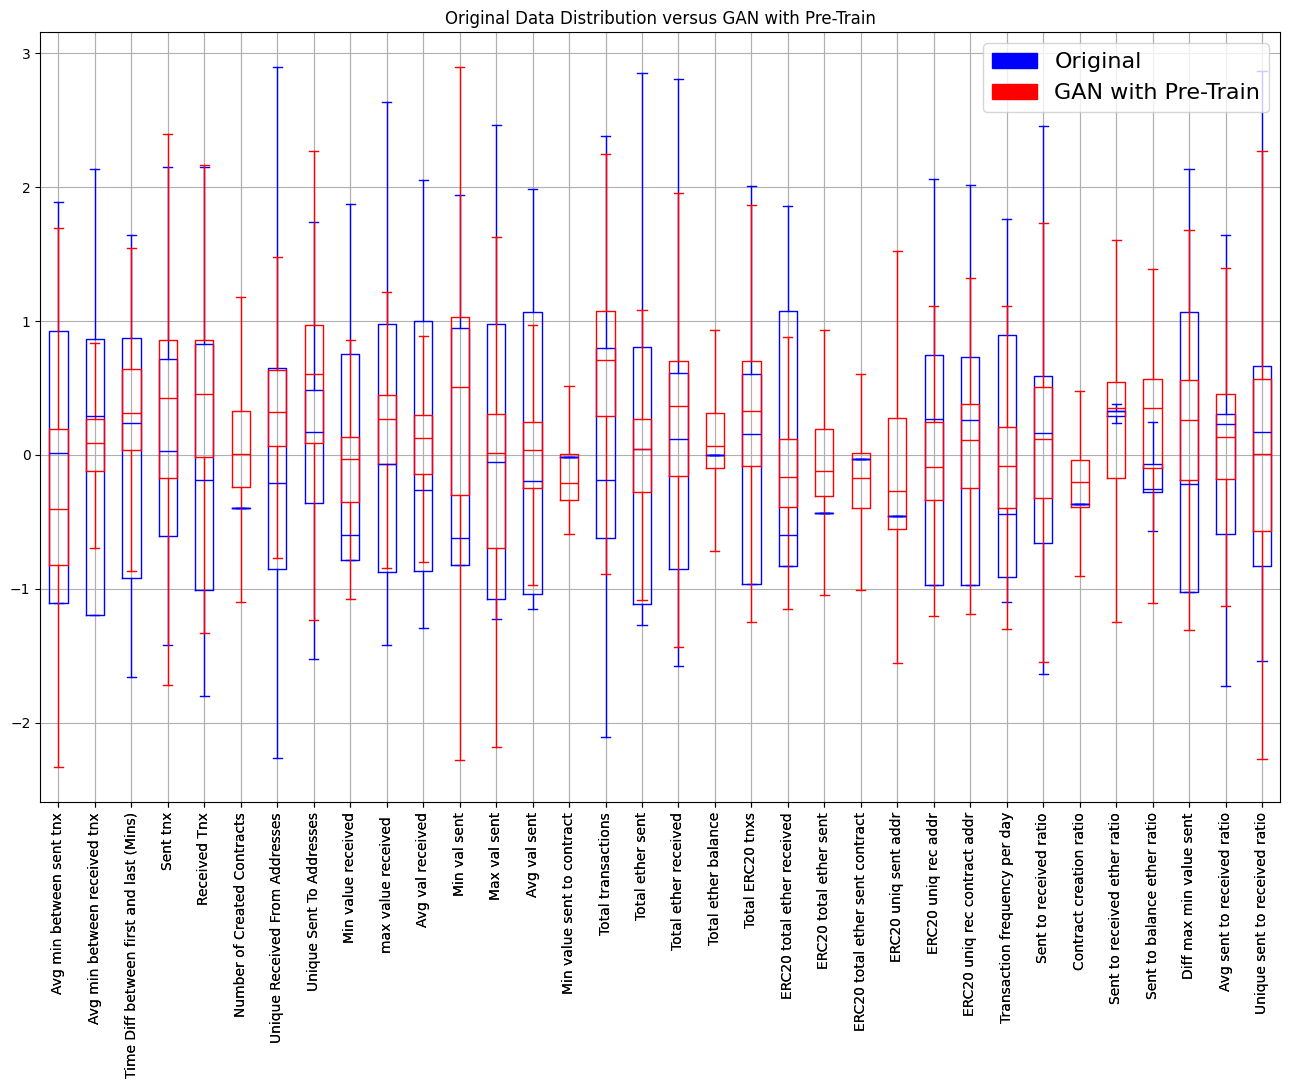

In [64]:
# load generator
generator = tf.keras.models.load_model('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/GAN/gan_generator.h5')

# Generate fraud data using the custom function
gan_4232, X_train_gan_generated_4232, y_train_gan_generated_4232 = GAN_Generate_Data(generator, 4232)
df_gan_4232 = pd.DataFrame(data=gan_4232, index=None, columns=df_features_normalized.columns)

# compare with real data
boxplot_compare(df_features_normalized, df_gan_4232, 'blue', 'red', 'GAN with Pre-Train', 'Original Data Distribution versus GAN with Pre-Train')

In [65]:
# Merge the generated data with the original training set
X_train_gan_generated, y_train_gan_generated = merge(X_train_normalized, y_train, gan_4232)

## WGAN (Wasserstein GAN)

In [96]:
# Same with the GAN
def wasserstein_loss(y_true, y_pred):
        return K.mean(y_true * y_pred)
    
def Generator_WGAN():
    noise = Input(shape=(input_dim,))
    
    x = Dense(128, kernel_initializer=weight_init)(noise)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(256, kernel_initializer=weight_init)(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(512, kernel_initializer=weight_init)(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    out = Dense(output_dim, kernel_initializer=weight_init)(x)
    
    model = Model(inputs=noise, outputs=out)
    return model

def Discriminator_WGAN():
    data = Input(shape=(input_dim,))
    
    x = Dense(512, kernel_initializer=weight_init)(data)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(256, kernel_initializer=weight_init)(x)
    x = LeakyReLU(0.2)(x)

    x = Dense(128, kernel_initializer=weight_init)(x)
    x = LeakyReLU(0.2)(x)
    
    out = Dense(1, kernel_initializer=weight_init)(x)
    
    model = Model(inputs=data, outputs=out)
    model.compile(optimizer = wgan_optimizer, loss = wasserstein_loss)
    return model

In [97]:
def training_model(generator, discriminator):
    # Freeze the discriminator when training generator
    discriminator.trainable = False

    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(optimizer=wgan_optimizer, loss = wasserstein_loss)

    return model

In [98]:
class WGAN:
    def __init__(self, generator_model, discriminator_model):
        self.z = input_dim
        self.optimizer = optimizer

        self.generator = generator_model
        self.discriminator = discriminator_model

        self.training_model = training_model(self.generator, self.discriminator)
        self.loss_D, self.loss_G = [], []

    def train(self, data, batch_size=128, steps_per_epoch=50):

        for epoch in range(steps_per_epoch):
            # Select a random batch of transactions data
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_data = data[idx]

            # generate a batch of new data
            noise = np.random.normal(0, 1, size=(batch_size, input_dim))
            fake_data= self.generator.predict(noise)
            for _ in range(2):
                # Train D
                loss_real = self.discriminator.train_on_batch(real_data, -np.ones(batch_size))
                loss_fake = self.discriminator.train_on_batch(fake_data, np.zeros(batch_size))
                loss_d = 0.5 * np.add(loss_real, loss_fake)

                self.loss_D.append(loss_d)

                # clip the weight for D
                for l in self.discriminator.layers:
                    weights = l.get_weights()
                    weights = [np.clip(w, -clip_value, clip_value) for w in weights]
                    l.set_weights(weights)
                
            # Train G
            noise = np.random.normal(0, 1, size=(batch_size, input_dim))
            loss_G = self.training_model.train_on_batch(noise, -np.ones(batch_size))
            self.loss_G.append(loss_G)

            if (epoch + 1) * 10 % steps_per_epoch == 0:
                print('Steps (%d / %d): [Loss_D_real: %f, Loss_D_fake: %f] [loss_D: %f] [Loss_G: %f]' %
                      (epoch + 1, steps_per_epoch, loss_real, loss_fake, loss_d, loss_G))

        return

In [99]:
D = Discriminator_WGAN()
G = Generator_WGAN()

D.summary()
G.summary()

EPOCHS = 10
wgan = WGAN(generator_model=G, discriminator_model=D)

for epoch in range(EPOCHS):
    print('EPOCH # ', epoch + 1, '-' * 50)
    wgan.train(X_train_normalized, batch_size=128, steps_per_epoch=100)
    if (epoch+1) % 1 == 0:
        wgan.generator.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/WGAN/wgan_generator.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 34)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               17920     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128)               0   

2024-07-09 20:14:41.930528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-09 20:14:42.248112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-09 20:14:44.036204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Steps (10 / 100): [Loss_D_real: -0.073435, Loss_D_fake: 0.000000] [loss_D: -0.036718] [Loss_G: -0.120709]
Steps (20 / 100): [Loss_D_real: -0.161639, Loss_D_fake: 0.000000] [loss_D: -0.080820] [Loss_G: -0.217758]
Steps (30 / 100): [Loss_D_real: -0.280854, Loss_D_fake: 0.000000] [loss_D: -0.140427] [Loss_G: -0.312237]
Steps (40 / 100): [Loss_D_real: -0.360157, Loss_D_fake: 0.000000] [loss_D: -0.180078] [Loss_G: -0.420973]
Steps (50 / 100): [Loss_D_real: -0.480079, Loss_D_fake: 0.000000] [loss_D: -0.240040] [Loss_G: -0.539155]
Steps (60 / 100): [Loss_D_real: -0.577516, Loss_D_fake: 0.000000] [loss_D: -0.288758] [Loss_G: -0.660352]
Steps (70 / 100): [Loss_D_real: -0.739993, Loss_D_fake: 0.000000] [loss_D: -0.369996] [Loss_G: -0.788734]
Steps (80 / 100): [Loss_D_real: -0.824363, Loss_D_fake: 0.000000] [loss_D: -0.412181] [Loss_G: -0.926719]
Steps (90 / 100): [Loss_D_real: -0.991146, Loss_D_fake: 0.000000] [loss_D: -0.495573] [Loss_G: -1.068533]
Steps (100 / 100): [Loss_D_real: -1.050690, Lo

In [66]:
# load generator
wgan_generator = tf.keras.models.load_model('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/WGAN/wgan_generator.h5')

# Generate fraud data using the custom function
wgan_4232, X_train_wgan_generated_4232, y_train_wgan_generated_4232 = GAN_Generate_Data(wgan_generator, 4232)
df_wgan_generated_4232 = pd.DataFrame(data=wgan_4232, index=None, columns=df_features_normalized.columns)

# compare with real data
boxplot_compare(df_features_normalized, df_wgan_generated_4232, 'blue', 'red', 'WGAN with Pre-Train', 'Original Data Distribution versus WGAN with Pre-Train')

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [67]:
# Merge the generated data with the original training set
X_train_wgan_generated, y_train_wgan_generated = merge(X_train_normalized, y_train, wgan_4232)

## WGAN-GP (Wasserstein GAN with Gradient Penalty)

In [111]:
# Same with the GAN
def Generator_WGAN_GP():
    noise = Input(shape=(input_dim,))
    
    x = Dense(128, kernel_initializer=weight_init)(noise)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(256, kernel_initializer=weight_init)(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(512, kernel_initializer=weight_init)(x)
    x = BatchNormalization(momentum=0.5)(x)
    x = LeakyReLU(0.2)(x)
    
    out = Dense(output_dim, kernel_initializer=weight_init)(x)
    
    model = Model(inputs=noise, outputs=out)
    return model

def Discriminator_WGAN_GP():
    data = Input(shape=(input_dim,))
    
    x = Dense(512, kernel_initializer=weight_init)(data)
    x = LeakyReLU(0.2)(x)
    
    x = Dense(256, kernel_initializer=weight_init)(x)
    x = LeakyReLU(0.2)(x)

    x = Dense(128, kernel_initializer=weight_init)(x)
    x = LeakyReLU(0.2)(x)
    
    out = Dense(1, kernel_initializer=weight_init)(x)
    
    model = Model(inputs=data, outputs=out)
    model.compile(optimizer=wgan_optimizer, loss=wasserstein_loss)
    return model

In [112]:
def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)
        
class WGAN_GP:
    def __init__(self, generator_model, discriminator_model, input_dim, optimizer, gp_weight=10.0):
        self.z_dim = input_dim
        self.optimizer = optimizer
        self.gp_weight = gp_weight

        self.generator = generator_model
        self.discriminator = discriminator_model

        self.training_model = self.build_training_model()
        self.loss_D, self.loss_G = [], []

    def gradient_penalty(self, real_data, fake_data):
        alpha = tf.random.uniform(shape=[real_data.shape[0], 1], minval=0., maxval=1.)
        interpolated = alpha * real_data + (1 - alpha) * fake_data

        with tf.GradientTape() as tape:
            tape.watch(interpolated)
            predictions = self.discriminator(interpolated, training=True)

        grads = tape.gradient(predictions, [interpolated])[0]
        grads_norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1))
        penalty = tf.reduce_mean((grads_norm - 1.0) ** 2)
        return penalty
        
    def build_training_model(self):
        noise = tf.keras.Input(shape=(self.z_dim,))
        fake_data = self.generator(noise)
        self.discriminator.trainable = False
        validity = self.discriminator(fake_data)

        training_model = tf.keras.Model(noise, validity)
        training_model.compile(optimizer=self.optimizer, loss=wasserstein_loss)

        return training_model

    def train(self, data, batch_size=128, steps_per_epoch=50, n_critic=5):
        for epoch in range(steps_per_epoch):
            for _ in range(n_critic):
                idx = np.random.randint(0, data.shape[0], batch_size)
                real_data = data[idx]

                noise = np.random.normal(0, 1, (batch_size, self.z_dim))
                fake_data = self.generator.predict(noise)

                with tf.GradientTape() as tape:
                    d_loss_real = self.discriminator(real_data, training=True)
                    d_loss_fake = self.discriminator(fake_data, training=True)
                    gp = self.gradient_penalty(real_data, fake_data)

                    d_loss = tf.reduce_mean(d_loss_fake) - tf.reduce_mean(d_loss_real) + self.gp_weight * gp

                grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
                self.optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

                self.loss_D.append(d_loss.numpy())

            noise = np.random.normal(0, 1, (batch_size, self.z_dim))
            g_loss = self.training_model.train_on_batch(noise, -np.ones((batch_size, 1)))

            self.loss_G.append(g_loss)

            if (epoch + 1) * 10 % steps_per_epoch == 0:
                print(f'Steps ({epoch + 1} / {steps_per_epoch}): [Loss_D: {d_loss.numpy()}] [Loss_G: {g_loss}]')

        return

In [113]:
G = Generator_WGAN_GP()
D = Discriminator_WGAN_GP()

D.summary()
G.summary()

EPOCHS = 10
wgan_gp = WGAN_GP(generator_model=G, discriminator_model=D, input_dim=input_dim, optimizer = wgan_gp_optimizer)

for epoch in range(EPOCHS):
    print('EPOCH # ', epoch + 1, '-' * 50)
    wgan_gp.train(X_train_normalized, batch_size=128, steps_per_epoch=100)
    if (epoch+1) % 1 == 0:
        wgan.generator.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/WGAN_GP/wgan_gp_generator.h5')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 34)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               17920     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 128)               0   

2024-07-09 20:29:19.237284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-09 20:29:20.774677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Steps (10 / 100): [Loss_D: 5.900083541870117] [Loss_G: -0.05850962549448013]
Steps (20 / 100): [Loss_D: 5.83833646774292] [Loss_G: -0.08415127545595169]
Steps (30 / 100): [Loss_D: 5.92930269241333] [Loss_G: -0.09374479949474335]
Steps (40 / 100): [Loss_D: 5.978758335113525] [Loss_G: -0.1311320960521698]
Steps (50 / 100): [Loss_D: 5.916944980621338] [Loss_G: -0.13907170295715332]
Steps (60 / 100): [Loss_D: 5.98441219329834] [Loss_G: -0.15697598457336426]
Steps (70 / 100): [Loss_D: 5.973219394683838] [Loss_G: -0.16953152418136597]
Steps (80 / 100): [Loss_D: 5.948033809661865] [Loss_G: -0.20031136274337769]
Steps (90 / 100): [Loss_D: 6.029285430908203] [Loss_G: -0.22796402871608734]
Steps (100 / 100): [Loss_D: 6.064797401428223] [Loss_G: -0.23837637901306152]
EPOCH #  2 --------------------------------------------------
Steps (10 / 100): [Loss_D: 6.064477443695068] [Loss_G: -0.26111453771591187]
Steps (20 / 100): [Loss_D: 6.120517253875732] [Loss_G: -0.27534040808677673]
Steps (30 / 100):

In [68]:
# load generator
wgan_gp_generator = tf.keras.models.load_model('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/WGAN_GP/wgan_gp_generator.h5')

# Generate fraud data using the custom function
wgan_gp_4232, X_train_wgan_gp_generated_4232, y_train_wgan_gp_generated_4232 = GAN_Generate_Data(wgan_gp_generator, 4232)
df_wgan_gp_generated_4232 = pd.DataFrame(data=wgan_gp_4232, index=None, columns=df_features_normalized.columns)

# compare with real data
boxplot_compare(df_features_normalized, df_wgan_gp_generated_4232, 'blue', 'red', 'WGAN_GP with Pre-Train', 'Original Data Distribution versus WGAN_GP with Pre-Train')

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [69]:
# Merge the generated data with the original training set
X_train_wgan_gp_generated, y_train_wgan_gp_generated = merge(X_train_normalized, y_train, wgan_gp_4232)

# Modelling & Evaluation

## Traditional Machine Learning Methods

### Random Forest

In [77]:
# Random Forest + SMOTE
rf_somte = RandomForestClassifier(n_estimators=200, random_state=42)
rf_somte.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_somte.predict(X_test_normalized)
print("Accuracy of SMOTE and Random Forest:", accuracy_score(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))

Accuracy of SMOTE and Random Forest: 0.8365636458878994
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89      1495
         1.0       0.57      0.96      0.72       414

    accuracy                           0.84      1909
   macro avg       0.78      0.88      0.80      1909
weighted avg       0.90      0.84      0.85      1909



In [415]:
# All evaluations:
print("Precision of SMOTE and Random Forest:", precision_score(y_test, y_pred_rf_smote))
print("Recall of SMOTE and Random Forest:", recall_score(y_test, y_pred_rf_smote))
print("F1 Score of SMOTE and Random Forest:", f1_score(y_test, y_pred_rf_smote))
print("AUC of SMOTE and Random Forest:", roc_auc_score(y_test, y_pred_rf_smote))

Precision of SMOTE and Random Forest: 0.5739130434782609
Recall of SMOTE and Random Forest: 0.9565217391304348
F1 Score of SMOTE and Random Forest: 0.7173913043478262
AUC of SMOTE and Random Forest: 0.8799331103678931


In [303]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/rf_somte_model.pkl', 'wb') as file:
    pickle.dump(rf_somte, file)

In [78]:
# Random Forest + borderlinesmote
rf_borderlinesmote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_borderlinesmote.fit(X_train_borderlinesmote, y_train_borderlinesmote)
y_pred_rf_borderlinesmote = rf_borderlinesmote.predict(X_test_normalized)
print("Accuracy of Borderline-SMOTE and Random Forest:", accuracy_score(y_test, y_pred_rf_borderlinesmote))
print(classification_report(y_test, y_pred_rf_borderlinesmote))

Accuracy of Borderline-SMOTE and Random Forest: 0.8323729701414353
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      1495
         1.0       0.57      0.97      0.72       414

    accuracy                           0.83      1909
   macro avg       0.78      0.88      0.80      1909
weighted avg       0.90      0.83      0.85      1909



In [414]:
# All evaluations:
print("Precision of Borderline-SMOTE and Random Forest:", precision_score(y_test, y_pred_rf_borderlinesmote))
print("Recall of Borderline-SMOTE and Random Forest:", recall_score(y_test, y_pred_rf_borderlinesmote))
print("F1 Score of Borderline-SMOTE and Random Forest:", f1_score(y_test, y_pred_rf_borderlinesmote))
print("AUC of Borderline-SMOTE and Random Forest:", roc_auc_score(y_test, y_pred_rf_borderlinesmote))

Precision of Borderline-SMOTE and Random Forest: 0.5661971830985916
Recall of Borderline-SMOTE and Random Forest: 0.9710144927536232
F1 Score of Borderline-SMOTE and Random Forest: 0.7153024911032028
AUC of Borderline-SMOTE and Random Forest: 0.8824972129319955


In [305]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/rf_borderlinesmote_model.pkl', 'wb') as file:
    pickle.dump(rf_borderlinesmote, file)

In [79]:
# Random Forest + ADASYN
rf_adasyn = RandomForestClassifier(n_estimators=200, random_state=42)
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_rf_adasyn = rf_adasyn.predict(X_test_normalized)
print("Accuracy of ADASYN and Random Forest:", accuracy_score(y_test, y_pred_rf_adasyn))
print(classification_report(y_test, y_pred_rf_adasyn))

Accuracy of ADASYN and Random Forest: 0.7757988475641697
              precision    recall  f1-score   support

         0.0       0.99      0.72      0.83      1495
         1.0       0.49      0.97      0.65       414

    accuracy                           0.78      1909
   macro avg       0.74      0.85      0.74      1909
weighted avg       0.88      0.78      0.80      1909



In [413]:
# All evaluations:
print("Precision of ADASYN and Random Forest:", precision_score(y_test, y_pred_rf_adasyn))
print("Recall of ADASYN and Random Forest:", recall_score(y_test, y_pred_rf_adasyn))
print("F1 Score of ADASYN and Random Forest:", f1_score(y_test, y_pred_rf_adasyn))
print("AUC of ADASYN and Random Forest:", roc_auc_score(y_test, y_pred_rf_adasyn))

Precision of ADASYN and Random Forest: 0.49146341463414633
Recall of ADASYN and Random Forest: 0.9734299516908212
F1 Score of ADASYN and Random Forest: 0.653160453808752
AUC of ADASYN and Random Forest: 0.8472500929022668


In [306]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/rf_adasyn_model.pkl', 'wb') as file:
    pickle.dump(rf_adasyn, file)

In [80]:
# Random Forest + ROS
rf_ros = RandomForestClassifier(n_estimators=200, random_state=42)
rf_ros.fit(X_train_ros, y_train_ros)
y_pred_rf_ros = rf_ros.predict(X_test_normalized)
print("Accuracy of ROS and Random Forest:", accuracy_score(y_test, y_pred_rf_ros))
print(classification_report(y_test, y_pred_rf_ros))

Accuracy of ROS and Random Forest: 0.9753797799895233
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1495
         1.0       0.96      0.92      0.94       414

    accuracy                           0.98      1909
   macro avg       0.97      0.96      0.96      1909
weighted avg       0.98      0.98      0.98      1909



In [412]:
# All evaluations:
print("Precision of ROS and Random Forest:", precision_score(y_test, y_pred_rf_ros))
print("Recall of ROS and Random Forest:", recall_score(y_test, y_pred_rf_ros))
print("F1 Score of ROS and Random Forest:", f1_score(y_test, y_pred_rf_ros))
print("AUC of ROS and Random Forest:", roc_auc_score(y_test, y_pred_rf_ros))

Precision of ROS and Random Forest: 0.9622166246851386
Recall of ROS and Random Forest: 0.9227053140096618
F1 Score of ROS and Random Forest: 0.9420468557336621
AUC of ROS and Random Forest: 0.9563359345968042


In [307]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/rf_ros_model.pkl', 'wb') as file:
    pickle.dump(rf_ros, file)

In [103]:
# Random Forest + GAN
rf_gan = RandomForestClassifier(n_estimators=200, random_state=42)
rf_gan.fit(X_train_gan_generated, y_train_gan_generated)
y_pred_rf_gan = rf_gan.predict(X_test_normalized)
print("Accuracy of GAN and Random Forest:", accuracy_score(y_test, y_pred_rf_gan))
print(classification_report(y_test, y_pred_rf_gan))

Accuracy of GAN and Random Forest: 0.8349921424829754
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      1495
         1.0       0.57      0.98      0.72       414

    accuracy                           0.83      1909
   macro avg       0.78      0.89      0.80      1909
weighted avg       0.90      0.83      0.85      1909



In [411]:
# All evaluations:
print("Precision of GAN and Random Forest:", precision_score(y_test, y_pred_rf_gan))
print("Recall of GAN and Random Forest:", recall_score(y_test, y_pred_rf_gan))
print("F1 Score of GAN and Random Forest:", f1_score(y_test, y_pred_rf_gan))
print("AUC of GAN and Random Forest:", roc_auc_score(y_test, y_pred_rf_gan))

Precision of GAN and Random Forest: 0.5694249649368864
Recall of GAN and Random Forest: 0.9806763285024155
F1 Score of GAN and Random Forest: 0.7204968944099379
AUC of GAN and Random Forest: 0.8876625789669268


In [308]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/rf_gan_model.pkl', 'wb') as file:
    pickle.dump(rf_gan, file)

In [106]:
# Random Forest + WGAN
rf_wgan = RandomForestClassifier(n_estimators=200, random_state=42)
rf_wgan.fit(X_train_wgan_generated, y_train_wgan_generated)
y_pred_rf_wgan = rf_wgan.predict(X_test_normalized)
print("Accuracy of WGAN and Random Forest:", accuracy_score(y_test, y_pred_rf_wgan))
print(classification_report(y_test, y_pred_rf_wgan))

Accuracy of WGAN and Random Forest: 0.32634887375589317
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25      1495
         1.0       0.24      1.00      0.39       414

    accuracy                           0.33      1909
   macro avg       0.62      0.57      0.32      1909
weighted avg       0.84      0.33      0.28      1909



In [410]:
# All evaluations:
print("Precision of WGAN and Random Forest:", precision_score(y_test, y_pred_rf_wgan))
print("Recall of WGAN and Random Forest:", recall_score(y_test, y_pred_rf_wgan))
print("F1 Score of WGAN and Random Forest:", f1_score(y_test, y_pred_rf_wgan))
print("AUC of WGAN and Random Forest:", roc_auc_score(y_test, y_pred_rf_wgan))

Precision of WGAN and Random Forest: 0.24352941176470588
Recall of WGAN and Random Forest: 1.0
F1 Score of WGAN and Random Forest: 0.39167455061494794
AUC of WGAN and Random Forest: 0.5698996655518395


In [309]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/rf_wgan_model.pkl', 'wb') as file:
    pickle.dump(rf_wgan, file)

In [118]:
# Random Forest + WGAN-gp
rf_wgan_gp = RandomForestClassifier(n_estimators=200, random_state=42)
rf_wgan_gp.fit(X_train_wgan_gp_generated, y_train_wgan_gp_generated)
y_pred_rf_wgan_gp = rf_wgan_gp.predict(X_test_normalized)
print("Accuracy of WGAN-gp and Random Forest:", accuracy_score(y_test, y_pred_rf_wgan_gp))
print(classification_report(y_test, y_pred_rf_wgan_gp))

Accuracy of WGAN-gp and Random Forest: 0.37349397590361444
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33      1495
         1.0       0.26      1.00      0.41       414

    accuracy                           0.37      1909
   macro avg       0.63      0.60      0.37      1909
weighted avg       0.84      0.37      0.35      1909



In [409]:
# All evaluations:
print("Precision of WGAN-gp and Random Forest:", precision_score(y_test, y_pred_rf_wgan_gp))
print("Recall of WGAN-gp and Random Forest:", recall_score(y_test, y_pred_rf_wgan_gp))
print("F1 Score of WGAN-gp and Random Forest:", f1_score(y_test, y_pred_rf_wgan_gp))
print("AUC of WGAN-gp and Random Forest:", roc_auc_score(y_test, y_pred_rf_wgan_gp))

Precision of WGAN-gp and Random Forest: 0.2571428571428571
Recall of WGAN-gp and Random Forest: 1.0
F1 Score of WGAN-gp and Random Forest: 0.40909090909090906
AUC of WGAN-gp and Random Forest: 0.6


In [310]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/rf_wgan_gp_model.pkl', 'wb') as file:
    pickle.dump(rf_wgan_gp, file)

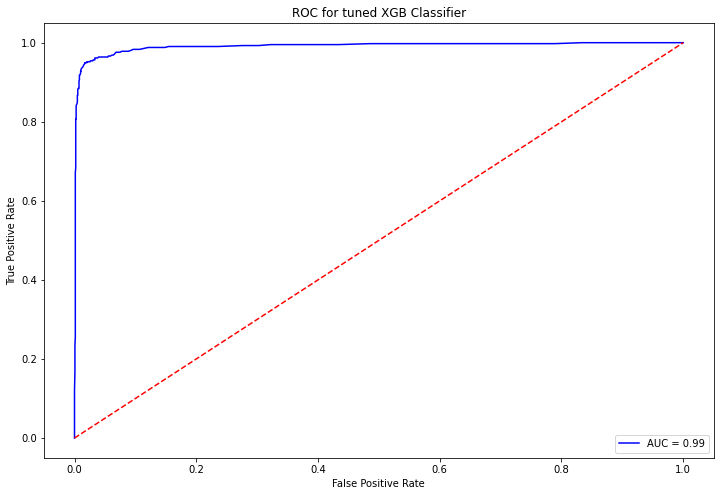

In [106]:
# Plotting AUC for untuned XGB Classifier
probs = rf_ros.predict_proba(X_test_normalized)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC for tuned XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

In [84]:
# XGBoost + SMOTE
# This parameter is followed by: 2023 - Detection_of_Fraudulent_Entities_in_Ethereum_Cryptocurrency_A_Boosting-based_Machine_Learning_Approach
# Also followed by: 2023 - Pahuja - EnLEFD‐DM  Ensemble Learning based Ethereum Fraud Detection using CRISP‐DM framework
xgb_smote = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=8, subsample = 0.9, n_estimators=300, random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_smote.predict(X_test_normalized)
print("Accuracy of SMOTE and XGBoost:", accuracy_score(y_test, y_pred_xgb_smote))
print(classification_report(y_test, y_pred_xgb_smote))

Accuracy of SMOTE and XGBoost: 0.8899947616553169
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      1495
         1.0       0.67      0.98      0.79       414

    accuracy                           0.89      1909
   macro avg       0.83      0.92      0.86      1909
weighted avg       0.92      0.89      0.90      1909



In [416]:
# All evaluations:
print("Precision of SMOTE and XGBoost:", precision_score(y_test, y_pred_xgb_smote))
print("Recall of SMOTE and XGBoost:", recall_score(y_test, y_pred_xgb_smote))
print("F1 Score of SMOTE and XGBoost:", f1_score(y_test, y_pred_xgb_smote))
print("AUC of SMOTE and XGBoost:", roc_auc_score(y_test, y_pred_xgb_smote))

Precision of SMOTE and XGBoost: 0.6683168316831684
Recall of SMOTE and XGBoost: 0.9782608695652174
F1 Score of SMOTE and XGBoost: 0.7941176470588235
AUC of SMOTE and XGBoost: 0.92190635451505


In [311]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/xgb_smote_model.pkl', 'wb') as file:
    pickle.dump(xgb_smote, file)

In [85]:
# XGBoost + borderlinesmote
xgb_borderlinesmote = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=8, subsample = 0.9, n_estimators=300, random_state=42)
xgb_borderlinesmote.fit(X_train_borderlinesmote, y_train_borderlinesmote)
y_pred_xgb_borderlinesmote = xgb_borderlinesmote.predict(X_test)
print("Accuracy of Borderline-SMOTE and XGBoost:", accuracy_score(y_test, y_pred_xgb_borderlinesmote))
print(classification_report(y_test, y_pred_xgb_borderlinesmote))

Accuracy of Borderline-SMOTE and XGBoost: 0.8418019905709796
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1495
         1.0       1.00      0.27      0.43       414

    accuracy                           0.84      1909
   macro avg       0.92      0.64      0.67      1909
weighted avg       0.87      0.84      0.80      1909



In [417]:
# All evaluations:
print("Precision of Borderline-SMOTE and XGBoost:", precision_score(y_test, y_pred_xgb_borderlinesmote))
print("Recall of Borderline-SMOTE and XGBoost:", recall_score(y_test, y_pred_xgb_borderlinesmote))
print("F1 Score of Borderline-SMOTE and XGBoost:", f1_score(y_test, y_pred_xgb_borderlinesmote))
print("AUC of Borderline-SMOTE and XGBoost:", roc_auc_score(y_test, y_pred_xgb_borderlinesmote))

Precision of Borderline-SMOTE and XGBoost: 1.0
Recall of Borderline-SMOTE and XGBoost: 0.27053140096618356
F1 Score of Borderline-SMOTE and XGBoost: 0.4258555133079848
AUC of Borderline-SMOTE and XGBoost: 0.6352657004830917


In [312]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/xgb_borderlinesmote_model.pkl', 'wb') as file:
    pickle.dump(xgb_borderlinesmote, file)

In [86]:
# XGBoost + ADASYN
xgb_adasyn = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=8, subsample = 0.9, n_estimators=300, random_state=42)
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_xgb_adasyn = xgb_adasyn.predict(X_test)
print("Accuracy of ADASYN and XGBoost:", accuracy_score(y_test, y_pred_xgb_adasyn))
print(classification_report(y_test, y_pred_xgb_adasyn))

Accuracy of ADASYN and XGBoost: 0.8423258250392875
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1495
         1.0       1.00      0.27      0.43       414

    accuracy                           0.84      1909
   macro avg       0.92      0.64      0.67      1909
weighted avg       0.87      0.84      0.80      1909



In [418]:
# All evaluations:
print("Precision of ADASYN and XGBoost:", precision_score(y_test, y_pred_xgb_adasyn))
print("Recall of ADASYN and XGBoost:", recall_score(y_test, y_pred_xgb_adasyn))
print("F1 Score of ADASYN and XGBoost:", f1_score(y_test, y_pred_xgb_adasyn))
print("AUC of ADASYN and XGBoost:", roc_auc_score(y_test, y_pred_xgb_adasyn))

Precision of ADASYN and XGBoost: 1.0
Recall of ADASYN and XGBoost: 0.27294685990338163
F1 Score of ADASYN and XGBoost: 0.42884250474383306
AUC of ADASYN and XGBoost: 0.6364734299516908


In [313]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/xgb_adasyn_model.pkl', 'wb') as file:
    pickle.dump(xgb_adasyn, file)

In [87]:
# XGBoost + ROS
xgb_ros = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=8, subsample = 0.9, n_estimators=300, random_state=42)
xgb_ros.fit(X_train_ros, y_train_ros)
y_pred_xgb_ros = xgb_ros.predict(X_test)
print("Accuracy of ROS and XGBoost:", accuracy_score(y_test, y_pred_xgb_ros))
print(classification_report(y_test, y_pred_xgb_ros))

Accuracy of ROS and XGBoost: 0.78365636458879
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1495
         1.0       1.00      0.00      0.00       414

    accuracy                           0.78      1909
   macro avg       0.89      0.50      0.44      1909
weighted avg       0.83      0.78      0.69      1909



In [419]:
# All evaluations:
print("Precision of ROS and XGBoost:", precision_score(y_test, y_pred_xgb_ros))
print("Recall of ROS and XGBoost:", recall_score(y_test, y_pred_xgb_ros))
print("F1 Score of ROS and XGBoost:", f1_score(y_test, y_pred_xgb_ros))
print("AUC of ROS and XGBoost:", roc_auc_score(y_test, y_pred_xgb_ros))

Precision of ROS and XGBoost: 1.0
Recall of ROS and XGBoost: 0.0024154589371980675
F1 Score of ROS and XGBoost: 0.0048192771084337345
AUC of ROS and XGBoost: 0.501207729468599


In [314]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/xgb_ros_model.pkl', 'wb') as file:
    pickle.dump(xgb_ros, file)

In [107]:
# XGBoost + GAN
xgb_gan = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=8, subsample = 0.9, n_estimators=300, random_state=42)
xgb_gan.fit(X_train_gan_generated, y_train_gan_generated)
y_pred_xgb_gan = xgb_gan.predict(X_test_normalized)
print("Accuracy of GAN and XGBoost:", accuracy_score(y_test, y_pred_xgb_gan))
print(classification_report(y_test, y_pred_xgb_gan))

Accuracy of GAN and XGBoost: 0.6574122577265584
              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72      1495
         1.0       0.39      1.00      0.56       414

    accuracy                           0.66      1909
   macro avg       0.69      0.78      0.64      1909
weighted avg       0.87      0.66      0.69      1909



In [420]:
# All evaluations:
print("Precision of GAN and XGBoost:", precision_score(y_test, y_pred_xgb_gan))
print("Recall of GAN and XGBoost:", recall_score(y_test, y_pred_xgb_gan))
print("F1 Score of GAN and XGBoost:", f1_score(y_test, y_pred_xgb_gan))
print("AUC of GAN and XGBoost:", roc_auc_score(y_test, y_pred_xgb_gan))

Precision of GAN and XGBoost: 0.3874296435272045
Recall of GAN and XGBoost: 0.9975845410628019
F1 Score of GAN and XGBoost: 0.5581081081081082
AUC of GAN and XGBoost: 0.7803976217019696


In [315]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/xgb_gan_model.pkl', 'wb') as file:
    pickle.dump(xgb_gan, file)

In [108]:
# XGBoost + WGAN
xgb_wgan = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=8, subsample = 0.9, n_estimators=300, random_state=42)
xgb_wgan.fit(X_train_wgan_generated, y_train_wgan_generated)
y_pred_xgb_wgan = xgb_wgan.predict(X_test_normalized)
print("Accuracy of WGAN and XGBoost:", accuracy_score(y_test, y_pred_xgb_wgan))
print(classification_report(y_test, y_pred_xgb_wgan))

Accuracy of WGAN and XGBoost: 0.38292299633315874
              precision    recall  f1-score   support

         0.0       1.00      0.21      0.35      1495
         1.0       0.26      1.00      0.41       414

    accuracy                           0.38      1909
   macro avg       0.63      0.61      0.38      1909
weighted avg       0.84      0.38      0.36      1909



In [421]:
# All evaluations:
print("Precision of WGAN and XGBoost:", precision_score(y_test, y_pred_xgb_wgan))
print("Recall of WGAN and XGBoost:", recall_score(y_test, y_pred_xgb_wgan))
print("F1 Score of WGAN and XGBoost:", f1_score(y_test, y_pred_xgb_wgan))
print("AUC of WGAN and XGBoost:", roc_auc_score(y_test, y_pred_xgb_wgan))

Precision of WGAN and XGBoost: 0.259748427672956
Recall of WGAN and XGBoost: 0.9975845410628019
F1 Score of WGAN and XGBoost: 0.41217564870259477
AUC of WGAN and XGBoost: 0.6051467855815682


In [316]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/xgb_wgan_model.pkl', 'wb') as file:
    pickle.dump(xgb_wgan, file)

In [119]:
# XGBoost + WGAN-gp
xgb_wgan_gp = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=8, subsample = 0.9, n_estimators=300, random_state=42)
xgb_wgan_gp.fit(X_train_wgan_gp_generated, y_train_wgan_gp_generated)
y_pred_xgb_wgan_gp = xgb_wgan_gp.predict(X_test_normalized)
print("Accuracy of WGAN-gp and XGBoost:", accuracy_score(y_test, y_pred_xgb_wgan_gp))
print(classification_report(y_test, y_pred_xgb_wgan_gp))

Accuracy of WGAN-gp and XGBoost: 0.46097433211105293
              precision    recall  f1-score   support

         0.0       1.00      0.31      0.48      1495
         1.0       0.29      1.00      0.45       414

    accuracy                           0.46      1909
   macro avg       0.64      0.65      0.46      1909
weighted avg       0.84      0.46      0.47      1909



In [422]:
# All evaluations:
print("Precision of WGAN-gp and XGBoost:", precision_score(y_test, y_pred_xgb_wgan_gp))
print("Recall of WGAN-gp and XGBoost:", recall_score(y_test, y_pred_xgb_wgan_gp))
print("F1 Score of WGAN-gp and XGBoost:", f1_score(y_test, y_pred_xgb_wgan_gp))
print("AUC of WGAN-gp and XGBoost:", roc_auc_score(y_test, y_pred_xgb_wgan_gp))

Precision of WGAN-gp and XGBoost: 0.2866065232477446
Recall of WGAN-gp and XGBoost: 0.9975845410628019
F1 Score of WGAN-gp and XGBoost: 0.44528301886792454
AUC of WGAN-gp and XGBoost: 0.6549795615013005


In [317]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/xgb_wgan_gp_model.pkl', 'wb') as file:
    pickle.dump(xgb_wgan_gp, file)

### LightGBM

In [127]:
# Optimal parameters here followed by: 2023 - Pahuja - EnLEFD‐DM  Ensemble Learning based Ethereum Fraud Detection using CRISP‐DM framework
# LightGBM + SMOTE
lgbm_smote = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.5,
    n_estimators=100,
    min_child_samples=20,
    random_state=42
)
lgbm_smote.fit(X_train_smote, y_train_smote)
y_pred_lgbm_smote = lgbm_smote.predict(X_test_normalized)
print("Accuracy of SMOTE and LightGBM:", accuracy_score(y_test, y_pred_lgbm_smote))
print(classification_report(y_test, y_pred_lgbm_smote))

Accuracy of SMOTE and LightGBM: 0.6223153483499214
              precision    recall  f1-score   support

         0.0       0.99      0.52      0.68      1495
         1.0       0.36      0.99      0.53       414

    accuracy                           0.62      1909
   macro avg       0.68      0.75      0.61      1909
weighted avg       0.86      0.62      0.65      1909



In [423]:
# All evaluations:
print("Precision of SMOTE and LightGBM:", precision_score(y_test, y_pred_lgbm_smote))
print("Recall of SMOTE and LightGBM:", recall_score(y_test, y_pred_lgbm_smote))
print("F1 Score of SMOTE and LightGBM:", f1_score(y_test, y_pred_lgbm_smote))
print("AUC of SMOTE and LightGBM:", roc_auc_score(y_test, y_pred_lgbm_smote))

Precision of SMOTE and LightGBM: 0.3633125556544969
Recall of SMOTE and LightGBM: 0.9855072463768116
F1 Score of SMOTE and LightGBM: 0.5309043591411842
AUC of SMOTE and LightGBM: 0.7536231884057971


In [318]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lgbm_smote_model.pkl', 'wb') as file:
    pickle.dump(lgbm_smote, file)

In [128]:
# LightGBM + borderlinesmote
lgbm_borderlinesmote = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.5,
    n_estimators=100,
    min_child_samples=20,
    random_state=42
)
lgbm_borderlinesmote.fit(X_train_borderlinesmote, y_train_borderlinesmote)
y_pred_lgbm_borderlinesmote = lgbm_borderlinesmote.predict(X_test)
print("Accuracy of Borderline-SMOTE and LightGBM:", accuracy_score(y_test, y_pred_lgbm_borderlinesmote))
print(classification_report(y_test, y_pred_lgbm_borderlinesmote))

Accuracy of Borderline-SMOTE and LightGBM: 0.8418019905709796
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1495
         1.0       1.00      0.27      0.43       414

    accuracy                           0.84      1909
   macro avg       0.92      0.64      0.67      1909
weighted avg       0.87      0.84      0.80      1909



In [424]:
# All evaluations:
print("Precision of Borderline-SMOTE and LightGBM:", precision_score(y_test, y_pred_lgbm_borderlinesmote))
print("Recall of Borderline-SMOTE and LightGBM:", recall_score(y_test, y_pred_lgbm_borderlinesmote))
print("F1 Score of Borderline-SMOTE and LightGBM:", f1_score(y_test, y_pred_lgbm_borderlinesmote))
print("AUC of Borderline-SMOTE and LightGBM:", roc_auc_score(y_test, y_pred_lgbm_borderlinesmote))

Precision of Borderline-SMOTE and LightGBM: 1.0
Recall of Borderline-SMOTE and LightGBM: 0.27053140096618356
F1 Score of Borderline-SMOTE and LightGBM: 0.4258555133079848
AUC of Borderline-SMOTE and LightGBM: 0.6352657004830917


In [319]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lgbm_borderlinesmote_model.pkl', 'wb') as file:
    pickle.dump(lgbm_borderlinesmote, file)

In [129]:
# LightGBM + ADASYN
lgbm_adasyn = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.5,
    n_estimators=100,
    min_child_samples=20,
    random_state=42
)
lgbm_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_lgbm_adasyn = lgbm_adasyn.predict(X_test)
print("Accuracy of ADASYN and LightGBM:", accuracy_score(y_test, y_pred_lgbm_adasyn))
print(classification_report(y_test, y_pred_lgbm_adasyn))

Accuracy of ADASYN and LightGBM: 0.8412781561026715
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1495
         1.0       0.99      0.27      0.43       414

    accuracy                           0.84      1909
   macro avg       0.91      0.63      0.67      1909
weighted avg       0.87      0.84      0.80      1909



In [425]:
# All evaluations:
print("Precision of ADASYN and LightGBM:", precision_score(y_test, y_pred_lgbm_adasyn))
print("Recall of ADASYN and LightGBM:", recall_score(y_test, y_pred_lgbm_adasyn))
print("F1 Score of ADASYN and LightGBM:", f1_score(y_test, y_pred_lgbm_adasyn))
print("AUC of ADASYN and LightGBM:", roc_auc_score(y_test, y_pred_lgbm_adasyn))

Precision of ADASYN and LightGBM: 0.9911504424778761
Recall of ADASYN and LightGBM: 0.27053140096618356
F1 Score of ADASYN and LightGBM: 0.4250474383301707
AUC of ADASYN and LightGBM: 0.6349312523225566


In [320]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lgbm_adasyn_model.pkl', 'wb') as file:
    pickle.dump(lgbm_adasyn, file)

In [130]:
# LightGBM + ROS
lgbm_ros = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.5,
    n_estimators=100,
    min_child_samples=20,
    random_state=42
)
lgbm_ros.fit(X_train_ros, y_train_ros)
y_pred_lgbm_ros = lgbm_ros.predict(X_test)
print("Accuracy of ROS and LightGBM:", accuracy_score(y_test, y_pred_lgbm_ros))
print(classification_report(y_test, y_pred_lgbm_ros))

Accuracy of ROS and LightGBM: 0.7841801990570979
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1495
         1.0       1.00      0.00      0.01       414

    accuracy                           0.78      1909
   macro avg       0.89      0.50      0.44      1909
weighted avg       0.83      0.78      0.69      1909



In [426]:
# All evaluations:
print("Precision of ROS and LightGBM:", precision_score(y_test, y_pred_lgbm_ros))
print("Recall of ROS and LightGBM:", recall_score(y_test, y_pred_lgbm_ros))
print("F1 Score of ROS and LightGBM:", f1_score(y_test, y_pred_lgbm_ros))
print("AUC of ROS and LightGBM:", roc_auc_score(y_test, y_pred_lgbm_ros))

Precision of ROS and LightGBM: 1.0
Recall of ROS and LightGBM: 0.004830917874396135
F1 Score of ROS and LightGBM: 0.009615384615384614
AUC of ROS and LightGBM: 0.5024154589371981


In [321]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lgbm_ros_model.pkl', 'wb') as file:
    pickle.dump(lgbm_ros, file)

In [131]:
# LightGBM + GAN
lgbm_gan = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.5,
    n_estimators=100,
    min_child_samples=20,
    random_state=42
)
lgbm_gan.fit(X_train_gan_generated, y_train_gan_generated)
y_pred_lgbm_gan = lgbm_gan.predict(X_test_normalized)
print("Accuracy of GAN and LightGBM:", accuracy_score(y_test, y_pred_lgbm_gan))
print(classification_report(y_test, y_pred_lgbm_gan))

Accuracy of GAN and LightGBM: 0.3101100052383447
              precision    recall  f1-score   support

         0.0       1.00      0.12      0.21      1495
         1.0       0.24      1.00      0.39       414

    accuracy                           0.31      1909
   macro avg       0.62      0.56      0.30      1909
weighted avg       0.84      0.31      0.25      1909



In [427]:
# All evaluations:
print("Precision of GAN and LightGBM:", precision_score(y_test, y_pred_lgbm_gan))
print("Recall of GAN and LightGBM:", recall_score(y_test, y_pred_lgbm_gan))
print("F1 Score of GAN and LightGBM:", f1_score(y_test, y_pred_lgbm_gan))
print("AUC of GAN and LightGBM:", roc_auc_score(y_test, y_pred_lgbm_gan))

Precision of GAN and LightGBM: 0.2391681109185442
Recall of GAN and LightGBM: 1.0
F1 Score of GAN and LightGBM: 0.386013986013986
AUC of GAN and LightGBM: 0.5595317725752509


In [322]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lgbm_gan_model.pkl', 'wb') as file:
    pickle.dump(lgbm_gan, file)

In [132]:
# LightGBM + WGAN
lgbm_wgan = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.5,
    n_estimators=100,
    min_child_samples=20,
    random_state=42
)
lgbm_wgan.fit(X_train_wgan_generated, y_train_wgan_generated)
y_pred_lgbm_wgan = lgbm_wgan.predict(X_test_normalized)
print("Accuracy of WGAN and LightGBM:", accuracy_score(y_test, y_pred_lgbm_wgan))
print(classification_report(y_test, y_pred_lgbm_wgan))

Accuracy of WGAN and LightGBM: 0.5034049240440021
              precision    recall  f1-score   support

         0.0       1.00      0.37      0.54      1495
         1.0       0.30      1.00      0.47       414

    accuracy                           0.50      1909
   macro avg       0.65      0.68      0.50      1909
weighted avg       0.85      0.50      0.52      1909



In [428]:
# All evaluations:
print("Precision of WGAN and LightGBM:", precision_score(y_test, y_pred_lgbm_wgan))
print("Recall of WGAN and LightGBM:", recall_score(y_test, y_pred_lgbm_wgan))
print("F1 Score of WGAN and LightGBM:", f1_score(y_test, y_pred_lgbm_wgan))
print("AUC of WGAN and LightGBM:", roc_auc_score(y_test, y_pred_lgbm_wgan))

Precision of WGAN and LightGBM: 0.30367647058823527
Recall of WGAN and LightGBM: 0.9975845410628019
F1 Score of WGAN and LightGBM: 0.4656144306651634
AUC of WGAN and LightGBM: 0.6820698625046451


In [323]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lgbm_wgan_model.pkl', 'wb') as file:
    pickle.dump(lgbm_wgan, file)

In [133]:
# LightGBM + WGAN-gp
lgbm_wgan_gp = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.5,
    n_estimators=100,
    min_child_samples=20,
    random_state=42
)
lgbm_wgan_gp.fit(X_train_wgan_gp_generated, y_train_wgan_gp_generated)
y_pred_lgbm_wgan_gp = lgbm_wgan_gp.predict(X_test_normalized)
print("Accuracy of WGAN-gp and LightGBM:", accuracy_score(y_test, y_pred_lgbm_wgan_gp))
print(classification_report(y_test, y_pred_lgbm_wgan_gp))

Accuracy of WGAN-gp and LightGBM: 0.465688842325825
              precision    recall  f1-score   support

         0.0       1.00      0.32      0.48      1495
         1.0       0.29      1.00      0.45       414

    accuracy                           0.47      1909
   macro avg       0.64      0.66      0.47      1909
weighted avg       0.84      0.47      0.48      1909



In [429]:
# All evaluations:
print("Precision of WGAN-gp and LightGBM:", precision_score(y_test, y_pred_lgbm_wgan_gp))
print("Recall of WGAN-gp and LightGBM:", recall_score(y_test, y_pred_lgbm_wgan_gp))
print("F1 Score of WGAN-gp and LightGBM:", f1_score(y_test, y_pred_lgbm_wgan_gp))
print("AUC of WGAN-gp and LightGBM:", roc_auc_score(y_test, y_pred_lgbm_wgan_gp))

Precision of WGAN-gp and LightGBM: 0.2884078212290503
Recall of WGAN-gp and LightGBM: 0.9975845410628019
F1 Score of WGAN-gp and LightGBM: 0.44745395449620795
AUC of WGAN-gp and LightGBM: 0.6579895949461168


In [324]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lgbm_wgan_gp_model.pkl', 'wb') as file:
    pickle.dump(lgbm_wgan_gp, file)

### Ensemble Learning

In [146]:
# Refer to the article: 2024 - Detecting Anomalies in Blockchain Transactions using ML and explainablity analysis
# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('adb', AdaBoostClassifier(n_estimators=100, random_state=42))
]

# Prepare cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [149]:
# Ensemble Learning + SMOTE
meta_X_smote = np.zeros((X_train_smote.shape[0], len(base_models)))

# Train base models and generate meta features
for i, (name, model) in enumerate(base_models):
    meta_feature = np.zeros((X_train_smote.shape[0],))
    for train_idx, val_idx in kf.split(X_train_smote):
        model.fit(X_train_smote[train_idx], y_train_smote[train_idx])
        meta_feature[val_idx] = model.predict(X_train_smote[val_idx])
    meta_X_smote[:, i] = meta_feature

# Train meta model
meta_model_smote = LogisticRegression(random_state=42)
meta_model_smote.fit(meta_X_smote, y_train_smote)

# Prepare test data for meta model
meta_X_smote_test = np.column_stack([
    model.fit(X_train_smote, y_train_smote).predict(X_test_normalized) for _, model in base_models
])

y_pred_meta_smote = meta_model_smote.predict(meta_X_smote_test)
print("Accuracy of SMOTE and Ensemble Learning:", accuracy_score(y_test, y_pred_meta_smote))
print(classification_report(y_test, y_pred_meta_smote))

Accuracy of SMOTE and Ensemble Learning: 0.7936092194866422
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85      1495
         1.0       0.51      0.97      0.67       414

    accuracy                           0.79      1909
   macro avg       0.75      0.86      0.76      1909
weighted avg       0.88      0.79      0.81      1909



In [430]:
# All evaluations:
print("Precision of SMOTE and Ensemble Learning:", precision_score(y_test, y_pred_meta_smote))
print("Recall of SMOTE and Ensemble Learning:", recall_score(y_test, y_pred_meta_smote))
print("F1 Score of SMOTE and Ensemble Learning:", f1_score(y_test, y_pred_meta_smote))
print("AUC of SMOTE and Ensemble Learning:", roc_auc_score(y_test, y_pred_meta_smote))

Precision of SMOTE and Ensemble Learning: 0.5128205128205128
Recall of SMOTE and Ensemble Learning: 0.966183574879227
F1 Score of SMOTE and Ensemble Learning: 0.6700167504187605
AUC of SMOTE and Ensemble Learning: 0.8560014864362689


In [325]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/meta_model_smote_model.pkl', 'wb') as file:
    pickle.dump(meta_model_smote, file)

In [150]:
# Ensemble Learning + borderlinesmote
meta_X_borderlinesmote = np.zeros((X_train_borderlinesmote.shape[0], len(base_models)))

# Train base models and generate meta features
for i, (name, model) in enumerate(base_models):
    meta_feature = np.zeros((X_train_borderlinesmote.shape[0],))
    for train_idx, val_idx in kf.split(X_train_borderlinesmote):
        model.fit(X_train_borderlinesmote[train_idx], y_train_borderlinesmote[train_idx])
        meta_feature[val_idx] = model.predict(X_train_borderlinesmote[val_idx])
    meta_X_borderlinesmote[:, i] = meta_feature

# Train meta model
meta_model_borderlinesmote = LogisticRegression(random_state=42)
meta_model_borderlinesmote.fit(meta_X_borderlinesmote, y_train_borderlinesmote)

# Prepare test data for meta model
meta_X_borderlinesmote_test = np.column_stack([
    model.fit(X_train_borderlinesmote, y_train_borderlinesmote).predict(X_test_normalized) for _, model in base_models
])

y_pred_meta_borderlinesmote = meta_model_borderlinesmote.predict(meta_X_borderlinesmote_test)
print("Accuracy of Borderline-SMOTE and Ensemble Learning:", accuracy_score(y_test, y_pred_meta_borderlinesmote))
print(classification_report(y_test, y_pred_meta_borderlinesmote))

Accuracy of Borderline-SMOTE and Ensemble Learning: 0.8355159769512834
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88      1495
         1.0       0.57      0.96      0.72       414

    accuracy                           0.84      1909
   macro avg       0.78      0.88      0.80      1909
weighted avg       0.90      0.84      0.85      1909



In [431]:
# All evaluations:
print("Precision of Borderline-SMOTE and Ensemble Learning:", precision_score(y_test, y_pred_meta_borderlinesmote))
print("Recall of Borderline-SMOTE and Ensemble Learning:", recall_score(y_test, y_pred_meta_borderlinesmote))
print("F1 Score of Borderline-SMOTE and Ensemble Learning:", f1_score(y_test, y_pred_meta_borderlinesmote))
print("AUC of Borderline-SMOTE and Ensemble Learning:", roc_auc_score(y_test, y_pred_meta_borderlinesmote))

Precision of Borderline-SMOTE and Ensemble Learning: 0.5720461095100865
Recall of Borderline-SMOTE and Ensemble Learning: 0.9589371980676329
F1 Score of Borderline-SMOTE and Ensemble Learning: 0.7166064981949459
AUC of Borderline-SMOTE and Ensemble Learning: 0.8801374953548866


In [326]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/meta_model_borderlinesmote_model.pkl', 'wb') as file:
    pickle.dump(meta_model_borderlinesmote, file)

In [151]:
# Ensemble Learning + ADASYN
meta_X_adasyn = np.zeros((X_train_adasyn.shape[0], len(base_models)))

# Train base models and generate meta features
for i, (name, model) in enumerate(base_models):
    meta_feature = np.zeros((X_train_adasyn.shape[0],))
    for train_idx, val_idx in kf.split(X_train_adasyn):
        model.fit(X_train_adasyn[train_idx], y_train_adasyn[train_idx])
        meta_feature[val_idx] = model.predict(X_train_adasyn[val_idx])
    meta_X_adasyn[:, i] = meta_feature

# Train meta model
meta_model_adasyn = LogisticRegression(random_state=42)
meta_model_adasyn.fit(meta_X_adasyn, y_train_adasyn)

# Prepare test data for meta model
meta_X_adasyn_test = np.column_stack([
    model.fit(X_train_adasyn, y_train_adasyn).predict(X_test_normalized) for _, model in base_models
])

y_pred_meta_adasyn = meta_model_adasyn.predict(meta_X_adasyn_test)
print("Accuracy of ADASYN and Ensemble Learning:", accuracy_score(y_test, y_pred_meta_adasyn))
print(classification_report(y_test, y_pred_meta_adasyn))

Accuracy of ADASYN and Ensemble Learning: 0.7710843373493976
              precision    recall  f1-score   support

         0.0       0.99      0.72      0.83      1495
         1.0       0.49      0.97      0.65       414

    accuracy                           0.77      1909
   macro avg       0.74      0.84      0.74      1909
weighted avg       0.88      0.77      0.79      1909



In [432]:
# All evaluations:
print("Precision of ADASYN and Ensemble Learning:", precision_score(y_test, y_pred_meta_adasyn))
print("Recall of ADASYN and Ensemble Learning:", recall_score(y_test, y_pred_meta_adasyn))
print("F1 Score of ADASYN and Ensemble Learning:", f1_score(y_test, y_pred_meta_adasyn))
print("AUC of ADASYN and Ensemble Learning:", roc_auc_score(y_test, y_pred_meta_adasyn))

Precision of ADASYN and Ensemble Learning: 0.4860606060606061
Recall of ADASYN and Ensemble Learning: 0.9685990338164251
F1 Score of ADASYN and Ensemble Learning: 0.6472962066182405
AUC of ADASYN and Ensemble Learning: 0.8424934968413229


In [327]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/meta_model_adasyn_model.pkl', 'wb') as file:
    pickle.dump(meta_model_adasyn, file)

In [152]:
# Ensemble Learning + ROS
meta_X_ros = np.zeros((X_train_ros.shape[0], len(base_models)))

# Train base models and generate meta features
for i, (name, model) in enumerate(base_models):
    meta_feature = np.zeros((X_train_ros.shape[0],))
    for train_idx, val_idx in kf.split(X_train_ros):
        model.fit(X_train_ros[train_idx], y_train_ros[train_idx])
        meta_feature[val_idx] = model.predict(X_train_ros[val_idx])
    meta_X_ros[:, i] = meta_feature

# Train meta model
meta_model_ros = LogisticRegression(random_state=42)
meta_model_ros.fit(meta_X_ros, y_train_smote)

# Prepare test data for meta model
meta_X_ros_test = np.column_stack([
    model.fit(X_train_ros, y_train_ros).predict(X_test_normalized) for _, model in base_models
])

y_pred_meta_ros = meta_model_ros.predict(meta_X_ros_test)
print("Accuracy of ROS and Ensemble Learning:", accuracy_score(y_test, y_pred_meta_ros))
print(classification_report(y_test, y_pred_meta_ros))

Accuracy of ROS and Ensemble Learning: 0.9743321110529073
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1495
         1.0       0.95      0.93      0.94       414

    accuracy                           0.97      1909
   macro avg       0.97      0.96      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [433]:
# All evaluations:
print("Precision of ROS and Ensemble Learning:", precision_score(y_test, y_pred_meta_ros))
print("Recall of ROS and Ensemble Learning:", recall_score(y_test, y_pred_meta_ros))
print("F1 Score of ROS and Ensemble Learning:", f1_score(y_test, y_pred_meta_ros))
print("AUC of ROS and Ensemble Learning:", roc_auc_score(y_test, y_pred_meta_ros))

Precision of ROS and Ensemble Learning: 0.9528535980148883
Recall of ROS and Ensemble Learning: 0.927536231884058
F1 Score of ROS and Ensemble Learning: 0.9400244798041616
AUC of ROS and Ensemble Learning: 0.9574136008918619


In [328]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/meta_model_ros_model.pkl', 'wb') as file:
    pickle.dump(meta_model_ros, file)

In [153]:
# Ensemble Learning + GAN
meta_X_gan = np.zeros((X_train_gan_generated.shape[0], len(base_models)))

# Train base models and generate meta features
for i, (name, model) in enumerate(base_models):
    meta_feature = np.zeros((X_train_gan_generated.shape[0],))
    for train_idx, val_idx in kf.split(X_train_gan_generated):
        model.fit(X_train_gan_generated[train_idx], y_train_gan_generated[train_idx])
        meta_feature[val_idx] = model.predict(X_train_gan_generated[val_idx])
    meta_X_gan[:, i] = meta_feature

# Train meta model
meta_model_gan = LogisticRegression(random_state=42)
meta_model_gan.fit(meta_X_gan, y_train_gan_generated)

# Prepare test data for meta model
meta_X_gan_test = np.column_stack([
    model.fit(X_train_gan_generated, y_train_gan_generated).predict(X_test_normalized) for _, model in base_models
])

y_pred_meta_gan = meta_model_gan.predict(meta_X_gan_test)
print("Accuracy of GAN and Ensemble Learning:", accuracy_score(y_test, y_pred_meta_gan))
print(classification_report(y_test, y_pred_meta_gan))

Accuracy of GAN and Ensemble Learning: 0.5390256678889471
              precision    recall  f1-score   support

         0.0       0.99      0.41      0.58      1495
         1.0       0.32      0.99      0.48       414

    accuracy                           0.54      1909
   macro avg       0.66      0.70      0.53      1909
weighted avg       0.85      0.54      0.56      1909



In [434]:
# All evaluations:
print("Precision of GAN and Ensemble Learning:", precision_score(y_test, y_pred_meta_gan))
print("Recall of GAN and Ensemble Learning:", recall_score(y_test, y_pred_meta_gan))
print("F1 Score of GAN and Ensemble Learning:", f1_score(y_test, y_pred_meta_gan))
print("AUC of GAN and Ensemble Learning:", roc_auc_score(y_test, y_pred_meta_gan))

Precision of GAN and Ensemble Learning: 0.31853582554517135
Recall of GAN and Ensemble Learning: 0.9879227053140096
F1 Score of GAN and Ensemble Learning: 0.48174322732626623
AUC of GAN and Ensemble Learning: 0.7013192121887774


In [329]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/meta_model_gan_model.pkl', 'wb') as file:
    pickle.dump(meta_model_gan, file)

In [154]:
# Ensemble Learning + WGAN
meta_X_wgan = np.zeros((X_train_wgan_generated.shape[0], len(base_models)))

# Train base models and generate meta features
for i, (name, model) in enumerate(base_models):
    meta_feature = np.zeros((X_train_wgan_generated.shape[0],))
    for train_idx, val_idx in kf.split(X_train_wgan_generated):
        model.fit(X_train_wgan_generated[train_idx], y_train_wgan_generated[train_idx])
        meta_feature[val_idx] = model.predict(X_train_wgan_generated[val_idx])
    meta_X_wgan[:, i] = meta_feature

# Train meta model
meta_model_wgan = LogisticRegression(random_state=42)
meta_model_wgan.fit(meta_X_wgan, y_train_wgan_generated)

# Prepare test data for meta model
meta_X_wgan_test = np.column_stack([
    model.fit(X_train_wgan_generated, y_train_wgan_generated).predict(X_test_normalized) for _, model in base_models
])

y_pred_meta_wgan = meta_model_wgan.predict(meta_X_wgan_test)
print("Accuracy of WGAN and Ensemble Learning:", accuracy_score(y_test, y_pred_meta_wgan))
print(classification_report(y_test, y_pred_meta_wgan))

Accuracy of WGAN and Ensemble Learning: 0.21739130434782608
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      1495
         1.0       0.22      1.00      0.36       414

    accuracy                           0.22      1909
   macro avg       0.61      0.50      0.18      1909
weighted avg       0.83      0.22      0.08      1909



In [435]:
# All evaluations:
print("Precision of WGAN and Ensemble Learning:", precision_score(y_test, y_pred_meta_wgan))
print("Recall of WGAN and Ensemble Learning:", recall_score(y_test, y_pred_meta_wgan))
print("F1 Score of WGAN and Ensemble Learning:", f1_score(y_test, y_pred_meta_wgan))
print("AUC of WGAN and Ensemble Learning:", roc_auc_score(y_test, y_pred_meta_wgan))

Precision of WGAN and Ensemble Learning: 0.2169811320754717
Recall of WGAN and Ensemble Learning: 1.0
F1 Score of WGAN and Ensemble Learning: 0.3565891472868217
AUC of WGAN and Ensemble Learning: 0.5003344481605352


In [330]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/meta_model_wgan_model.pkl', 'wb') as file:
    pickle.dump(meta_model_wgan, file)

In [155]:
# Ensemble Learning + WGAN-gp
meta_X_wgan_gp = np.zeros((X_train_wgan_gp_generated.shape[0], len(base_models)))

# Train base models and generate meta features
for i, (name, model) in enumerate(base_models):
    meta_feature = np.zeros((X_train_wgan_gp_generated.shape[0],))
    for train_idx, val_idx in kf.split(X_train_wgan_gp_generated):
        model.fit(X_train_wgan_gp_generated[train_idx], y_train_wgan_gp_generated[train_idx])
        meta_feature[val_idx] = model.predict(X_train_wgan_gp_generated[val_idx])
    meta_X_wgan_gp[:, i] = meta_feature

# Train meta model
meta_model_wgan_gp = LogisticRegression(random_state=42)
meta_model_wgan_gp.fit(meta_X_wgan_gp, y_train_wgan_gp_generated)

# Prepare test data for meta model
meta_X_wgan_gp_test = np.column_stack([
    model.fit(X_train_wgan_gp_generated, y_train_wgan_gp_generated).predict(X_test_normalized) for _, model in base_models
])

y_pred_meta_wgan_gp = meta_model_wgan_gp.predict(meta_X_wgan_gp_test)
print("Accuracy of WGAN-gp and Ensemble Learning:", accuracy_score(y_test, y_pred_meta_wgan_gp))
print(classification_report(y_test, y_pred_meta_wgan_gp))

Accuracy of WGAN-gp and Ensemble Learning: 0.21843897328444212
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      1495
         1.0       0.22      1.00      0.36       414

    accuracy                           0.22      1909
   macro avg       0.61      0.50      0.18      1909
weighted avg       0.83      0.22      0.08      1909



In [436]:
# All evaluations:
print("Precision of WGAN-gp and Ensemble Learning:", precision_score(y_test, y_pred_meta_wgan_gp))
print("Recall of WGAN-gp and Ensemble Learning:", recall_score(y_test, y_pred_meta_wgan_gp))
print("F1 Score of WGAN-gp and Ensemble Learning:", f1_score(y_test, y_pred_meta_wgan_gp))
print("AUC of WGAN-gp and Ensemble Learning:", roc_auc_score(y_test, y_pred_meta_wgan_gp))

Precision of WGAN-gp and Ensemble Learning: 0.21720881427072403
Recall of WGAN-gp and Ensemble Learning: 1.0
F1 Score of WGAN-gp and Ensemble Learning: 0.3568965517241379
AUC of WGAN-gp and Ensemble Learning: 0.5010033444816053


In [331]:
# Save the model
with open('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/meta_model_wgan_gp_model.pkl', 'wb') as file:
    pickle.dump(meta_model_wgan_gp, file)

## Deep Learning Methods

### CNN

In [179]:
# Use the function to build the base CNN model
def cnn_base_model(dataset_input_shape):
    # Structure followed by the 2022 - XAI DL approach for detecting money laundering transactions in banking system
    base_model = Sequential()
    
    # First Conv1D Layer
    base_model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(dataset_input_shape, 1)))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Second Conv1D Layer
    base_model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Third Conv1D Layer
    base_model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Flatten Layer
    base_model.add(Flatten())
    base_model.add(Dropout(0.3))
    
    # First Dense Layer
    base_model.add(Dense(units=512, activation='relu'))
    base_model.add(Dropout(0.3))
    
    # Output Layer
    base_model.add(Dense(units=1, activation='sigmoid'))

    return base_model

In [181]:
### CNN + SMOTE
# Reshape the input data to fit the Conv1D layer
X_train_smote_cnn = np.expand_dims(X_train_smote, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_smote_cnn_input = X_train_smote_cnn.shape[1]

cnn_smote = cnn_base_model(X_train_smote_cnn_input)

# Compile the model
cnn_smote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = cnn_smote.fit(X_train_smote_cnn, y_train_smote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-11 17:27:43.476869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.3662 - accuracy: 0.9176

2024-07-11 17:27:47.769568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 5s 49ms/step - loss: 0.3662 - accuracy: 0.9176 - val_loss: 0.3651 - val_accuracy: 0.9579
Epoch 2/10
75/75 [==============================] - 3s 37ms/step - loss: 0.1585 - accuracy: 0.9447 - val_loss: 0.2549 - val_accuracy: 0.9654
Epoch 3/10
75/75 [==============================] - 3s 38ms/step - loss: 0.1343 - accuracy: 0.9537 - val_loss: 0.1349 - val_accuracy: 0.9781
Epoch 4/10
75/75 [==============================] - 3s 38ms/step - loss: 0.1080 - accuracy: 0.9605 - val_loss: 0.1012 - val_accuracy: 0.9722
Epoch 5/10
75/75 [==============================] - 3s 37ms/step - loss: 0.1103 - accuracy: 0.9619 - val_loss: 0.1278 - val_accuracy: 0.9511
Epoch 6/10
75/75 [==============================] - 3s 38ms/step - loss: 0.1028 - accuracy: 0.9657 - val_loss: 0.1058 - val_accuracy: 0.9625
Epoch 7/10
75/75 [==============================] - 3s 38ms/step - loss: 0.0851 - accuracy: 0.9694 - val_loss: 0.0871 - val_accuracy: 0.9688
Epoch 8/10
75/75 [======

In [182]:
### CNN + SMOTE
y_pred_cnn_smote = (cnn_smote.predict(X_test_normalized_cnn) > 0.5).astype("int32")
print("Accuracy of SMOTE and CNN:", accuracy_score(y_test, y_pred_cnn_smote))
print(classification_report(y_test, y_pred_cnn_smote))

2024-07-11 17:28:29.675437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of SMOTE and CNN: 0.9706652697747512
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1495
         1.0       0.91      0.96      0.93       414

    accuracy                           0.97      1909
   macro avg       0.95      0.97      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [437]:
# All evaluations:
print("Precision of SMOTE and CNN:", precision_score(y_test, y_pred_cnn_smote))
print("Recall of SMOTE and CNN:", recall_score(y_test, y_pred_cnn_smote))
print("F1 Score of SMOTE and CNN:", f1_score(y_test, y_pred_cnn_smote))
print("AUC of SMOTE and CNN:", roc_auc_score(y_test, y_pred_cnn_smote))

Precision of SMOTE and CNN: 0.9105504587155964
Recall of SMOTE and CNN: 0.9589371980676329
F1 Score of SMOTE and CNN: 0.9341176470588236
AUC of SMOTE and CNN: 0.9664251207729468


In [332]:
# Save the model
cnn_smote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/cnn_smote_model.h5')

In [183]:
### CNN + borderlinesmote
# Reshape the input data to fit the Conv1D layer
X_train_borderlinesmote_cnn = np.expand_dims(X_train_borderlinesmote, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_borderlinesmote_cnn_input = X_train_borderlinesmote_cnn.shape[1]

cnn_borderlinesmote = cnn_base_model(X_train_borderlinesmote_cnn_input)

# Compile the model
cnn_borderlinesmote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = cnn_borderlinesmote.fit(X_train_borderlinesmote_cnn, y_train_borderlinesmote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-11 17:30:47.322869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.4949 - accuracy: 0.8717

2024-07-11 17:30:51.630771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 5s 50ms/step - loss: 0.4949 - accuracy: 0.8717 - val_loss: 0.2434 - val_accuracy: 1.0000
Epoch 2/10
75/75 [==============================] - 3s 38ms/step - loss: 0.2163 - accuracy: 0.9247 - val_loss: 0.1600 - val_accuracy: 1.0000
Epoch 3/10
75/75 [==============================] - 3s 39ms/step - loss: 0.1673 - accuracy: 0.9371 - val_loss: 0.1161 - val_accuracy: 0.9983
Epoch 4/10
75/75 [==============================] - 3s 38ms/step - loss: 0.1649 - accuracy: 0.9417 - val_loss: 0.0872 - val_accuracy: 0.9996
Epoch 5/10
75/75 [==============================] - 3s 39ms/step - loss: 0.1421 - accuracy: 0.9493 - val_loss: 0.1761 - val_accuracy: 0.9718
Epoch 6/10
75/75 [==============================] - 3s 38ms/step - loss: 0.1299 - accuracy: 0.9503 - val_loss: 0.0667 - val_accuracy: 0.9954
Epoch 7/10
75/75 [==============================] - 3s 41ms/step - loss: 0.1330 - accuracy: 0.9562 - val_loss: 0.0633 - val_accuracy: 0.9933
Epoch 8/10
75/75 [======

In [184]:
### CNN + borderlinesmote
y_pred_cnn_borderlinesmote = (cnn_borderlinesmote.predict(X_test_normalized_cnn) > 0.5).astype("int32")
print("Accuracy of Borderline-SMOTE and CNN:", accuracy_score(y_test, y_pred_cnn_borderlinesmote))
print(classification_report(y_test, y_pred_cnn_borderlinesmote))

2024-07-11 17:31:28.500982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of Borderline-SMOTE and CNN: 0.9559979046621268
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1495
         1.0       0.85      0.96      0.90       414

    accuracy                           0.96      1909
   macro avg       0.92      0.96      0.94      1909
weighted avg       0.96      0.96      0.96      1909



In [438]:
# All evaluations:
print("Precision of Borderline-SMOTE and CNN:", precision_score(y_test, y_pred_cnn_borderlinesmote))
print("Recall of Borderline-SMOTE and CNN:", recall_score(y_test, y_pred_cnn_borderlinesmote))
print("F1 Score of Borderline-SMOTE and CNN:", f1_score(y_test, y_pred_cnn_borderlinesmote))
print("AUC of Borderline-SMOTE and CNN:", roc_auc_score(y_test, y_pred_cnn_borderlinesmote))

Precision of Borderline-SMOTE and CNN: 0.8525641025641025
Recall of Borderline-SMOTE and CNN: 0.9637681159420289
F1 Score of Borderline-SMOTE and CNN: 0.9047619047619047
AUC of Borderline-SMOTE and CNN: 0.9588071348940913


In [333]:
# Save the model
cnn_borderlinesmote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/cnn_borderlinesmote_model.h5')

In [185]:
### CNN + ADASYN
# Reshape the input data to fit the Conv1D layer
X_train_adasyn_cnn = np.expand_dims(X_train_adasyn, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_adasyn_cnn_input = X_train_adasyn_cnn.shape[1]

cnn_adasyn = cnn_base_model(X_train_adasyn_cnn_input)

# Compile the model
cnn_adasyn.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = cnn_adasyn.fit(X_train_adasyn_cnn, y_train_adasyn, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-11 17:34:06.273859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.4881 - accuracy: 0.8712

2024-07-11 17:34:11.258495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 6s 59ms/step - loss: 0.4881 - accuracy: 0.8712 - val_loss: 0.3102 - val_accuracy: 0.9983
Epoch 2/10
75/75 [==============================] - 3s 40ms/step - loss: 0.2273 - accuracy: 0.9230 - val_loss: 0.1628 - val_accuracy: 0.9996
Epoch 3/10
75/75 [==============================] - 3s 40ms/step - loss: 0.1812 - accuracy: 0.9359 - val_loss: 0.2239 - val_accuracy: 0.9517
Epoch 4/10
75/75 [==============================] - 3s 42ms/step - loss: 0.1554 - accuracy: 0.9392 - val_loss: 0.1766 - val_accuracy: 0.9597
Epoch 5/10
75/75 [==============================] - 3s 41ms/step - loss: 0.1504 - accuracy: 0.9448 - val_loss: 0.1828 - val_accuracy: 0.9487
Epoch 6/10
75/75 [==============================] - 3s 41ms/step - loss: 0.1398 - accuracy: 0.9508 - val_loss: 0.2613 - val_accuracy: 0.8996
Epoch 7/10
75/75 [==============================] - 3s 41ms/step - loss: 0.1282 - accuracy: 0.9530 - val_loss: 0.2661 - val_accuracy: 0.8933
Epoch 8/10
75/75 [======

In [186]:
### CNN + ADASYN
y_pred_cnn_adasyn = (cnn_adasyn.predict(X_test_normalized_cnn) > 0.5).astype("int32")
print("Accuracy of ADASYN and CNN:", accuracy_score(y_test, y_pred_cnn_adasyn))
print(classification_report(y_test, y_pred_cnn_adasyn))

2024-07-11 17:34:45.555704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ADASYN and CNN: 0.9518072289156626
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1495
         1.0       0.83      0.97      0.90       414

    accuracy                           0.95      1909
   macro avg       0.91      0.96      0.93      1909
weighted avg       0.96      0.95      0.95      1909



In [439]:
# All evaluations:
print("Precision of ADASYN and CNN:", precision_score(y_test, y_pred_cnn_adasyn))
print("Recall of ADASYN and CNN:", recall_score(y_test, y_pred_cnn_adasyn))
print("F1 Score of ADASYN and CNN:", f1_score(y_test, y_pred_cnn_adasyn))
print("AUC of ADASYN and CNN:", roc_auc_score(y_test, y_pred_cnn_adasyn))

Precision of ADASYN and CNN: 0.8340248962655602
Recall of ADASYN and CNN: 0.9710144927536232
F1 Score of ADASYN and CNN: 0.8973214285714286
AUC of ADASYN and CNN: 0.9587513935340023


In [334]:
# Save the model
cnn_adasyn.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/cnn_adasyn_model.h5')

In [188]:
### CNN + ROS
# Reshape the input data to fit the Conv1D layer
X_train_ros_cnn = np.expand_dims(X_train_ros, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_ros_cnn_input = X_train_ros_cnn.shape[1]

cnn_ros = cnn_base_model(X_train_ros_cnn_input)

# Compile the model
cnn_ros.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = cnn_ros.fit(X_train_ros_cnn, y_train_ros, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 15:11:14.710728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.3865 - accuracy: 0.9091

2024-07-13 15:11:19.629054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 6s 58ms/step - loss: 0.3865 - accuracy: 0.9091 - val_loss: 0.3961 - val_accuracy: 0.9650
Epoch 2/10
75/75 [==============================] - 3s 45ms/step - loss: 0.1663 - accuracy: 0.9437 - val_loss: 0.2881 - val_accuracy: 0.9671
Epoch 3/10
75/75 [==============================] - 3s 40ms/step - loss: 0.1381 - accuracy: 0.9539 - val_loss: 0.2032 - val_accuracy: 0.9355
Epoch 4/10
75/75 [==============================] - 3s 45ms/step - loss: 0.1134 - accuracy: 0.9587 - val_loss: 0.1663 - val_accuracy: 0.9397
Epoch 5/10
75/75 [==============================] - 3s 43ms/step - loss: 0.1169 - accuracy: 0.9599 - val_loss: 0.1669 - val_accuracy: 0.9305
Epoch 6/10
75/75 [==============================] - 3s 42ms/step - loss: 0.1099 - accuracy: 0.9645 - val_loss: 0.1496 - val_accuracy: 0.9440
Epoch 7/10
75/75 [==============================] - 3s 41ms/step - loss: 0.0950 - accuracy: 0.9667 - val_loss: 0.0942 - val_accuracy: 0.9633
Epoch 8/10
75/75 [======

In [189]:
### CNN + ROS
y_pred_cnn_ros = (cnn_ros.predict(X_test_normalized_cnn) > 0.5).astype("int32")
print("Accuracy of ROS and CNN:", accuracy_score(y_test, y_pred_cnn_ros))
print(classification_report(y_test, y_pred_cnn_ros))

2024-07-13 15:12:38.949836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ROS and CNN: 0.9717129387113672
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1495
         1.0       0.92      0.96      0.94       414

    accuracy                           0.97      1909
   macro avg       0.95      0.97      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [440]:
# All evaluations:
print("Precision of ROS and CNN:", precision_score(y_test, y_pred_cnn_ros))
print("Recall of ROS and CNN:", recall_score(y_test, y_pred_cnn_ros))
print("F1 Score of ROS and CNN:", f1_score(y_test, y_pred_cnn_ros))
print("AUC of ROS and CNN:", roc_auc_score(y_test, y_pred_cnn_ros))

Precision of ROS and CNN: 0.9166666666666666
Recall of ROS and CNN: 0.9565217391304348
F1 Score of ROS and CNN: 0.9361702127659574
AUC of ROS and CNN: 0.9662207357859532


In [335]:
# Save the model
cnn_ros.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/cnn_ros_model.h5')

In [191]:
### CNN + GAN
# Reshape the input data to fit the Conv1D layer
X_train_gan_cnn = np.expand_dims(X_train_gan_generated, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_gan_cnn_input = X_train_gan_cnn.shape[1]

cnn_gan = cnn_base_model(X_train_gan_cnn_input)

# Compile the model
cnn_gan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = cnn_gan.fit(X_train_gan_cnn, y_train_gan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 15:16:06.379196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.3510 - accuracy: 0.9096

2024-07-13 15:16:10.868500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 5s 52ms/step - loss: 0.3510 - accuracy: 0.9096 - val_loss: 0.0596 - val_accuracy: 0.9958
Epoch 2/10
75/75 [==============================] - 3s 41ms/step - loss: 0.1798 - accuracy: 0.9480 - val_loss: 0.0167 - val_accuracy: 0.9996
Epoch 3/10
75/75 [==============================] - 3s 44ms/step - loss: 0.1368 - accuracy: 0.9567 - val_loss: 0.0141 - val_accuracy: 0.9966
Epoch 4/10
75/75 [==============================] - 3s 43ms/step - loss: 0.1110 - accuracy: 0.9626 - val_loss: 0.0154 - val_accuracy: 0.9937
Epoch 5/10
75/75 [==============================] - 3s 43ms/step - loss: 0.1069 - accuracy: 0.9679 - val_loss: 0.0259 - val_accuracy: 0.9890
Epoch 6/10
75/75 [==============================] - 3s 42ms/step - loss: 0.0911 - accuracy: 0.9722 - val_loss: 0.0235 - val_accuracy: 0.9895
Epoch 7/10
75/75 [==============================] - 3s 41ms/step - loss: 0.0872 - accuracy: 0.9724 - val_loss: 0.0087 - val_accuracy: 0.9962
Epoch 8/10
75/75 [======

In [192]:
### CNN + GAN
y_pred_cnn_gan = (cnn_gan.predict(X_test_normalized_cnn) > 0.5).astype("int32")
print("Accuracy of GAN and CNN:", accuracy_score(y_test, y_pred_cnn_gan))
print(classification_report(y_test, y_pred_cnn_gan))

2024-07-13 15:24:03.259570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of GAN and CNN: 0.9685699319015191
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1495
         1.0       0.94      0.92      0.93       414

    accuracy                           0.97      1909
   macro avg       0.96      0.95      0.95      1909
weighted avg       0.97      0.97      0.97      1909



In [441]:
# All evaluations:
print("Precision of GAN and CNN:", precision_score(y_test, y_pred_cnn_gan))
print("Recall of GAN and CNN:", recall_score(y_test, y_pred_cnn_gan))
print("F1 Score of GAN and CNN:", f1_score(y_test, y_pred_cnn_gan))
print("AUC of GAN and CNN:", roc_auc_score(y_test, y_pred_cnn_gan))

Precision of GAN and CNN: 0.9359605911330049
Recall of GAN and CNN: 0.9178743961352657
F1 Score of GAN and CNN: 0.9268292682926828
AUC of GAN and CNN: 0.9502415458937198


In [336]:
# Save the model
cnn_gan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/cnn_gan_model.h5')

In [193]:
### CNN + WGAN
# Reshape the input data to fit the Conv1D layer
X_train_wgan_cnn = np.expand_dims(X_train_wgan_generated, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_cnn_input = X_train_wgan_cnn.shape[1]

cnn_wgan = cnn_base_model(X_train_wgan_cnn_input)

# Compile the model
cnn_wgan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = cnn_wgan.fit(X_train_wgan_cnn, y_train_wgan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 15:25:16.454605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.9253

2024-07-13 15:25:21.262576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 6s 57ms/step - loss: 0.2594 - accuracy: 0.9253 - val_loss: 0.4795 - val_accuracy: 0.6140
Epoch 2/10
75/75 [==============================] - 3s 44ms/step - loss: 0.1133 - accuracy: 0.9602 - val_loss: 0.3482 - val_accuracy: 0.7686
Epoch 3/10
75/75 [==============================] - 3s 46ms/step - loss: 0.1019 - accuracy: 0.9654 - val_loss: 0.2242 - val_accuracy: 0.8837
Epoch 4/10
75/75 [==============================] - 4s 48ms/step - loss: 0.0984 - accuracy: 0.9672 - val_loss: 0.0829 - val_accuracy: 0.9654
Epoch 5/10
75/75 [==============================] - 3s 43ms/step - loss: 0.1047 - accuracy: 0.9706 - val_loss: 0.0417 - val_accuracy: 0.9831
Epoch 6/10
75/75 [==============================] - 3s 45ms/step - loss: 0.0840 - accuracy: 0.9716 - val_loss: 0.0077 - val_accuracy: 0.9975
Epoch 7/10
75/75 [==============================] - 3s 44ms/step - loss: 0.0779 - accuracy: 0.9723 - val_loss: 0.0074 - val_accuracy: 0.9971
Epoch 8/10
75/75 [======

In [194]:
### CNN + WGAN
y_pred_cnn_wgan = (cnn_wgan.predict(X_test_normalized_cnn) > 0.5).astype("int32")
print("Accuracy of WGAN and CNN:", accuracy_score(y_test, y_pred_cnn_wgan))
print(classification_report(y_test, y_pred_cnn_wgan))

2024-07-13 15:29:38.477768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of WGAN and CNN: 0.9701414353064431
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1495
         1.0       0.96      0.90      0.93       414

    accuracy                           0.97      1909
   macro avg       0.97      0.94      0.95      1909
weighted avg       0.97      0.97      0.97      1909



In [442]:
# All evaluations:
print("Precision of WGAN and CNN:", precision_score(y_test, y_pred_cnn_wgan))
print("Recall of WGAN and CNN:", recall_score(y_test, y_pred_cnn_wgan))
print("F1 Score of WGAN and CNN:", f1_score(y_test, y_pred_cnn_wgan))
print("AUC of WGAN and CNN:", roc_auc_score(y_test, y_pred_cnn_wgan))

Precision of WGAN and CNN: 0.9612403100775194
Recall of WGAN and CNN: 0.8985507246376812
F1 Score of WGAN and CNN: 0.9288389513108615
AUC of WGAN and CNN: 0.9442586399108138


In [337]:
# Save the model
cnn_wgan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/cnn_wgan_model.h5')

In [195]:
### CNN + WGAN-GP
# Reshape the input data to fit the Conv1D layer
X_train_wgan_gp_cnn = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_cnn = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_cnn_input = X_train_wgan_gp_cnn.shape[1]

cnn_wgan_gp = cnn_base_model(X_train_wgan_gp_cnn_input)

# Compile the model
cnn_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = cnn_wgan_gp.fit(X_train_wgan_gp_cnn, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 15:31:36.855663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.9238

2024-07-13 15:31:42.063317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 6s 60ms/step - loss: 0.2924 - accuracy: 0.9238 - val_loss: 0.4141 - val_accuracy: 0.6346
Epoch 2/10
75/75 [==============================] - 3s 45ms/step - loss: 0.1166 - accuracy: 0.9594 - val_loss: 0.3038 - val_accuracy: 0.8403
Epoch 3/10
75/75 [==============================] - 3s 45ms/step - loss: 0.1071 - accuracy: 0.9640 - val_loss: 0.1139 - val_accuracy: 0.9600
Epoch 4/10
75/75 [==============================] - 3s 44ms/step - loss: 0.1002 - accuracy: 0.9638 - val_loss: 0.0422 - val_accuracy: 0.9861
Epoch 5/10
75/75 [==============================] - 3s 45ms/step - loss: 0.0929 - accuracy: 0.9700 - val_loss: 0.0167 - val_accuracy: 0.9945
Epoch 6/10
75/75 [==============================] - 3s 44ms/step - loss: 0.0914 - accuracy: 0.9707 - val_loss: 0.0093 - val_accuracy: 0.9983
Epoch 7/10
75/75 [==============================] - 3s 44ms/step - loss: 0.0758 - accuracy: 0.9732 - val_loss: 0.0095 - val_accuracy: 0.9971
Epoch 8/10
75/75 [======

In [196]:
### CNN + WGAN-GP
y_pred_cnn_wgan_gp = (cnn_wgan_gp.predict(X_test_normalized_cnn) > 0.5).astype("int32")
print("Accuracy of WGAN-gp and CNN:", accuracy_score(y_test, y_pred_cnn_wgan_gp))
print(classification_report(y_test, y_pred_cnn_wgan_gp))

2024-07-13 15:32:16.573227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of WGAN-gp and CNN: 0.9706652697747512
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1495
         1.0       0.95      0.91      0.93       414

    accuracy                           0.97      1909
   macro avg       0.96      0.95      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [443]:
# All evaluations:
print("Precision of WGAN-gp and CNN:", precision_score(y_test, y_pred_cnn_wgan_gp))
print("Recall of WGAN-gp and CNN:", recall_score(y_test, y_pred_cnn_wgan_gp))
print("F1 Score of WGAN-gp and CNN:", f1_score(y_test, y_pred_cnn_wgan_gp))
print("AUC of WGAN-gp and CNN:", roc_auc_score(y_test, y_pred_cnn_wgan_gp))

Precision of WGAN-gp and CNN: 0.9543147208121827
Recall of WGAN-gp and CNN: 0.9082125603864735
F1 Score of WGAN-gp and CNN: 0.9306930693069307
AUC of WGAN-gp and CNN: 0.9480862133036047


In [338]:
# Save the model
cnn_wgan_gp.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/cnn_wgan_gp_model.h5')

### LSTM

In [84]:
# Structure followed by the combination of two articles:
## 2023 - Ensemble_Deep_Learning-Based_Prediction_of_Fraudulent_Cryptocurrency_Transactions
## 2023 - A Trusted Explainable LSTM Model to Classify Fraud Patterns on Credit Card Transactions
def lstm_base_model(dataset_input_shape):

    base_model = Sequential()
    
    # First LSTM Layer
    base_model.add(LSTM(units=46, activation='relu', return_sequences=True, input_shape=(dataset_input_shape, 1)))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Second LSTM Layer
    base_model.add(LSTM(units=30, activation='relu', return_sequences=False))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.3))
    
    # Output Layer
    base_model.add(Dense(units=1, activation='sigmoid'))

    return base_model

In [199]:
### LSTM + SMOTE
X_train_smote_lstm = np.expand_dims(X_train_smote, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_smote_lstm_input = X_train_smote_lstm.shape[1]

lstm_smote = lstm_base_model(X_train_smote_lstm_input)

# Compile the model
lstm_smote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_smote.fit(X_train_smote_lstm, y_train_smote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 16:00:32.137268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.7752

2024-07-13 16:03:41.620714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 193s 3s/step - loss: 0.4968 - accuracy: 0.7752 - val_loss: 1.0651 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 184s 2s/step - loss: 0.2655 - accuracy: 0.8993 - val_loss: 1.5726 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 180s 2s/step - loss: 0.2268 - accuracy: 0.9105 - val_loss: 1.8243 - val_accuracy: 8.4281e-04
Epoch 4/10
75/75 [==============================] - 180s 2s/step - loss: 0.2005 - accuracy: 0.9231 - val_loss: 1.9345 - val_accuracy: 0.0013
Epoch 5/10
75/75 [==============================] - 760s 10s/step - loss: 0.1848 - accuracy: 0.9315 - val_loss: 1.8447 - val_accuracy: 0.0013
Epoch 6/10
75/75 [==============================] - 185s 2s/step - loss: 0.1769 - accuracy: 0.9319 - val_loss: 1.3023 - val_accuracy: 0.2288
Epoch 7/10
75/75 [==============================] - 199s 3s/step - loss: 0.1685 - accuracy: 0.9389 - val_loss: 0.4706 - val_accuracy: 0.7573
Epoch 8/10


In [200]:
### LSTM + SMOTE
y_pred_lstm_smote = (lstm_smote.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of SMOTE and LSTM:", accuracy_score(y_test, y_pred_lstm_smote))
print(classification_report(y_test, y_pred_lstm_smote))

2024-07-13 16:42:20.568500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of SMOTE and LSTM: 0.9539025667888947
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1495
         1.0       0.88      0.92      0.90       414

    accuracy                           0.95      1909
   macro avg       0.93      0.94      0.93      1909
weighted avg       0.95      0.95      0.95      1909



In [444]:
# All evaluations:
print("Precision of SMOTE and LSTM:", precision_score(y_test, y_pred_lstm_smote))
print("Recall of SMOTE and LSTM:", recall_score(y_test, y_pred_lstm_smote))
print("F1 Score of SMOTE and LSTM:", f1_score(y_test, y_pred_lstm_smote))
print("AUC of SMOTE and LSTM:", roc_auc_score(y_test, y_pred_lstm_smote))

Precision of SMOTE and LSTM: 0.8755760368663594
Recall of SMOTE and LSTM: 0.9178743961352657
F1 Score of SMOTE and LSTM: 0.8962264150943395
AUC of SMOTE and LSTM: 0.9408769973987366


In [339]:
# Save the model
lstm_smote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_smote_model.h5')

In [256]:
### LSTM + borderlinesmote
X_train_borderlinesmote_lstm = np.expand_dims(X_train_borderlinesmote, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_borderlinesmote_lstm_input = X_train_borderlinesmote_lstm.shape[1]

lstm_borderlinesmote = lstm_base_model(X_train_borderlinesmote_lstm_input)

# Compile the model
lstm_borderlinesmote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_borderlinesmote.fit(X_train_borderlinesmote_lstm, y_train_borderlinesmote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 19:22:51.153953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7280

2024-07-13 19:25:56.801245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 189s 2s/step - loss: 0.5540 - accuracy: 0.7280 - val_loss: 0.9446 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 180s 2s/step - loss: 0.4118 - accuracy: 0.8049 - val_loss: 1.1241 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 180s 2s/step - loss: 0.3672 - accuracy: 0.8269 - val_loss: 1.2630 - val_accuracy: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 180s 2s/step - loss: 0.3393 - accuracy: 0.8453 - val_loss: 1.4024 - val_accuracy: 0.0000e+00
Epoch 5/10
75/75 [==============================] - 180s 2s/step - loss: 0.3175 - accuracy: 0.8599 - val_loss: 1.4185 - val_accuracy: 0.0126
Epoch 6/10
75/75 [==============================] - 181s 2s/step - loss: 0.2935 - accuracy: 0.8702 - val_loss: 1.3144 - val_accuracy: 0.0131
Epoch 7/10
75/75 [==============================] - 180s 2s/step - loss: 0.2765 - accuracy: 0.8806 - val_loss: 1.0542 - val_accuracy: 0.1652
Epoch 8/

In [257]:
### LSTM + borderlinesmote
y_pred_lstm_borderlinesmote = (lstm_borderlinesmote.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of Borderline-SMOTE and LSTM:", accuracy_score(y_test, y_pred_lstm_borderlinesmote))
print(classification_report(y_test, y_pred_lstm_borderlinesmote))

2024-07-13 19:52:56.683994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of Borderline-SMOTE and LSTM: 0.9528548978522787
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1495
         1.0       0.91      0.87      0.89       414

    accuracy                           0.95      1909
   macro avg       0.94      0.92      0.93      1909
weighted avg       0.95      0.95      0.95      1909



In [445]:
# All evaluations:
print("Precision of Borderline-SMOTE and LSTM:", precision_score(y_test, y_pred_lstm_borderlinesmote))
print("Recall of Borderline-SMOTE and LSTM:", recall_score(y_test, y_pred_lstm_borderlinesmote))
print("F1 Score of Borderline-SMOTE and LSTM:", f1_score(y_test, y_pred_lstm_borderlinesmote))
print("AUC of Borderline-SMOTE and LSTM:", roc_auc_score(y_test, y_pred_lstm_borderlinesmote))

Precision of Borderline-SMOTE and LSTM: 0.907035175879397
Recall of Borderline-SMOTE and LSTM: 0.8719806763285024
F1 Score of Borderline-SMOTE and LSTM: 0.8891625615763546
AUC of Borderline-SMOTE and LSTM: 0.9236157562244518


In [340]:
# Save the model
lstm_borderlinesmote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_borderlinesmote_model.h5')

In [258]:
### LSTM + ADASYN
X_train_adasyn_lstm = np.expand_dims(X_train_adasyn, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_adasyn_lstm_input = X_train_adasyn_lstm.shape[1]

lstm_adasyn = lstm_base_model(X_train_adasyn_lstm_input)

# Compile the model
lstm_adasyn.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_adasyn.fit(X_train_adasyn_lstm, y_train_adasyn, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 19:53:04.301293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.5433 - accuracy: 0.7274

2024-07-13 19:56:02.204447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 182s 2s/step - loss: 0.5433 - accuracy: 0.7274 - val_loss: 0.9052 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 176s 2s/step - loss: 0.3833 - accuracy: 0.8295 - val_loss: 1.0138 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 178s 2s/step - loss: 0.3503 - accuracy: 0.8423 - val_loss: 1.0659 - val_accuracy: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 181s 2s/step - loss: 0.3228 - accuracy: 0.8539 - val_loss: 0.9897 - val_accuracy: 0.0076
Epoch 5/10
75/75 [==============================] - 181s 2s/step - loss: 0.2996 - accuracy: 0.8660 - val_loss: 0.8354 - val_accuracy: 0.2761
Epoch 6/10
75/75 [==============================] - 180s 2s/step - loss: 0.2811 - accuracy: 0.8821 - val_loss: 0.7098 - val_accuracy: 0.5668
Epoch 7/10
75/75 [==============================] - 179s 2s/step - loss: 0.2533 - accuracy: 0.8914 - val_loss: 0.8720 - val_accuracy: 0.4815
Epoch 8/10
7

In [259]:
### LSTM + ADASYN
y_pred_lstm_adasyn = (lstm_adasyn.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of ADASYN and LSTM:", accuracy_score(y_test, y_pred_lstm_adasyn))
print(classification_report(y_test, y_pred_lstm_adasyn))

2024-07-13 20:22:57.910620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ADASYN and LSTM: 0.9219486642221059
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1495
         1.0       0.76      0.94      0.84       414

    accuracy                           0.92      1909
   macro avg       0.87      0.93      0.89      1909
weighted avg       0.93      0.92      0.92      1909



In [446]:
# All evaluations:
print("Precision of ADASYN and LSTM:", precision_score(y_test, y_pred_lstm_adasyn))
print("Recall of ADASYN and LSTM:", recall_score(y_test, y_pred_lstm_adasyn))
print("F1 Score of ADASYN and LSTM:", f1_score(y_test, y_pred_lstm_adasyn))
print("AUC of ADASYN and LSTM:", roc_auc_score(y_test, y_pred_lstm_adasyn))

Precision of ADASYN and LSTM: 0.7582846003898636
Recall of ADASYN and LSTM: 0.9396135265700483
F1 Score of ADASYN and LSTM: 0.8392664509169363
AUC of ADASYN and LSTM: 0.9283351913786696


In [341]:
# Save the model
lstm_adasyn.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_adasyn_model.h5')

In [260]:
### LSTM + ROS
X_train_ros_lstm = np.expand_dims(X_train_ros, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_ros_lstm_input = X_train_ros_lstm.shape[1]

lstm_ros = lstm_base_model(X_train_ros_lstm_input)

# Compile the model
lstm_ros.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_ros.fit(X_train_ros_lstm, y_train_ros, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 20:23:05.930121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.4627 - accuracy: 0.7897

2024-07-13 20:26:07.114730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 185s 2s/step - loss: 0.4627 - accuracy: 0.7897 - val_loss: 0.9073 - val_accuracy: 0.0000e+00
Epoch 2/10
75/75 [==============================] - 180s 2s/step - loss: 0.2876 - accuracy: 0.8842 - val_loss: 0.9728 - val_accuracy: 0.0000e+00
Epoch 3/10
75/75 [==============================] - 180s 2s/step - loss: 0.2481 - accuracy: 0.9019 - val_loss: 1.0603 - val_accuracy: 0.0000e+00
Epoch 4/10
75/75 [==============================] - 180s 2s/step - loss: 0.2196 - accuracy: 0.9147 - val_loss: 1.0302 - val_accuracy: 0.0249
Epoch 5/10
75/75 [==============================] - 180s 2s/step - loss: 0.2012 - accuracy: 0.9243 - val_loss: 1.1046 - val_accuracy: 0.0695
Epoch 6/10
75/75 [==============================] - 180s 2s/step - loss: 0.1936 - accuracy: 0.9289 - val_loss: 0.7769 - val_accuracy: 0.5601
Epoch 7/10
75/75 [==============================] - 182s 2s/step - loss: 0.1851 - accuracy: 0.9286 - val_loss: 0.4506 - val_accuracy: 0.8171
Epoch 8/10
7

In [261]:
### LSTM + ROS
y_pred_lstm_ros = (lstm_ros.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of ROS and LSTM:", accuracy_score(y_test, y_pred_lstm_ros))
print(classification_report(y_test, y_pred_lstm_ros))

2024-07-13 20:53:13.518407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ROS and LSTM: 0.9528548978522787
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1495
         1.0       0.89      0.89      0.89       414

    accuracy                           0.95      1909
   macro avg       0.93      0.93      0.93      1909
weighted avg       0.95      0.95      0.95      1909



In [447]:
# All evaluations:
print("Precision of ROS and LSTM:", precision_score(y_test, y_pred_lstm_ros))
print("Recall of ROS and LSTM:", recall_score(y_test, y_pred_lstm_ros))
print("F1 Score of ROS and LSTM:", f1_score(y_test, y_pred_lstm_ros))
print("AUC of ROS and LSTM:", roc_auc_score(y_test, y_pred_lstm_ros))

Precision of ROS and LSTM: 0.8932038834951457
Recall of ROS and LSTM: 0.8888888888888888
F1 Score of ROS and LSTM: 0.891041162227603
AUC of ROS and LSTM: 0.9297287253808993


In [342]:
# Save the model
lstm_ros.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_ros_model.h5')

In [86]:
### LSTM + GAN
X_train_gan_lstm = np.expand_dims(X_train_gan_generated, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_gan_lstm_input = X_train_gan_lstm.shape[1]

lstm_gan = lstm_base_model(X_train_gan_lstm_input)

# Compile the model
lstm_gan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_gan.fit(X_train_gan_lstm, y_train_gan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6669 - loss: 0.6486 - val_accuracy: 0.0341 - val_loss: 0.9587
Epoch 2/10
 2/75 ━━━━━━━━━━━━━━━━━━━━ 1:48 1s/step - accuracy: 0.7949 - loss: 0.5029

KeyboardInterrupt: 

In [ ]:
### LSTM + GAN
y_pred_lstm_gan = (lstm_gan.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of GAN and LSTM:", accuracy_score(y_test, y_pred_lstm_gan))
print(classification_report(y_test, y_pred_lstm_gan))

In [ ]:
# All evaluations:
print("Precision of GAN and LSTM:", precision_score(y_test, y_pred_lstm_gan))
print("Recall of GAN and LSTM:", recall_score(y_test, y_pred_lstm_gan))
print("F1 Score of GAN and LSTM:", f1_score(y_test, y_pred_lstm_gan))
print("AUC of GAN and LSTM:", roc_auc_score(y_test, y_pred_lstm_gan))

In [343]:
# Save the model
lstm_gan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_gan_model.h5')

In [ ]:
### LSTM + WGAN
X_train_wgan_lstm = np.expand_dims(X_train_wgan_generated, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_lstm_input = X_train_wgan_lstm.shape[1]

lstm_wgan = lstm_base_model(X_train_wgan_lstm_input)

# Compile the model
lstm_wgan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_wgan.fit(X_train_wgan_lstm, y_train_wgan_generated, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
### LSTM + WGAN
y_pred_lstm_wgan = (lstm_wgan.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of WGAN and LSTM:", accuracy_score(y_test, y_pred_lstm_wgan))
print(classification_report(y_test, y_pred_lstm_wgan))

In [ ]:
# All evaluations:
print("Precision of WGAN and LSTM:", precision_score(y_test, y_pred_lstm_wgan))
print("Recall of WGAN and LSTM:", recall_score(y_test, y_pred_lstm_wgan))
print("F1 Score of WGAN and LSTM:", f1_score(y_test, y_pred_lstm_wgan))
print("AUC of WGAN and LSTM:", roc_auc_score(y_test, y_pred_lstm_wgan))

In [344]:
# Save the model
lstm_wgan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_wgan_model.h5')

In [ ]:
### LSTM + WGAN-GP
X_train_wgan_gp_lstm = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_lstm = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_lstm_input = X_train_wgan_gp_lstm.shape[1]

lstm_wgan_gp = lstm_base_model(X_train_wgan_gp_lstm_input)

# Compile the model
lstm_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = lstm_wgan_gp.fit(X_train_wgan_gp_lstm, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
### LSTM + WGAN-GP
y_pred_lstm_wgan_gp = (lstm_wgan_gp.predict(X_test_normalized_lstm) > 0.5).astype("int32")
print("Accuracy of WGAN-GP and LSTM:", accuracy_score(y_test, y_pred_lstm_wgan_gp))
print(classification_report(y_test, y_pred_lstm_wgan_gp))

In [ ]:
# All evaluations:
print("Precision of WGAN-GP and LSTM:", precision_score(y_test, y_pred_lstm_wgan_gp))
print("Recall of WGAN-GP and LSTM:", recall_score(y_test, y_pred_lstm_wgan_gp))
print("F1 Score of WGAN-GP and LSTM:", f1_score(y_test, y_pred_lstm_wgan_gp))
print("AUC of WGAN-GP and LSTM:", roc_auc_score(y_test, y_pred_lstm_wgan_gp))

In [345]:
# Save the model
lstm_wgan_gp.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/lstm_wgan_gp_model.h5')

### ResNet-1D

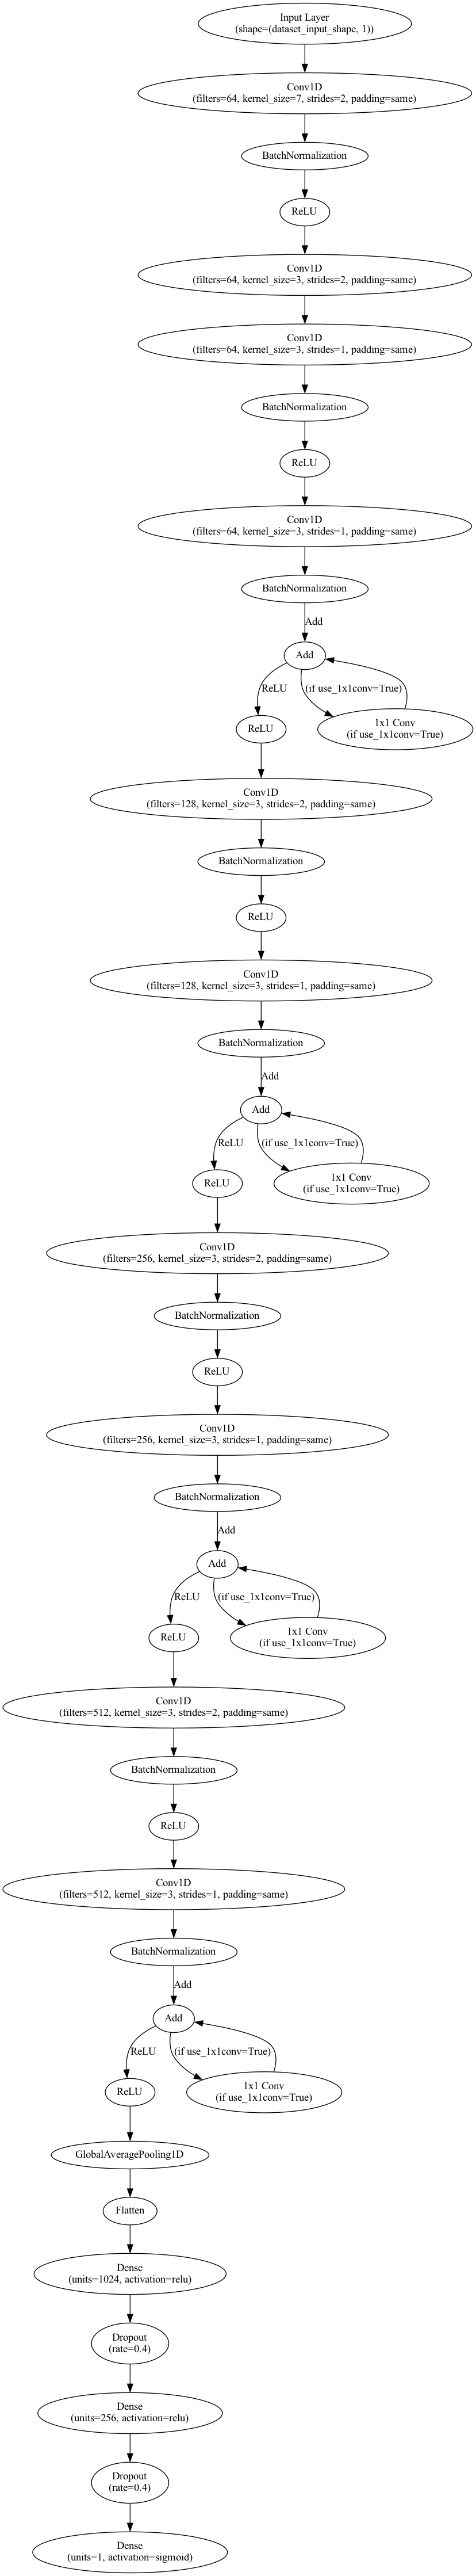

In [286]:
# Initialize the graph
dot = Digraph()

# Add nodes
dot.node('input', 'Input Layer\n(shape=(dataset_input_shape, 1))')
dot.node('conv1', 'Conv1D\n(filters=64, kernel_size=7, strides=2, padding=same)')
dot.node('bn1', 'BatchNormalization')
dot.node('relu1', 'ReLU')
dot.node('conv2', 'Conv1D\n(filters=64, kernel_size=3, strides=2, padding=same)')

# Residual Block 1
dot.node('res1_conv1', 'Conv1D\n(filters=64, kernel_size=3, strides=1, padding=same)')
dot.node('res1_bn1', 'BatchNormalization')
dot.node('res1_relu1', 'ReLU')
dot.node('res1_conv2', 'Conv1D\n(filters=64, kernel_size=3, strides=1, padding=same)')
dot.node('res1_bn2', 'BatchNormalization')
dot.node('res1_add', 'Add')
dot.node('res1_relu2', 'ReLU')
dot.node('res1_1x1conv', '1x1 Conv\n(if use_1x1conv=True)')

# Residual Block 2
dot.node('res2_conv1', 'Conv1D\n(filters=128, kernel_size=3, strides=2, padding=same)')
dot.node('res2_bn1', 'BatchNormalization')
dot.node('res2_relu1', 'ReLU')
dot.node('res2_conv2', 'Conv1D\n(filters=128, kernel_size=3, strides=1, padding=same)')
dot.node('res2_bn2', 'BatchNormalization')
dot.node('res2_add', 'Add')
dot.node('res2_relu2', 'ReLU')
dot.node('res2_1x1conv', '1x1 Conv\n(if use_1x1conv=True)')

# Residual Block 3
dot.node('res3_conv1', 'Conv1D\n(filters=256, kernel_size=3, strides=2, padding=same)')
dot.node('res3_bn1', 'BatchNormalization')
dot.node('res3_relu1', 'ReLU')
dot.node('res3_conv2', 'Conv1D\n(filters=256, kernel_size=3, strides=1, padding=same)')
dot.node('res3_bn2', 'BatchNormalization')
dot.node('res3_add', 'Add')
dot.node('res3_relu2', 'ReLU')
dot.node('res3_1x1conv', '1x1 Conv\n(if use_1x1conv=True)')

# Residual Block 4
dot.node('res4_conv1', 'Conv1D\n(filters=512, kernel_size=3, strides=2, padding=same)')
dot.node('res4_bn1', 'BatchNormalization')
dot.node('res4_relu1', 'ReLU')
dot.node('res4_conv2', 'Conv1D\n(filters=512, kernel_size=3, strides=1, padding=same)')
dot.node('res4_bn2', 'BatchNormalization')
dot.node('res4_add', 'Add')
dot.node('res4_relu2', 'ReLU')
dot.node('res4_1x1conv', '1x1 Conv\n(if use_1x1conv=True)')

# Global Average Pooling and Dense layers
dot.node('gap', 'GlobalAveragePooling1D')
dot.node('flatten', 'Flatten')
dot.node('dense1', 'Dense\n(units=1024, activation=relu)')
dot.node('dropout1', 'Dropout\n(rate=0.4)')
dot.node('dense2', 'Dense\n(units=256, activation=relu)')
dot.node('dropout2', 'Dropout\n(rate=0.4)')
dot.node('output', 'Dense\n(units=1, activation=sigmoid)')

# Add edges
dot.edges([('input', 'conv1'), ('conv1', 'bn1'), ('bn1', 'relu1'), ('relu1', 'conv2')])
dot.edges([('conv2', 'res1_conv1'), ('res1_conv1', 'res1_bn1'), ('res1_bn1', 'res1_relu1'), ('res1_relu1', 'res1_conv2'), ('res1_conv2', 'res1_bn2')])
dot.edge('res1_bn2', 'res1_add', label='Add')
dot.edge('res1_add', 'res1_relu2', label='ReLU')
dot.edge('res1_add', 'res1_1x1conv', label='(if use_1x1conv=True)')
dot.edge('res1_1x1conv', 'res1_add', label='')

dot.edges([('res1_relu2', 'res2_conv1'), ('res2_conv1', 'res2_bn1'), ('res2_bn1', 'res2_relu1'), ('res2_relu1', 'res2_conv2'), ('res2_conv2', 'res2_bn2')])
dot.edge('res2_bn2', 'res2_add', label='Add')
dot.edge('res2_add', 'res2_relu2', label='ReLU')
dot.edge('res2_add', 'res2_1x1conv', label='(if use_1x1conv=True)')
dot.edge('res2_1x1conv', 'res2_add', label='')

dot.edges([('res2_relu2', 'res3_conv1'), ('res3_conv1', 'res3_bn1'), ('res3_bn1', 'res3_relu1'), ('res3_relu1', 'res3_conv2'), ('res3_conv2', 'res3_bn2')])
dot.edge('res3_bn2', 'res3_add', label='Add')
dot.edge('res3_add', 'res3_relu2', label='ReLU')
dot.edge('res3_add', 'res3_1x1conv', label='(if use_1x1conv=True)')
dot.edge('res3_1x1conv', 'res3_add', label='')

dot.edges([('res3_relu2', 'res4_conv1'), ('res4_conv1', 'res4_bn1'), ('res4_bn1', 'res4_relu1'), ('res4_relu1', 'res4_conv2'), ('res4_conv2', 'res4_bn2')])
dot.edge('res4_bn2', 'res4_add', label='Add')
dot.edge('res4_add', 'res4_relu2', label='ReLU')
dot.edge('res4_add', 'res4_1x1conv', label='(if use_1x1conv=True)')
dot.edge('res4_1x1conv', 'res4_add', label='')

dot.edges([('res4_relu2', 'gap'), ('gap', 'flatten'), ('flatten', 'dense1'), ('dense1', 'dropout1'), ('dropout1', 'dense2'), ('dense2', 'dropout2'), ('dropout2', 'output')])

# Save and render the graph
dot.render('resnet_1d', format='png', view=True)


'resnet_1d.png'

In [ ]:
# Build the ResNet 1D from scratch, create the residual block first
def residual_block(x, filters, kernel_size=3, strides=1, use_1x1conv=False):
    y = Conv1D(filters, kernel_size, strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = ReLU()(y)
    y = Conv1D(filters, kernel_size, strides=1, padding='same')(y)
    y = BatchNormalization()(y)
    
    if use_1x1conv:
        x = Conv1D(filters, kernel_size=1, strides=strides, padding='same')(x)
    y = Add()([y, x])
    return ReLU()(y)

def resnet_1D_base_model(dataset_input_shape):

    inputs = Input(shape=(dataset_input_shape,1))

    # First Conv Layer
    x = Conv1D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(64, kernel_size=3, strides=2, padding='same')(x)

    # First ResNet Block
    x = residual_block(x, 64, use_1x1conv=True)
    x = residual_block(x, 64)

    # Second ResNet Block
    x = residual_block(x, 128, strides=2, use_1x1conv=True)
    x = residual_block(x, 128)

    # Third ResNet Block
    x = residual_block(x, 256, strides=2, use_1x1conv=True)
    x = residual_block(x, 256)

    # Fourth ResNet Block
    x = residual_block(x, 512, strides=2, use_1x1conv=True)
    x = residual_block(x, 512)

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

In [254]:
### ResNet 1D + SMOTE
X_train_smote_resnet1D = np.expand_dims(X_train_smote, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_smote_resnet1D_input = X_train_smote_resnet1D.shape[1]

resnet1D_smote = resnet_1D_base_model(X_train_smote_resnet1D_input)

# Compile the model
resnet1D_smote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_smote.fit(X_train_smote_resnet1D, y_train_smote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 17:56:20.871704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.1809 - accuracy: 0.9368

2024-07-13 17:56:55.777545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 39s 427ms/step - loss: 0.1809 - accuracy: 0.9368 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 2/10
75/75 [==============================] - 27s 362ms/step - loss: 0.0790 - accuracy: 0.9702 - val_loss: 0.0177 - val_accuracy: 0.9937
Epoch 3/10
75/75 [==============================] - 28s 380ms/step - loss: 0.0788 - accuracy: 0.9698 - val_loss: 0.0127 - val_accuracy: 0.9987
Epoch 4/10
75/75 [==============================] - 26s 351ms/step - loss: 0.0758 - accuracy: 0.9746 - val_loss: 0.0471 - val_accuracy: 0.9848
Epoch 5/10
75/75 [==============================] - 29s 392ms/step - loss: 0.0682 - accuracy: 0.9766 - val_loss: 0.0319 - val_accuracy: 0.9844
Epoch 6/10
75/75 [==============================] - 31s 417ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0714 - val_accuracy: 0.9781
Epoch 7/10
75/75 [==============================] - 31s 410ms/step - loss: 0.0534 - accuracy: 0.9829 - val_loss: 0.0452 - val_accuracy: 0.9853
Epoch 8/10

In [255]:
### ResNet 1D + SMOTE
y_pred_resnet1D_smote = (resnet1D_smote.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of SMOTE and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_smote))
print(classification_report(y_test, y_pred_resnet1D_smote))

2024-07-13 18:03:32.254241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of SMOTE and ResNet1D: 0.9727606076479832
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1495
         1.0       0.92      0.96      0.94       414

    accuracy                           0.97      1909
   macro avg       0.95      0.97      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [ ]:
# All evaluations:
print("Precision of GAN and LSTM:", precision_score(y_test, y_pred_lstm_gan))
print("Recall of GAN and LSTM:", recall_score(y_test, y_pred_lstm_gan))
print("F1 Score of GAN and LSTM:", f1_score(y_test, y_pred_lstm_gan))
print("AUC of GAN and LSTM:", roc_auc_score(y_test, y_pred_lstm_gan))

In [346]:
# Save the model
resnet1D_smote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_smote_model.h5')

In [268]:
### ResNet 1D + borderlinesmote
X_train_borderlinesmote_resnet1D = np.expand_dims(X_train_borderlinesmote, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_borderlinesmote_resnet1D_input = X_train_borderlinesmote_resnet1D.shape[1]

resnet1D_borderlinesmote = resnet_1D_base_model(X_train_borderlinesmote_resnet1D_input)

# Compile the model
resnet1D_borderlinesmote.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_borderlinesmote.fit(X_train_borderlinesmote_resnet1D, y_train_borderlinesmote, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 22:53:18.442920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.2418 - accuracy: 0.9066

2024-07-13 22:53:57.514677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 43s 465ms/step - loss: 0.2418 - accuracy: 0.9066 - val_loss: 0.0977 - val_accuracy: 0.9996
Epoch 2/10
75/75 [==============================] - 32s 423ms/step - loss: 0.1157 - accuracy: 0.9569 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 3/10
75/75 [==============================] - 32s 426ms/step - loss: 0.0887 - accuracy: 0.9696 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 4/10
75/75 [==============================] - 33s 439ms/step - loss: 0.1156 - accuracy: 0.9566 - val_loss: 0.0088 - val_accuracy: 0.9979
Epoch 5/10
75/75 [==============================] - 34s 460ms/step - loss: 0.0981 - accuracy: 0.9632 - val_loss: 0.0654 - val_accuracy: 0.9920
Epoch 6/10
75/75 [==============================] - 35s 467ms/step - loss: 0.0743 - accuracy: 0.9766 - val_loss: 0.0344 - val_accuracy: 0.9924
Epoch 7/10
75/75 [==============================] - 32s 424ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0145 - val_accuracy: 0.9937
Epoch 8/10

In [269]:
### ResNet 1D + borderlinesmote
y_pred_resnet1D_borderlinesmote = (resnet1D_borderlinesmote.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of Borderline-SMOTE and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_borderlinesmote))
print(classification_report(y_test, y_pred_resnet1D_borderlinesmote))

2024-07-13 22:58:54.504077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of Borderline-SMOTE and ResNet1D: 0.9612362493452069
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1495
         1.0       0.87      0.96      0.92       414

    accuracy                           0.96      1909
   macro avg       0.93      0.96      0.95      1909
weighted avg       0.96      0.96      0.96      1909



In [347]:
# Save the model
resnet1D_borderlinesmote.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_borderlinesmote_model.h5')

In [270]:
### ResNet 1D + ADASYN
X_train_adasyn_resnet1D = np.expand_dims(X_train_adasyn, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_adasyn_resnet1D_input = X_train_adasyn_resnet1D.shape[1]

resnet1D_adasyn = resnet_1D_base_model(X_train_adasyn_resnet1D_input)

# Compile the model
resnet1D_adasyn.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_adasyn.fit(X_train_adasyn_resnet1D, y_train_adasyn, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 22:58:59.554791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.2714 - accuracy: 0.8957

2024-07-13 22:59:41.615161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 46s 514ms/step - loss: 0.2714 - accuracy: 0.8957 - val_loss: 0.1079 - val_accuracy: 0.9937
Epoch 2/10
75/75 [==============================] - 34s 448ms/step - loss: 0.1285 - accuracy: 0.9519 - val_loss: 0.0210 - val_accuracy: 0.9937
Epoch 3/10
75/75 [==============================] - 33s 437ms/step - loss: 0.1042 - accuracy: 0.9621 - val_loss: 0.1115 - val_accuracy: 0.9496
Epoch 4/10
75/75 [==============================] - 32s 432ms/step - loss: 0.1004 - accuracy: 0.9626 - val_loss: 0.0695 - val_accuracy: 0.9681
Epoch 5/10
75/75 [==============================] - 34s 450ms/step - loss: 0.0808 - accuracy: 0.9705 - val_loss: 0.0961 - val_accuracy: 0.9525
Epoch 6/10
75/75 [==============================] - 34s 459ms/step - loss: 0.0789 - accuracy: 0.9735 - val_loss: 0.4754 - val_accuracy: 0.7761
Epoch 7/10
75/75 [==============================] - 32s 427ms/step - loss: 0.0733 - accuracy: 0.9738 - val_loss: 0.2318 - val_accuracy: 0.9004
Epoch 8/10

In [271]:
### ResNet 1D + ADASYN
y_pred_resnet1D_adasyn = (resnet1D_adasyn.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of ADASYN and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_adasyn))
print(classification_report(y_test, y_pred_resnet1D_adasyn))

2024-07-13 23:04:39.812422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ADASYN and ResNet1D: 0.963855421686747
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1495
         1.0       0.88      0.96      0.92       414

    accuracy                           0.96      1909
   macro avg       0.94      0.96      0.95      1909
weighted avg       0.97      0.96      0.96      1909



In [348]:
# Save the model
resnet1D_adasyn.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_adasyn_model.h5')

In [272]:
### ResNet 1D + ROS
X_train_ros_resnet1D = np.expand_dims(X_train_ros, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_ros_resnet1D_input = X_train_ros_resnet1D.shape[1]

resnet1D_ros = resnet_1D_base_model(X_train_ros_resnet1D_input)

# Compile the model
resnet1D_ros.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_ros.fit(X_train_ros_resnet1D, y_train_ros, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 23:04:45.050794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.1937 - accuracy: 0.9290

2024-07-13 23:05:30.003180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 50s 554ms/step - loss: 0.1937 - accuracy: 0.9290 - val_loss: 0.0354 - val_accuracy: 0.9979
Epoch 2/10
75/75 [==============================] - 39s 522ms/step - loss: 0.0910 - accuracy: 0.9662 - val_loss: 0.0504 - val_accuracy: 0.9772
Epoch 3/10
75/75 [==============================] - 35s 470ms/step - loss: 0.0850 - accuracy: 0.9692 - val_loss: 0.0440 - val_accuracy: 0.9886
Epoch 4/10
75/75 [==============================] - 39s 523ms/step - loss: 0.0772 - accuracy: 0.9728 - val_loss: 0.0929 - val_accuracy: 0.9713
Epoch 5/10
75/75 [==============================] - 37s 494ms/step - loss: 0.0707 - accuracy: 0.9762 - val_loss: 0.0982 - val_accuracy: 0.9612
Epoch 6/10
75/75 [==============================] - 40s 530ms/step - loss: 0.0604 - accuracy: 0.9792 - val_loss: 0.1075 - val_accuracy: 0.9600
Epoch 7/10
75/75 [==============================] - 38s 510ms/step - loss: 0.0590 - accuracy: 0.9800 - val_loss: 0.0520 - val_accuracy: 0.9798
Epoch 8/10

In [273]:
### ResNet 1D + ROS
y_pred_resnet1D_ros = (resnet1D_ros.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of ROS and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_ros))
print(classification_report(y_test, y_pred_resnet1D_ros))

2024-07-13 23:11:18.556376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of ROS and ResNet1D: 0.9764274489261393
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1495
         1.0       0.95      0.94      0.95       414

    accuracy                           0.98      1909
   macro avg       0.97      0.96      0.97      1909
weighted avg       0.98      0.98      0.98      1909



In [349]:
# Save the model
resnet1D_ros.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_ros_model.h5')

In [274]:
### ResNet 1D + GAN
X_train_gan_resnet1D = np.expand_dims(X_train_gan_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_gan_resnet1D_input = X_train_gan_resnet1D.shape[1]

resnet1D_gan = resnet_1D_base_model(X_train_gan_resnet1D_input)

# Compile the model
resnet1D_gan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_gan.fit(X_train_gan_resnet1D, y_train_gan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 23:11:24.534097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.2203 - accuracy: 0.9241

2024-07-13 23:12:11.770870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 52s 585ms/step - loss: 0.2203 - accuracy: 0.9241 - val_loss: 0.0152 - val_accuracy: 0.9954
Epoch 2/10
75/75 [==============================] - 38s 514ms/step - loss: 0.0916 - accuracy: 0.9675 - val_loss: 0.0470 - val_accuracy: 0.9629
Epoch 3/10
75/75 [==============================] - 38s 512ms/step - loss: 0.0977 - accuracy: 0.9649 - val_loss: 1.4072e-04 - val_accuracy: 1.0000
Epoch 4/10
75/75 [==============================] - 37s 499ms/step - loss: 0.0676 - accuracy: 0.9771 - val_loss: 0.0030 - val_accuracy: 0.9987
Epoch 5/10
75/75 [==============================] - 37s 492ms/step - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.0050 - val_accuracy: 0.9975
Epoch 6/10
75/75 [==============================] - 37s 496ms/step - loss: 0.0482 - accuracy: 0.9826 - val_loss: 0.0023 - val_accuracy: 0.9992
Epoch 7/10
75/75 [==============================] - 38s 510ms/step - loss: 0.0555 - accuracy: 0.9811 - val_loss: 0.0049 - val_accuracy: 0.9979
Epoch 

In [275]:
### ResNet 1D + GAN
y_pred_resnet1D_gan = (resnet1D_gan.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of GAN and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_gan))
print(classification_report(y_test, y_pred_resnet1D_gan))

2024-07-13 23:17:50.834835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of GAN and ResNet1D: 0.9685699319015191
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1495
         1.0       0.90      0.97      0.93       414

    accuracy                           0.97      1909
   macro avg       0.94      0.97      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [350]:
# Save the model
resnet1D_gan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_gan_model.h5')

In [276]:
### ResNet 1D + WGAN
X_train_wgan_resnet1D = np.expand_dims(X_train_wgan_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_resnet1D_input = X_train_wgan_resnet1D.shape[1]

resnet1D_wgan = resnet_1D_base_model(X_train_wgan_resnet1D_input)

# Compile the model
resnet1D_wgan.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_wgan.fit(X_train_wgan_resnet1D, y_train_wgan_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 23:17:56.728573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.1759 - accuracy: 0.9385

2024-07-13 23:18:51.047827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 60s 645ms/step - loss: 0.1759 - accuracy: 0.9385 - val_loss: 0.1162 - val_accuracy: 0.9621
Epoch 2/10
75/75 [==============================] - 40s 531ms/step - loss: 0.0745 - accuracy: 0.9752 - val_loss: 0.0898 - val_accuracy: 0.9600
Epoch 3/10
75/75 [==============================] - 42s 557ms/step - loss: 0.0719 - accuracy: 0.9733 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 4/10
75/75 [==============================] - 42s 568ms/step - loss: 0.0757 - accuracy: 0.9751 - val_loss: 0.0043 - val_accuracy: 0.9983
Epoch 5/10
75/75 [==============================] - 40s 538ms/step - loss: 0.0620 - accuracy: 0.9793 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 6/10
75/75 [==============================] - 41s 554ms/step - loss: 0.0535 - accuracy: 0.9811 - val_loss: 7.6200e-04 - val_accuracy: 1.0000
Epoch 7/10
75/75 [==============================] - 41s 546ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 4.7311e-04 - val_accuracy: 1.0000
Ep

In [277]:
### ResNet 1D + WGAN
y_pred_resnet1D_wgan = (resnet1D_wgan.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of WGAN and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_wgan))
print(classification_report(y_test, y_pred_resnet1D_wgan))

2024-07-13 23:25:06.203977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of WGAN and ResNet1D: 0.9706652697747512
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1495
         1.0       0.95      0.92      0.93       414

    accuracy                           0.97      1909
   macro avg       0.96      0.95      0.96      1909
weighted avg       0.97      0.97      0.97      1909



In [351]:
# Save the model
resnet1D_wgan.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_wgan_model.h5')

In [278]:
### ResNet 1D + WGAN-GP
X_train_wgan_gp_resnet1D = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)

X_train_wgan_gp_resnet1D_input = X_train_wgan_gp_resnet1D.shape[1]

resnet1D_wgan_gp = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input)

# Compile the model
resnet1D_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Training the model
history = resnet1D_wgan_gp.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2024-07-13 23:25:13.277439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 0.1830 - accuracy: 0.9366

2024-07-13 23:26:14.430474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 67s 751ms/step - loss: 0.1830 - accuracy: 0.9366 - val_loss: 0.3357 - val_accuracy: 0.8681
Epoch 2/10
75/75 [==============================] - 47s 624ms/step - loss: 0.0696 - accuracy: 0.9750 - val_loss: 0.1316 - val_accuracy: 0.9456
Epoch 3/10
75/75 [==============================] - 46s 617ms/step - loss: 0.0669 - accuracy: 0.9788 - val_loss: 0.0135 - val_accuracy: 0.9958
Epoch 4/10
75/75 [==============================] - 45s 593ms/step - loss: 0.0678 - accuracy: 0.9760 - val_loss: 0.0306 - val_accuracy: 0.9895
Epoch 5/10
75/75 [==============================] - 48s 634ms/step - loss: 0.0604 - accuracy: 0.9803 - val_loss: 0.0033 - val_accuracy: 0.9996
Epoch 6/10
75/75 [==============================] - 49s 653ms/step - loss: 0.0490 - accuracy: 0.9832 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 7/10
75/75 [==============================] - 44s 588ms/step - loss: 0.0465 - accuracy: 0.9845 - val_loss: 8.1831e-04 - val_accuracy: 0.9996
Epoch 

In [279]:
### ResNet 1D + WGAN-GP
y_pred_resnet1D_wgan_gp = (resnet1D_wgan_gp.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
print("Accuracy of WGAN-GP and ResNet1D:", accuracy_score(y_test, y_pred_resnet1D_wgan_gp))
print(classification_report(y_test, y_pred_resnet1D_wgan_gp))

2024-07-13 23:33:17.812306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy of WGAN-GP and ResNet1D: 0.9769512833944474
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1495
         1.0       0.94      0.95      0.95       414

    accuracy                           0.98      1909
   macro avg       0.96      0.97      0.97      1909
weighted avg       0.98      0.98      0.98      1909



In [290]:
# Save the model
resnet1D_wgan_gp.save('/Users/niecheng/Desktop/DATA5012 Data Science Project/Models/Classification/resnet1D_wgan_gp_model.h5')

# Optimization

### Genetic Algorithm

In [358]:
# Re-define the resnet structure for optimization
# num_filters: 32, 64, 128
# dropout_rate: 0.1, 0.2, 0.3, 0.4
# dense_units: 64, 128, 256, 512, 1024
def resnet_1D_base_model(dataset_input_shape, num_filters, dropout_rate):

    inputs = Input(shape=(dataset_input_shape,1))

    # First Conv Layer
    x = Conv1D(num_filters, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(num_filters, kernel_size=3, strides=2, padding='same')(x)

    # ResNet Blocks
    for i in range(4):
        x = residual_block(x, num_filters * (2 ** i), strides=2, use_1x1conv=True)
        x = residual_block(x, num_filters * (2 ** i))

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

In [359]:
# Define the fitness function for GA
def fitness_function(individual):
    num_filters, dropout_rate = individual
    
    # Ensure hyperparameters are in valid ranges
    num_filters = int(num_filters)
    dropout_rate = max(0, min(1, dropout_rate))
    
    # Build and compile the model
    resnet1D_wgan_gp = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, num_filters, dropout_rate)
    resnet1D_wgan_gp.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
    # Train the model
    history = resnet1D_wgan_gp.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=3, batch_size=128, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    y_pred = (resnet1D_wgan_gp.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# GA setup with specific ranges
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_filters", random.choice, [32, 64, 128])  # num_filters
toolbox.register("attr_float_dropout", random.choice, [0.1, 0.2, 0.3, 0.4])  # dropout_rate

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_filters, toolbox.attr_float_dropout), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[32, 0.1], up=[128, 0.4], eta=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

In [363]:
# Initialize population
random.seed(5012)
population = toolbox.population(n=10)

# Define statistics and run GA
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=2, stats=stats, halloffame=hof, verbose=True)

# Output best individual
print("Best individual is: ", hof[0])
print("With fitness: ", hof[0].fitness.values[0])

2024-07-15 14:11:55.197994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:13:40.954206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:16:27.421545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:16:35.681910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:18:28.650641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:21:23.107293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 14:21:40.909570: I tensorflow/core/grappler/optimizers/cust

gen	nevals	avg     	std       	min     	max     
0  	10    	0.960346	0.00735628	0.948664	0.971189


2024-07-15 15:05:39.651308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:07:56.625159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:11:45.110009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:11:55.987809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:14:12.393234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:17:49.645261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:18:01.077598: I tensorflow/core/grappler/optimizers/cust

1  	6     	0.959822	0.013545  	0.920377	0.967522


2024-07-15 15:44:31.522611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:46:41.471599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:50:25.504826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:50:36.539417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:52:57.097958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:56:43.659721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2024-07-15 15:56:57.119591: I tensorflow/core/grappler/optimizers/cust

2  	8     	0.960293	0.0048113 	0.949712	0.967522
Best individual is:  [32, 0.2]
With fitness:  0.9711891042430592


In [89]:
#X_train_smote_resnet1D = np.expand_dims(X_train_smote, axis=2)
X_train_wgan_gp_resnet1D = np.expand_dims(X_train_wgan_gp_generated, axis=2)
X_test_normalized_resnet1D = np.expand_dims(X_test_normalized, axis=2)
X_train_wgan_gp_resnet1D_input = X_train_wgan_gp_resnet1D.shape[1]

In [90]:
# Re-define the resnet structure for optimization
# num_filters: 32, 64, 128
# dropout_rate: 0.1, 0.2, 0.3, 0.4
# dense_units: 64, 128, 256, 512, 1024
def resnet_1D_base_model(dataset_input_shape, num_filters, dropout_rate, dense_units):

    inputs = Input(shape=(dataset_input_shape,1))

    # First Conv Layer
    x = Conv1D(num_filters, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(num_filters, kernel_size=3, strides=2, padding='same')(x)

    # ResNet Blocks
    for i in range(4):
        x = residual_block(x, num_filters * (2 ** i), strides=2, use_1x1conv=True)
        x = residual_block(x, num_filters * (2 ** i))

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    x = Flatten()(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(dense_units, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    base_model = Model(inputs, outputs)
    return base_model

In [91]:
# Define the fitness function for GA
def fitness_function(individual):
    num_filters, dropout_rate, dense_units = individual
    
    # Ensure hyperparameters are in valid ranges
    num_filters = int(num_filters)
    dropout_rate = max(0, min(1, dropout_rate))
    dense_units = int(dense_units)
    
    # Build and compile the model
    model = resnet_1D_base_model(X_train_wgan_gp_resnet1D_input, num_filters, dropout_rate, dense_units)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_wgan_gp_resnet1D, y_train_wgan_gp_generated, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_test_normalized_resnet1D) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Ensure mutation produces valid values
def mutate_individual(individual, indpb):
    if random.random() < indpb:
        individual[0] = random.choice([32, 64])  # num_filters
    if random.random() < indpb:
        individual[1] = random.choice([0.3, 0.4])  # dropout_rate
    if random.random() < indpb:
        individual[2] = random.choice([256, 512, 1024])  # dense_units
    return individual,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int_filters", random.choice, [32, 64])  # num_filters
toolbox.register("attr_float_dropout", random.choice, [0.3, 0.4])  # dropout_rate
toolbox.register("attr_int_dense", random.choice, [256, 512, 1024])  # dense_units

toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_int_filters, toolbox.attr_float_dropout, toolbox.attr_int_dense), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", mutate_individual, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)


In [92]:
# Initialize population
random.seed(5012)
population = toolbox.population(n=10)

# Define statistics and run GA
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run GA
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=2, stats=stats, halloffame=hof, verbose=True)

# Output best individual
print("Best individual is: ", hof[0])
print("With fitness: ", hof[0].fitness.values[0])

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
gen	nevals	avg     	std       	min     	max     
0  	10    	0.966579	0.00331136	0.962808	0.973808
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step
1  	5     	0.968622	0.00391617	0.96176 	0.973808
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step
2  	6     	0.

# Interpretation & Explainability

### LIME

In [385]:
# Create lime explainer 
LIME_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_wgan_gp_resnet1D.reshape(X_train_wgan_gp_resnet1D.shape[0], -1),
    feature_names=[f'feature_{i}' for i in range(X_train_wgan_gp_resnet1D.shape[1])],
    class_names=['class_0', 'class_1'],
    mode='classification'
)

# Define the wrapper to make sure the probability the model predict
class ModelWrapper:
    def __init__(self, model):
        self.model = model
    
    def predict(self, X):
        proba = self.model.predict(X)
        return np.hstack((1 - proba, proba))

# Create the instance of the wrapper
wrapped_model = ModelWrapper(resnet1D_wgan_gp)

# Choose the first sample for explanation
i = 0  
LIME_exp = LIME_explainer.explain_instance(
    X_test_normalized_resnet1D[i].reshape(-1),
    wrapped_model.predict,
    num_features=10
)

# Plot the result
LIME_exp.show_in_notebook(show_table=True, show_all=False)


### Alibi

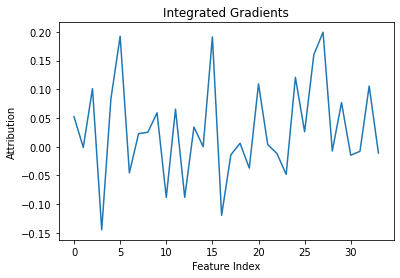

In [378]:
# Create Alibi Integrated Gradients explainer 
Alibi_explainer = IntegratedGradients(resnet1D_wgan_gp, layer=None, method="gausslegendre", n_steps=50)

# Choose the sample for explanation
X = X_test_normalized_resnet1D[0].reshape(1, *X_test_normalized_resnet1D[0].shape)  

# Define the target variable, use the first element to check 
target = np.array([int(y_test.iloc[0])])  

# Calculate integrated gradients
Alibi_explanation = Alibi_explainer.explain(X, target=target)

# Plot the result
attributions = Alibi_explanation.attributions[0].sum(axis=-1)  # sum of the contributions
plt.plot(attributions[0])
plt.title('Integrated Gradients')
plt.xlabel('Feature Index')
plt.ylabel('Attribution')
plt.show()


### Eli5

In [382]:
# Define a wrapper for making the model suitable for ELI5 input
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        pass 

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

    def predict_proba(self, X):
        return self.model.predict(X)

# Create the instance of the wrapper
ELI5_explainer = KerasClassifier(resnet1D_wgan_gp)

# Use permutation importance to show the feature importance
perm = PermutationImportance(ELI5_explainer, scoring='accuracy', random_state=1).fit(
    X_test_normalized_resnet1D.reshape(X_test_normalized_resnet1D.shape[0], -1),
    y_test
)

# Plot
eli5.show_weights(perm, feature_names=[f'feature_{i}' for i in range(X_test_normalized_resnet1D.shape[1])])
